# Data Analysis and Cleaning
analysis data and do some dirty work for cleaning
- <a href='#1'>1. data preprocess</a> 
- <a href='#2'>2. show features different between train and test</a> 
- <a href='#3'>3. show feature distribution between normal and fault disks</a>
- <a href='#4'>4. check the correlation between feature and targets</a>
- <a href='#5'>5. data sampling</a>
- <a href='#6'>6. analysis special feature</a>
- <a href='#7'>7. feature selection</a>

In [2]:
# ! pip install imbalanced-learn -i http://mirrors.aliyun.com/pypi/simple/ --trusted-host mirrors.aliyun.comImportError: cannot import name '_to_object_array' from 'sklearn.utils' (/opt/conda/lib/python3.7/site-packages/sklearn/utils/__init__.py)
import sys
import os 
import gc
from time import time 
from datetime import timedelta, datetime
import base64

import pandas as pd
from IPython.core.display import display, HTML
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.stats import ks_2samp
import xgboost as xgb
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from tqdm import tqdm
from imblearn.over_sampling import SMOTE 

sys.path.append('../')
import conf
from utils import (
    check_columns, 
    check_nan_value, 
    correct_column_type, 
    plot_dist_of_cols,
    remove_cont_cols_with_unique_value,
    get_latest_model,
    load_model
)
from mlpipeline.train import (
        _train_valid_split,
        
)
from mlpipeline import ( SELECTED_CONT_COLS

)

In [3]:
# global settings
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns',1000)
pd.set_option('display.width',100)
sns.set(rc={'figure.figsize':(20,10)})

In [4]:
# global variables
DEFAULT_MISSING_FLOAT = -1.234
FAULT_TAG = 1

In [5]:
# functions
def __dummy():
    pass

def diivide_files_into_raw_and_normalized():
    pass

### <a id='1'> 1.Data Preprocess</a>

In [6]:
! du -sh ../data/*

8.1M	../data/2017_fault_data.h5
67M	../data/chunk_data_for_test.h5
4.2G	../data/code.zip
4.2G	../data/data_2017_all.h5
4.7G	../data/data_2017_new_all.h5
2.3G	../data/data_2017_tag_flag.h5
2.5G	../data/data_2017_tag_flag_raw.h5
12G	../data/data_2017_to_2018_all.h5
20M	../data/data_201808_test.h5
41M	../data/data_201808_test_all.h5
46M	../data/data_201808_test_b.h5
24M	../data/data_201808_test_raw.h5
6.9G	../data/data_2018_all.h5
7.9G	../data/data_2018_new_all.h5
2.5G	../data/data_2018_semifinals.h5
9.1G	../data/data_2018_semifinals_all.h5
3.9G	../data/data_2018_tag_flag.h5
4.2G	../data/data_2018_tag_flag_raw.h5
36K	../data/disk_sample_fault_tag.csv
8.0K	../data/disk_sample_fault_tag_201808.csv
1.2G	../data/disk_sample_smart_log_201707.csv
228M	../data/disk_sample_smart_log_201707_norm.csv
233M	../data/disk_sample_smart_log_201707_raw.csv
2.2G	../data/disk_sample_smart_log_201708.csv
446M	../data/disk_sample_smart_log_201708_norm.csv
460M	../data/disk_sample_smart_log_201708_raw.csv
2.2G

In [7]:
train_fe_df.loc[train_fe_df.tag!=0,'tag'] = 1

In [8]:
train_fe_df.describe()

,model,smart_1_normalized,smart_1raw,smart_3_normalized,smart_3raw,smart_4_normalized,smart_4raw,smart_5_normalized,smart_5raw,smart_7_normalized,smart_7raw,smart_9_normalized,smart_9raw,smart_10_normalized,smart_10raw,smart_12_normalized,smart_12raw,smart_184_normalized,smart_184raw,smart_187_normalized,smart_187raw,smart_188_normalized,smart_188raw,smart_189_normalized,smart_189raw,smart_190_normalized,smart_190raw,smart_191_normalized,smart_191raw,smart_192_normalized,smart_192raw,smart_193_normalized,smart_193raw,smart_194_normalized,smart_194raw,smart_195_normalized,smart_195raw,smart_197_normalized,smart_197raw,smart_198_normalized,smart_198raw,smart_199_normalized,smart_199raw,smart_240_normalized,smart_240raw,smart_241_normalized,smart_241raw,smart_242_normalized,smart_242raw,tag,flag,30_day
count,3.685434e+07,3.685304e+07,36853038.0,3.685306e+07,36853055.0,3.685302e+07,3.685302e+07,3.685300e+07,3.685300e+07,3.685302e+07,3.685302e+07,3.685304e+07,3.685304e+07,3.685302e+07,36853021.0,3.685301e+07,3.685302e+07,3.685300e+07,3.685300e+07,3.685301e+07,3.685301e+07,3.685300e+07,3.685300e+07,3.685301e+07,3.685301e+07,3.685302e+07,3.685302e+07,3.685304e+07,3.685304e+07,3.685303e+07,3.685303e+07,3.685301e+07,3.685301e+07,3.685304e+07,3.685304e+07,3.685304e+07,36853042.0,3.685304e+07,3.685304e+07,3.685303e+07,3.685303e+07,3.685305e+07,3.685305e+07,13989071.0,1.398907e+07,1.398907e+07,1.398907e+07,1.398908e+07,1.398908e+07,3.685434e+07,3.685434e+07,3.685434e+07
mean,1.376196e+00,7.996262e+01,116278496.0,9.233144e+01,0.0,9.999545e+01,3.020965e+01,9.998399e+01,3.852906e+00,8.970245e+01,1.214434e+10,7.891376e+01,1.890864e+04,1.000002e+02,0.0,9.999672e+01,2.850144e+01,9.999857e+01,5.057199e-01,9.997875e+01,3.968440e-01,9.999979e+01,5.544241e+08,9.867094e+01,3.793948e+00,7.018484e+01,2.981629e+01,9.669953e+01,7.058464e+03,9.999955e+01,2.625021e+01,9.986480e+01,1.111437e+03,2.981630e+01,2.981630e+01,3.688870e+01,116278592.0,9.999374e+01,1.593550e+00,9.999393e+01,1.575498e+00,2.000004e+02,7.555692e+01,100.0,1.405825e+14,1.000000e+02,1.652316e+11,9.999997e+01,1.398479e+11,7.337535e-04,2.398632e-05,2.176135e-05
std,4.844300e-01,5.419396e+00,72904400.0,4.508388e+00,0.0,2.018664e-01,2.221885e+02,9.069906e-01,2.108023e+02,5.700269e+00,1.315472e+12,1.327450e+01,1.162747e+04,5.082540e-03,0.0,1.854328e-01,2.085820e+02,4.174763e-01,1.595744e+02,1.181963e+00,1.353232e+02,2.105352e-01,1.895355e+11,7.083189e+00,3.497569e+02,3.508697e+00,3.533591e+00,1.022633e+01,2.220910e+04,8.880850e-02,2.039567e+02,1.362615e+00,2.786096e+03,3.533590e+00,3.533590e+00,2.457034e+01,72904408.0,6.921069e-01,1.940206e+02,6.850830e-01,1.934225e+02,1.023690e-02,9.410616e+03,0.0,8.117829e+13,0.000000e+00,2.467649e+11,0.000000e+00,2.502275e+11,2.707795e-02,4.897524e-03,4.664855e-03
min,1.000000e+00,3.600000e+01,0.0,8.300000e+01,0.0,5.200000e+01,1.000000e+00,1.000000e+00,0.000000e+00,3.000000e+01,4.880000e+02,5.100000e+01,0.000000e+00,9.800000e+01,0.0,4.700000e+01,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,7.400000e+01,0.000000e+00,6.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.920000e+02,0.000000e+00,100.0,1.400000e+01,1.000000e+02,0.000000e+00,1.000000e+02,2.220000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,7.800000e+01,52124868.0,8.700000e+01,0.0,1.000000e+02,1.100000e+01,1.000000e+02,0.000000e+00,8.800000e+01,6.934156e+08,6.700000e+01,7.183000e+03,1.000000e+02,0.0,1.000000e+02,1.100000e+01,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00,6.800000e+01,2.700000e+01,9.900000e+01,0.000000e+00,1.000000e+02,7.000000e+00,1.000000e+02,2.800000e+02,2.700000e+01,2.700000e+01,1.000000e+01,52125064.0,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00,2.000000e+02,0.000000e+00,100.0,7.027855e+13,1.000000e+02,1.75

In [ ]:
train_fe_df[train_fe_df.tag==0].isnull().sum()

In [ ]:
train_fe_df[train_fe_df.tag==1].isnull().sum()

In [9]:
index_cols, cate_cols, cont_cols, label_cols = check_columns(train_fe_df.dtypes.to_dict())

In [10]:
train_fe_df.sort_values('dt',inplace=True)

In [39]:
# show the records of each month
def show_the_record_of_each_month_of_each_year():
    train_fe_df['year'] =  train_fe_df['dt'].dt.year.astype(np.int32)
    train_fe_df['month'] = train_fe_df['dt'].dt.month.astype(np.int32)
    train_fe_tmp_df = train_fe_df[['month','serial_number','model','year']]
    train_fe_temp_group = train_fe_tmp_df.groupby(['year','month'])
    print(train_fe_temp_group['month'].agg(lambda x:len(x)))
    train_fe_temp_group['month'].agg(lambda x:len(x)).plot(kind='bar')

year  month
2017  7        1610007
      8        3140857
      9        3146965
      10       3536616
      11       3639220
      12       4105046
2018  1        4428248
      2        4083439
      3        4566413
      4        4463347
      5        4647989
      6        4647434
      7        4855732
      8        5161737
Name: month, dtype: int32


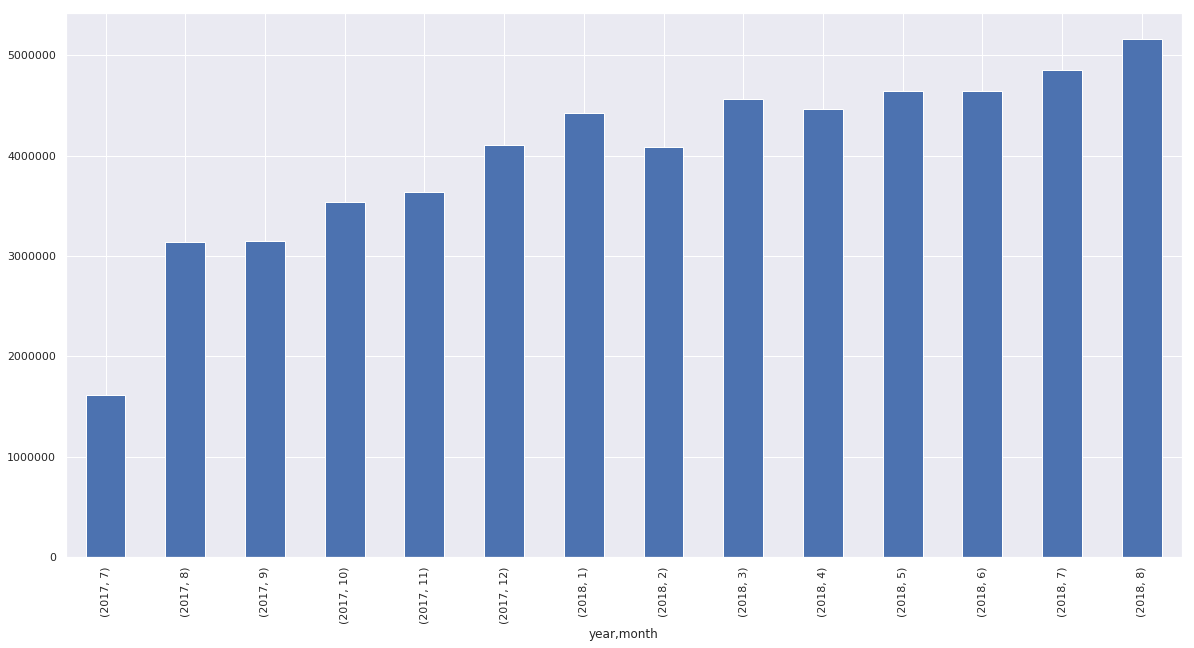

In [40]:
show_the_record_of_each_month_of_each_year()

In [41]:
# show the fault record records of each month of each model type
def plot_each_month_fault_disk_num_with_model_id(using_label):
#     train_fe_df_model_one = train_fe_df[train_fe_df.model==model_id]
    train_fe_df['year'] =  train_fe_df['dt'].dt.year.astype(np.int32)
    train_fe_df['month'] = train_fe_df['dt'].dt.month.astype(np.int32)
    train_temp_df  = train_fe_df[['month',using_label,'model','year']]
    train_temp_group = train_temp_df.groupby(['year','month'])
    temp_model_one = pd.Series(train_temp_group.apply(lambda x: len(x[(x[using_label]==1) & (x.model==1)])))
    temp_model_two = pd.Series(train_temp_group.apply(lambda x: len(x[(x[using_label]==1) & (x.model==2)])))
    df = pd.DataFrame({"model_one":temp_model_one,"model_two":temp_model_two})
    print(df)
    ax = df.plot.bar( rot=0, title="each model's %s_disks in each month"%using_label)
    ax.set_xlabel("month")
    ax.set_ylabel("num_%s_disks"%using_label)
    plt.show()

            model_one  model_two
year month                      
2017 7             20          4
     8             50         17
     9             34         19
     10            32         23
     11            35         25
     12            13          2
2018 1             55         58
     2             47         43
     3             61         40
     4             55         48
     5             46         44
     6             63         57
     7             59         72
     8             69         67


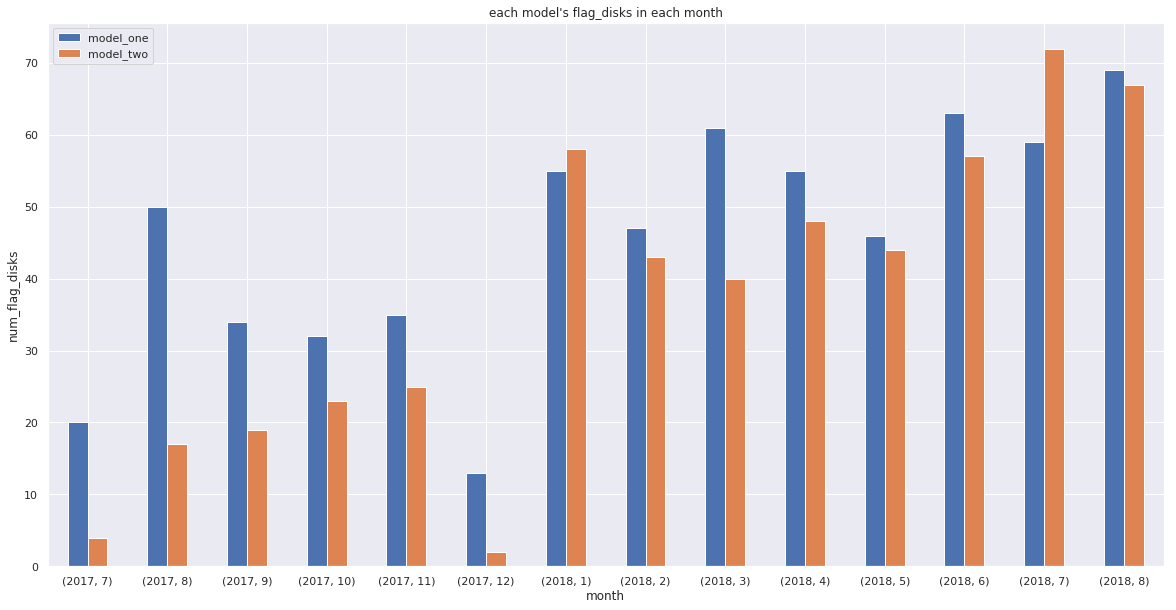

In [42]:
plot_each_month_fault_disk_num_with_model_id('flag')

            model_one  model_two
year month                      
2017 7            919        169
     8           1439        588
     9           1158        608
     10          1350        847
     11           620        314
     12          1036        647
2018 1           1819       2049
     2           1636       1167
     3           1916       1278
     4           1660       1395
     5           1656       1631
     6           2099       1991
     7           2138       2295
     8           1111       1201


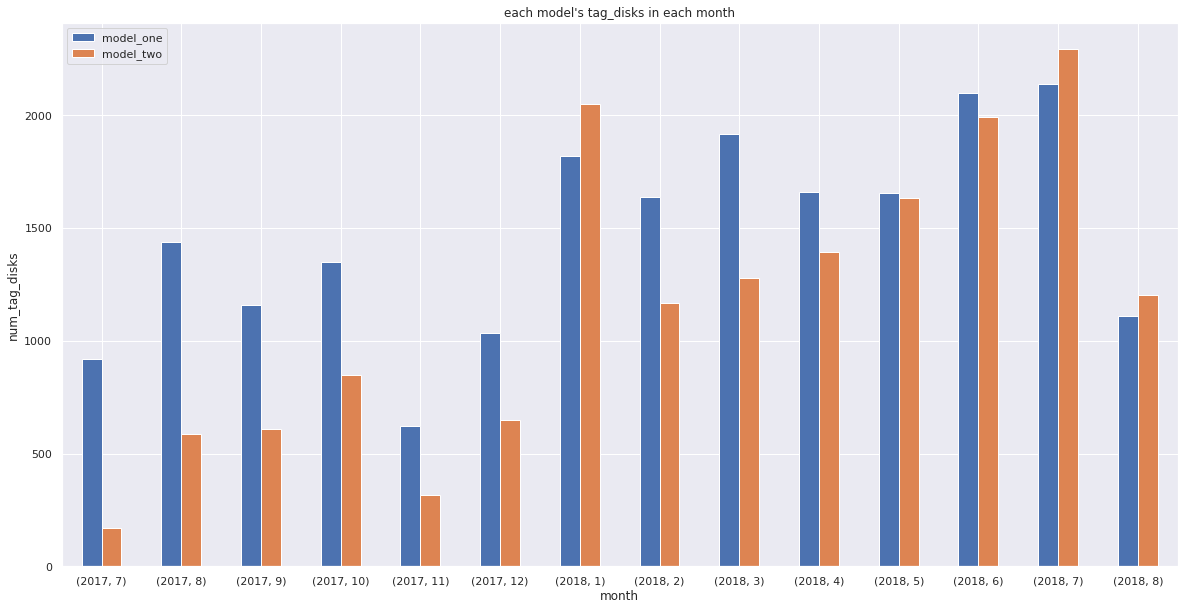

In [43]:
plot_each_month_fault_disk_num_with_model_id('tag')

In [21]:
train_fe_df.tag.value_counts()

0    55996313
1       36737
Name: tag, dtype: int64

In [15]:
# plot the each month the num of normal disk and fault disk
def plot_each_month_fault_disk_num_and_normal_disk_num(using_label):
    train_fe_df['year'] =  train_fe_df['dt'].dt.year.astype(np.int32)
    train_fe_df['month'] = train_fe_df['dt'].dt.month.astype(np.int32)
    train_temp_df  = train_fe_df[['month',using_label,'model','year']]
    train_temp_group = train_temp_df.groupby(['year','month'])
    temp_model_one = pd.Series(train_temp_group.apply(lambda x: len(x[x[using_label]==1])))
    temp_model_two = pd.Series(train_temp_group.apply(lambda x: len(x[x[using_label]==0])))
    df = pd.DataFrame({"fault_disk":temp_model_one,"normal_disk":temp_model_two})
    print(df)
    ax = df.plot.bar( rot=0, title="%s_disks in each month"%using_label)
    ax.set_xlabel("month")
    ax.set_ylabel("num_disks")
    plt.show()

            fault_disk  normal_disk
year month                         
2018 1            3868      4424380
     2            2803      4080636
     3            3194      4563219
     4            3055      4460292
     5            3287      4644702
     6            4090      4643344
     7            4433      4851299
     8            2312      5159425


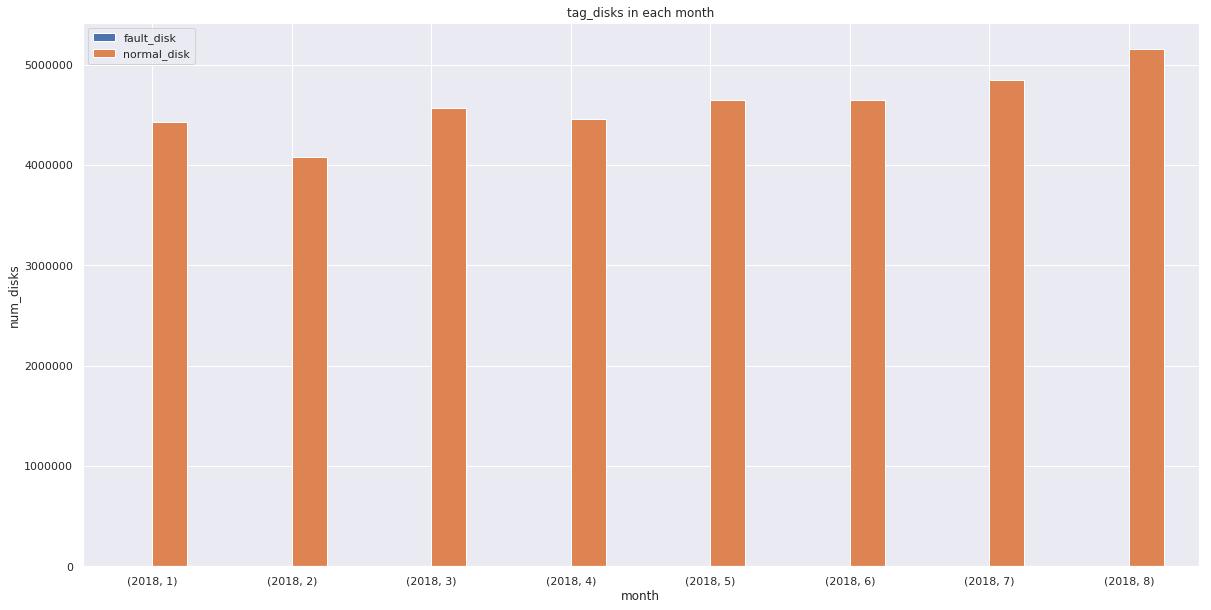

In [16]:
plot_each_month_fault_disk_num_and_normal_disk_num('tag')

In [31]:
def plot_each_date_fault_disk_num_and_normal_disk_num(using_label,start_date, end_date):
    train_fe_df['weekday'] =  train_fe_df['dt'].dt.weekday.astype(np.int8)
    train_temp_df = train_fe_df[(train_fe_df.dt>=start_date) & (train_fe_df.dt<=end_date)]
    train_temp_df  = train_temp_df[['weekday',using_label]]
    train_temp_group = train_temp_df.groupby(['weekday'])
    temp_model_one = pd.Series(train_temp_group.apply(lambda x: len(x[x[using_label]==1])))
    temp_model_two = pd.Series(train_temp_group.apply(lambda x: len(x[x[using_label]==0])))
    df = pd.DataFrame({"fault_disk":temp_model_one,"normal_disk":temp_model_two})
    df['fault_disk_and_normal_disk_ratio'] = round(df['fault_disk']/df['normal_disk'],7)
    print(df)
    ax = df[['fault_disk','normal_disk']].plot.bar( rot=0, title="%s_disks in each month"%using_label)
    ax.set_xlabel("weekday")
    ax.set_ylabel("num_disks")
    plt.show()

         fault_disk  normal_disk  fault_disk_and_normal_disk_ratio
weekday                                                           
0              3617      4623174                          0.000782
1              3570      4556314                          0.000784
2              3539      4498990                          0.000787
3              3560      4505942                          0.000790
4              3493      4506776                          0.000775
5              3463      4488823                          0.000772
6              3488      4487853                          0.000777


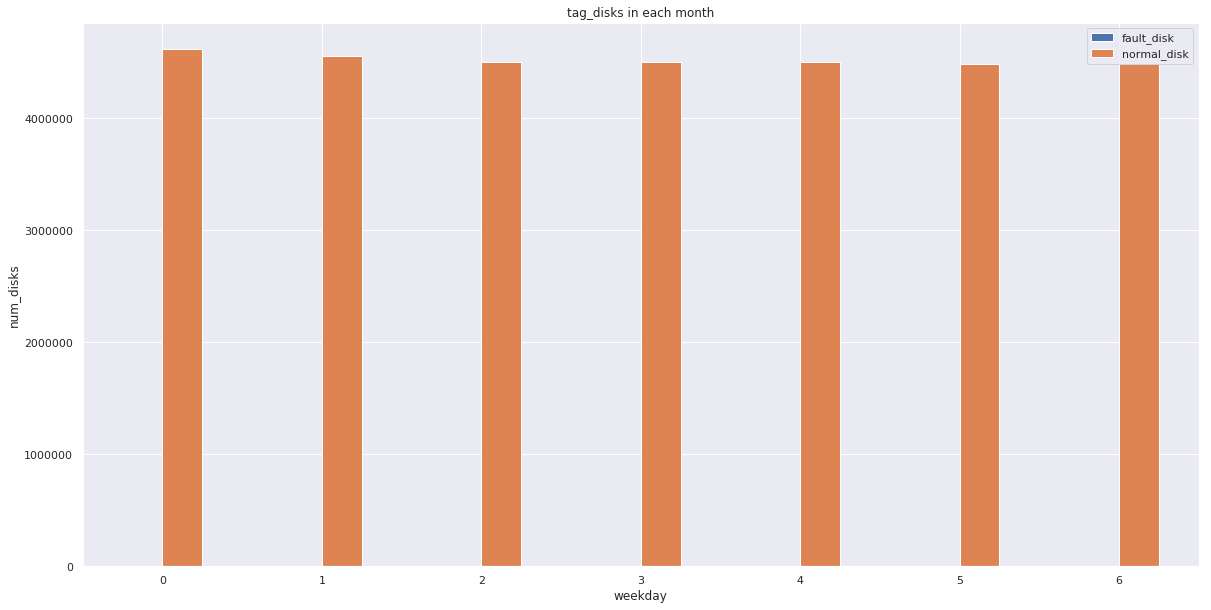

In [33]:
plot_each_date_fault_disk_num_and_normal_disk_num('tag','2018-01-01','2018-07-31')

In [16]:
# show the smart_9raw realtion with fault disk
tmp_df = train_fe_df[index_cols + ['smart_9raw','smart_9_normalized'] + label_cols]

In [17]:
tmp_df.head()

,serial_number,model,dt,smart_9raw,smart_9_normalized,tag,flag,30_day
1111566,disk_21087,1,2018-01-01,10483.0,89.0,0,0,0
3427638,disk_69256,2,2018-01-01,3433.0,97.0,0,0,0
1457138,disk_41304,1,2018-01-01,29782.0,67.0,0,0,0
2913767,disk_73081,2,2018-01-01,234.0,100.0,0,0,0
2473882,disk_9590,1,2018-01-01,15019.0,83.0,0,0,0


In [18]:
tmp_df['smart_9raw_in_day_unit'] = tmp_df['smart_9raw']//24

e:\utility\conda\envs\python3.7\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
tmp_df.head()

,serial_number,model,dt,smart_9raw,smart_9_normalized,tag,flag,30_day,smart_9raw_in_day_unit
1111566,disk_21087,1,2018-01-01,10483.0,89.0,0,0,0,436.0
3427638,disk_69256,2,2018-01-01,3433.0,97.0,0,0,0,143.0
1457138,disk_41304,1,2018-01-01,29782.0,67.0,0,0,0,1240.0
2913767,disk_73081,2,2018-01-01,234.0,100.0,0,0,0,9.0
2473882,disk_9590,1,2018-01-01,15019.0,83.0,0,0,0,625.0


In [25]:
fault_tmp_df['smart_9raw_in_day_unit'].describe()

count     884.000000
mean      658.374451
std       463.352325
min         0.000000
25%       234.000000
50%       603.500000
75%      1055.250000
max      1788.000000
Name: smart_9raw_in_day_unit, dtype: float64

In [29]:
tmp_df[(tmp_df.smart_9raw_in_day_unit==0)&(tmp_df.tag==0)]

,serial_number,model,dt,smart_9raw,smart_9_normalized,tag,flag,30_day,smart_9raw_in_day_unit
369293,disk_98075,1,2018-01-03,14.0,100.0,0,0,0,0.0
4256976,disk_143178,2,2018-01-03,12.0,100.0,0,0,0,0.0
876958,disk_73313,1,2018-01-04,12.0,100.0,0,0,0,0.0
820634,disk_57948,1,2018-01-05,13.0,100.0,0,0,0,0.0
3991442,disk_127634,2,2018-01-06,15.0,100.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
3686820,disk_108361,2,2018-08-30,14.0,100.0,0,0,0,0.0
4296592,disk_99090,2,2018-08-30,10.0,100.0,0,0,0,0.0
4824698,disk_31537,2,2018-08-31,14.0,100.0,0,0,0,0.0
3573235,disk_36529,2,2018-08-31,17.0,100.0,0,0,0,0.0


In [30]:
fault_tmp_df[fault_tmp_df.smart_9raw_in_day_unit<=234]

,smart_9raw_in_day_unit,flag
3543913,82.0,1
3873194,195.0,1
3610118,175.0,1
3351905,114.0,1
3091278,130.0,1
...,...,...
1899852,0.0,1
4249610,105.0,1
4000443,233.0,1
4694611,234.0,1


<Figure size 1080x576 with 0 Axes>

Text(0.5,1,'smart_9raw_in_day_unit distirbution against flag')

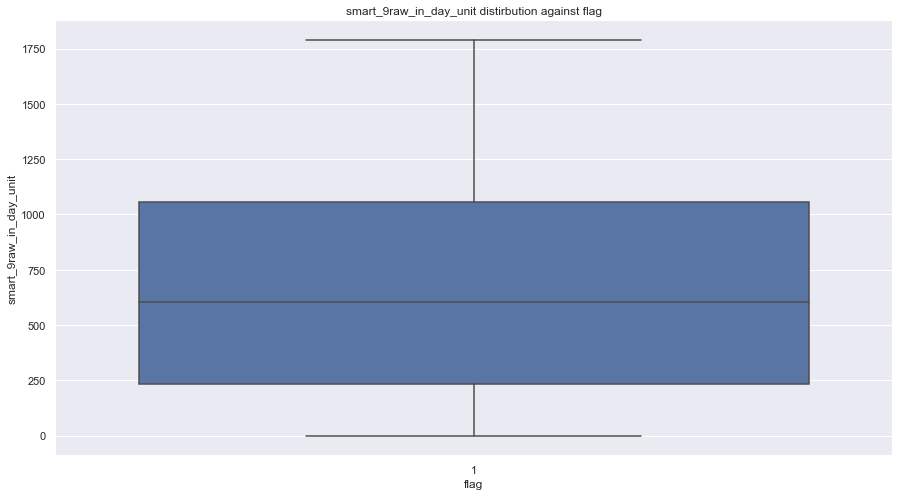

In [24]:
fault_tmp_df = tmp_df[tmp_df.flag==1]
fault_tmp_df = fault_tmp_df[['smart_9raw_in_day_unit','flag']]
# fault_tmp_df.groupby(['smart_9raw_in_day_unit']).apply(lambda x:len(x)).plot(kind='hist')
plt.figure(figsize=(15,8))
sns.boxplot(x='flag', y='smart_9raw_in_day_unit',  data=fault_tmp_df)
plt.title('%s distirbution against flag' % 'smart_9raw_in_day_unit')
plt.show()

In [ ]:
tmp_df = tmp_df[['smart_9raw_in_day_unit','flag']]
tmp_df = tmp_df[tmp_df.flag==1]
plt.figure(figsize=(15,8))
sns.boxplot(x='flag', y='smart_9raw_in_day_unit',  data=tmp_df)
plt.title('%s distirbution against flag' % 'smart_9raw_in_day_unit')
plt.show()

In [22]:
# show how many records each disk has
tmp_df = train_test_df[['model','serial_number','dt']]

In [25]:
mask = tmp_df.model==1

In [26]:
model_one_tmp_df = tmp_df[mask]

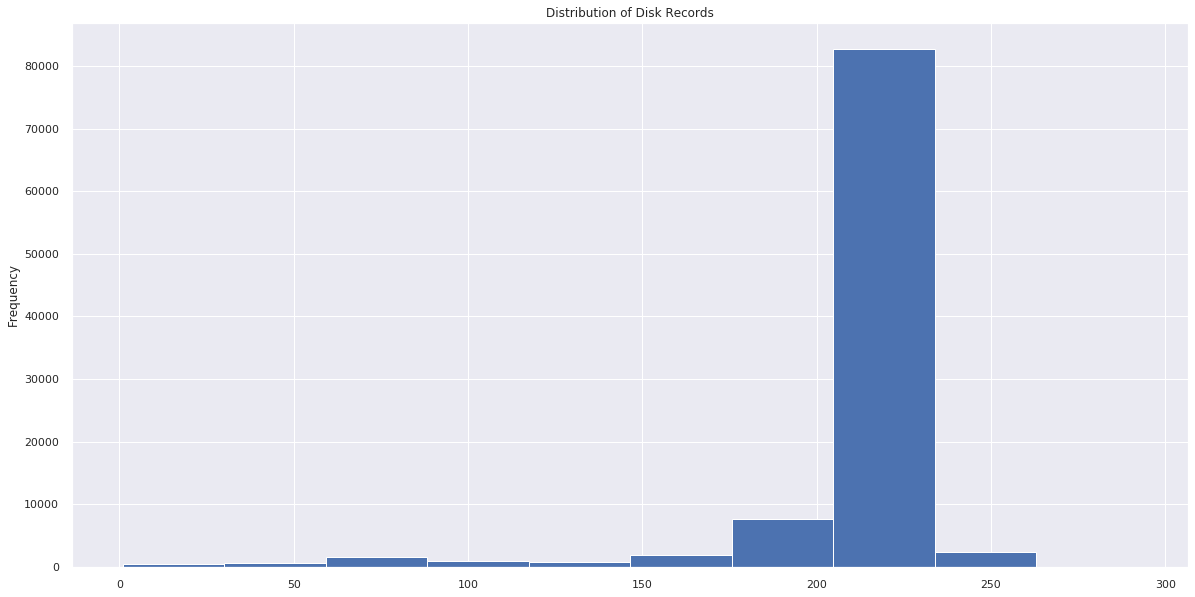

In [27]:
model_one_tmp_df.groupby(['model','serial_number']).apply(lambda x:len(x)).plot(kind='hist', title='Distribution of Disk Records')

In [39]:
print(model_one_tmp_df.groupby(['model','serial_number']).apply(lambda x:len(x)))

model  serial_number
1      disk_0           204
       disk_10          216
       disk_100         209
       disk_1000        204
       disk_10000       196
                       ... 
       disk_9999        207
       disk_99991        82
       disk_99992       199
       disk_99994       211
       disk_99996       210
Length: 98856, dtype: int64


### <a id='2'> 2.show feature difference between normal and fault</a>

In [12]:
temp_fault_df = train_fe_df[train_fe_df.flag==1]
temp_normal_df = train_fe_df[train_fe_df.flag==0]

In [13]:
mask = train_fe_df.serial_number.isin(temp_normal_df.serial_number)
mask &= train_fe_df.model.isin(temp_normal_df.model)
train_normal_df = train_fe_df[mask]

In [14]:
mask = train_fe_df.serial_number.isin(temp_fault_df.serial_number)
mask &= train_fe_df.model.isin(temp_fault_df.model)
train_fault_df = train_fe_df[mask]

In [15]:
train_normal_df.head()

,serial_number,manufacturer,model,smart_1_normalized,smart_1raw,smart_3_normalized,smart_3raw,smart_4_normalized,smart_4raw,smart_5_normalized,smart_5raw,smart_7_normalized,smart_7raw,smart_9_normalized,smart_9raw,smart_10_normalized,smart_10raw,smart_12_normalized,smart_12raw,smart_184_normalized,smart_184raw,smart_187_normalized,smart_187raw,smart_188_normalized,smart_188raw,smart_189_normalized,smart_189raw,smart_190_normalized,smart_190raw,smart_191_normalized,smart_191raw,smart_192_normalized,smart_192raw,smart_193_normalized,smart_193raw,smart_194_normalized,smart_194raw,smart_195_normalized,smart_195raw,smart_197_normalized,smart_197raw,smart_198_normalized,smart_198raw,smart_199_normalized,smart_199raw,smart_240_normalized,smart_240raw,smart_241_normalized,smart_241raw,smart_242_normalized,smart_242raw,dt,tag,flag,30_day
900787,disk_19610,A,1,80.0,106072672.0,96.0,0.0,100.0,21.0,100.0,0.0,85.0,3.673341e+08,93.0,6501.0,100.0,0.0,100.0,21.0,100.0,0.0,100.0,0.0,100.0,0.0,99.0,1.0,69.0,31.0,100.0,0.0,100.0,20.0,100.0,340.0,31.0,31.0,54.0,106072672.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09,0,0,0
494592,disk_122239,A,2,78.0,65583096.0,87.0,0.0,100.0,46.0,100.0,0.0,90.0,1.006709e+09,94.0,5260.0,100.0,0.0,100.0,46.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,75.0,25.0,96.0,9270.0,100.0,27.0,100.0,154.0,25.0,25.0,6.0,65583096.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,3.010343e+13,100.0,9.506606e+10,100.0,1.947733e+10,2017-07-09,0,0,0
168672,disk_90720,A,1,78.0,78759176.0,96.0,0.0,100.0,13.0,100.0,0.0,84.0,3.298287e+08,91.0,7967.0,100.0,0.0,100.0,13.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,72.0,28.0,100.0,0.0,100.0,12.0,100.0,425.0,28.0,28.0,41.0,78759176.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09,0,0,0
644986,disk_83973,A,1,81.0,134480480.0,96.0,0.0,100.0,21.0,100.0,0.0,83.0,2.089173e+08,89.0,10501.0,100.0,0.0,100.0,21.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,72.0,28.0,100.0,0.0,100.0,20.0,100.0,445.0,28.0,28.0,46.0,134480480.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09,0,0,0
1562889,disk_55502,A,2,100.0,13828.0,85.0,0.0,100.0,21.0,100.0,0.0,66.0,4.279574e+06,99.0,913.0,100.0,0.0,100.0,21.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,75.0,25.0,100.0,15.0,100.0,11.0,100.0,96.0,25.0,25.0,100.0,13828.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,6.222549e+13,100.0,2.499347e+08,100.0,5.024545e+06,2017-07-09,0,0,0


In [16]:
train_fault_df.head()

,serial_number,manufacturer,model,smart_1_normalized,smart_1raw,smart_3_normalized,smart_3raw,smart_4_normalized,smart_4raw,smart_5_normalized,smart_5raw,smart_7_normalized,smart_7raw,smart_9_normalized,smart_9raw,smart_10_normalized,smart_10raw,smart_12_normalized,smart_12raw,smart_184_normalized,smart_184raw,smart_187_normalized,smart_187raw,smart_188_normalized,smart_188raw,smart_189_normalized,smart_189raw,smart_190_normalized,smart_190raw,smart_191_normalized,smart_191raw,smart_192_normalized,smart_192raw,smart_193_normalized,smart_193raw,smart_194_normalized,smart_194raw,smart_195_normalized,smart_195raw,smart_197_normalized,smart_197raw,smart_198_normalized,smart_198raw,smart_199_normalized,smart_199raw,smart_240_normalized,smart_240raw,smart_241_normalized,smart_241raw,smart_242_normalized,smart_242raw,dt,tag,flag,30_day
1173620,disk_71012,A,1,80.0,108572536.0,95.0,0.0,100.0,17.0,100.0,0.0,85.0,3.849377e+08,82.0,16146.0,100.0,0.0,100.0,17.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,72.0,28.0,100.0,0.0,100.0,16.0,100.0,687.0,28.0,28.0,48.0,108572536.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09,0,0,0
168958,disk_93287,A,1,80.0,103436424.0,96.0,0.0,100.0,48.0,100.0,0.0,83.0,2.179726e+08,94.0,5703.0,100.0,0.0,100.0,48.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,72.0,28.0,100.0,0.0,100.0,47.0,100.0,316.0,28.0,28.0,49.0,103436424.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09,0,0,0
1295423,disk_138774,A,1,81.0,127546560.0,95.0,0.0,100.0,12.0,100.0,0.0,92.0,1.717874e+09,79.0,18794.0,100.0,0.0,100.0,12.0,100.0,0.0,100.0,0.0,100.0,0.0,99.0,1.0,69.0,31.0,100.0,0.0,100.0,11.0,100.0,797.0,31.0,31.0,51.0,127546560.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09,0,0,0
1173104,disk_68474,A,1,78.0,59456832.0,95.0,0.0,100.0,11.0,97.0,494.0,90.0,1.198304e+09,81.0,17385.0,100.0,0.0,100.0,11.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,74.0,26.0,100.0,0.0,100.0,10.0,100.0,733.0,26.0,26.0,39.0,59456832.0,100.0,83.0,100.0,83.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09,0,0,0
641120,disk_60212,A,1,79.0,95562672.0,95.0,0.0,100.0,11.0,100.0,0.0,93.0,2.301156e+09,78.0,19606.0,100.0,0.0,100.0,11.0,100.0,0.0,100.0,0.0,100.0,0.0,82.0,18.0,72.0,28.0,100.0,0.0,100.0,10.0,100.0,832.0,28.0,28.0,59.0,95562672.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09,0,0,0


In [17]:
group_cols = ['model', 'serial_number']
train_fault_sub_dfs = dict(tuple(train_fault_df.groupby(group_cols)))
train_normal_sub_dfs = dict(tuple(train_normal_df.groupby(group_cols)))

In [18]:
train_normal_sub_dfs[(1, 'disk_21087')]

,serial_number,manufacturer,model,smart_1_normalized,smart_1raw,smart_3_normalized,smart_3raw,smart_4_normalized,smart_4raw,smart_5_normalized,smart_5raw,smart_7_normalized,smart_7raw,smart_9_normalized,smart_9raw,smart_10_normalized,smart_10raw,smart_12_normalized,smart_12raw,smart_184_normalized,smart_184raw,smart_187_normalized,smart_187raw,smart_188_normalized,smart_188raw,smart_189_normalized,smart_189raw,smart_190_normalized,smart_190raw,smart_191_normalized,smart_191raw,smart_192_normalized,smart_192raw,smart_193_normalized,smart_193raw,smart_194_normalized,smart_194raw,smart_195_normalized,smart_195raw,smart_197_normalized,smart_197raw,smart_198_normalized,smart_198raw,smart_199_normalized,smart_199raw,smart_240_normalized,smart_240raw,smart_241_normalized,smart_241raw,smart_242_normalized,smart_242raw,dt,tag,flag,30_day
1500260,disk_21087,A,1,76.0,46816568.0,96.0,0.0,100.0,23.0,100.0,0.0,82.0,180072336.0,93.0,6836.0,100.0,0.0,100.0,23.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,75.0,25.0,100.0,0.0,100.0,21.0,100.0,354.0,25.0,25.0,56.0,46816568.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-02,0,0,0
720449,disk_21087,A,1,84.0,235394016.0,96.0,0.0,100.0,23.0,100.0,0.0,82.0,181270368.0,93.0,6860.0,100.0,0.0,100.0,23.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,75.0,25.0,100.0,0.0,100.0,21.0,100.0,355.0,25.0,25.0,57.0,235394016.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-03,0,0,0
2144093,disk_21087,A,1,83.0,213431248.0,96.0,0.0,100.0,23.0,100.0,0.0,82.0,181693904.0,93.0,6884.0,100.0,0.0,100.0,23.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,75.0,25.0,100.0,0.0,100.0,21.0,100.0,356.0,25.0,25.0,62.0,213431248.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-04,0,0,0
1284864,disk_21087,A,1,82.0,178678800.0,96.0,0.0,100.0,23.0,100.0,0.0,82.0,182454944.0,93.0,6908.0,100.0,0.0,100.0,23.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,75.0,25.0,100.0,0.0,100.0,21.0,100.0,357.0,25.0,25.0,58.0,178678800.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-05,0,0,0
1622342,disk_21087,A,1,81.0,120612792.0,96.0,0.0,100.0,23.0,100.0,0.0,82.0,183544544.0,93.0,6932.0,100.0,0.0,100.0,23.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,75.0,25.0,100.0,0.0,100.0,21.0,100.0,358.0,25.0,25.0,57.0,120612792.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-06,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805772,disk_21087,A,1,68.0,6786635.0,96.0,0.0,100.0,23.0,100.0,0.0,87.0,505607232.0,82.0,16199.0,100.0,0.0,100.0,23.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,75.0,25.0,100.0,0.0,100.0,21.0,100.0,743.0,25.0,25.0,53.0,6786635.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-27,0,0,0
2022103,disk_21087,A,1,83.0,223121504.0,96.0,0.0,100.0,23.0,100.0,0.0,87.0,506810976.0,82.0,16223.0,100.0,0.0,100.0,23.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,75.0,25.0,100.0,0.0,100.0,21.0,100.0,744.0,25.0,25.0,56.0,223121504.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-28,0,0,0
375255,disk_21087,A,1,83.0,232295968.0,96.0,0.0,100.0,23.0,100.0,0.0,87.0,507160608.0,82.0,16247.0,100.0,0.0,100.0,23.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,75.0,25.0,100.0,0.0,100.0,21.0,100.0,745.0,25.0,25.0,62.0,232295968.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-29,0,0,0
375254,disk_21087,A,1,82.0,175796464.0,96.0,0.0,100.0,23.0,100.0,0.0,87.0,507867360.0,82.0,16267.0,100.0,0.0,100.0,23.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,75.0,25.0,100.0,0.0,100.0,21.0,100.0,746.0,25.0,25.0,58.0,175796464.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-30,0,0,0


Text(0,0.5,'smart_1_normalized')

Text(0.5,0,'dt')

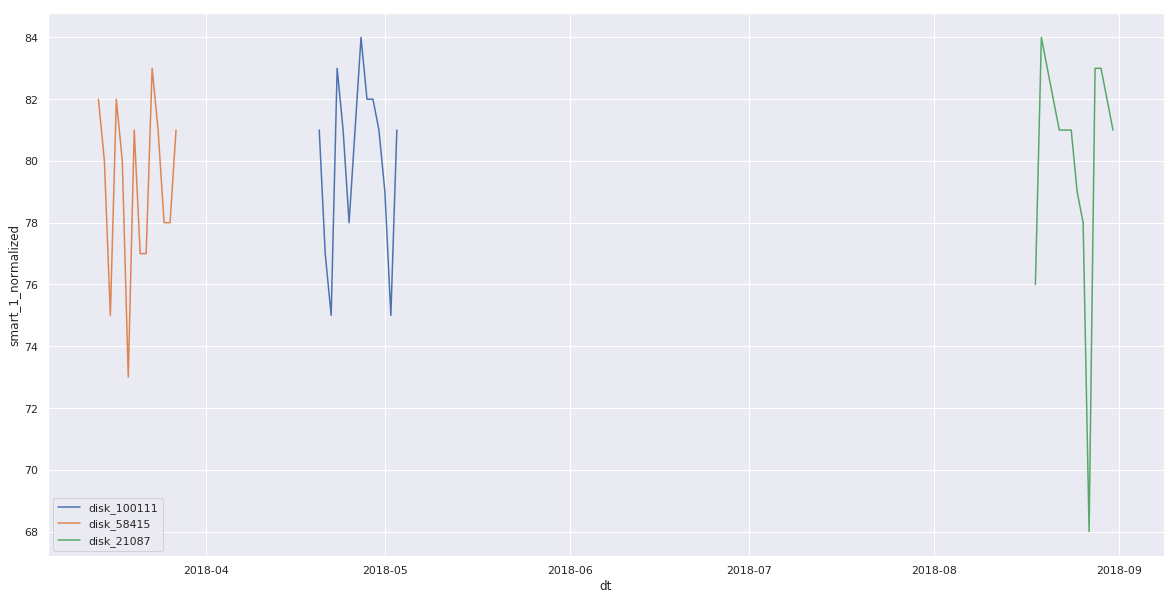

Text(0,0.5,'smart_1raw')

Text(0.5,0,'dt')

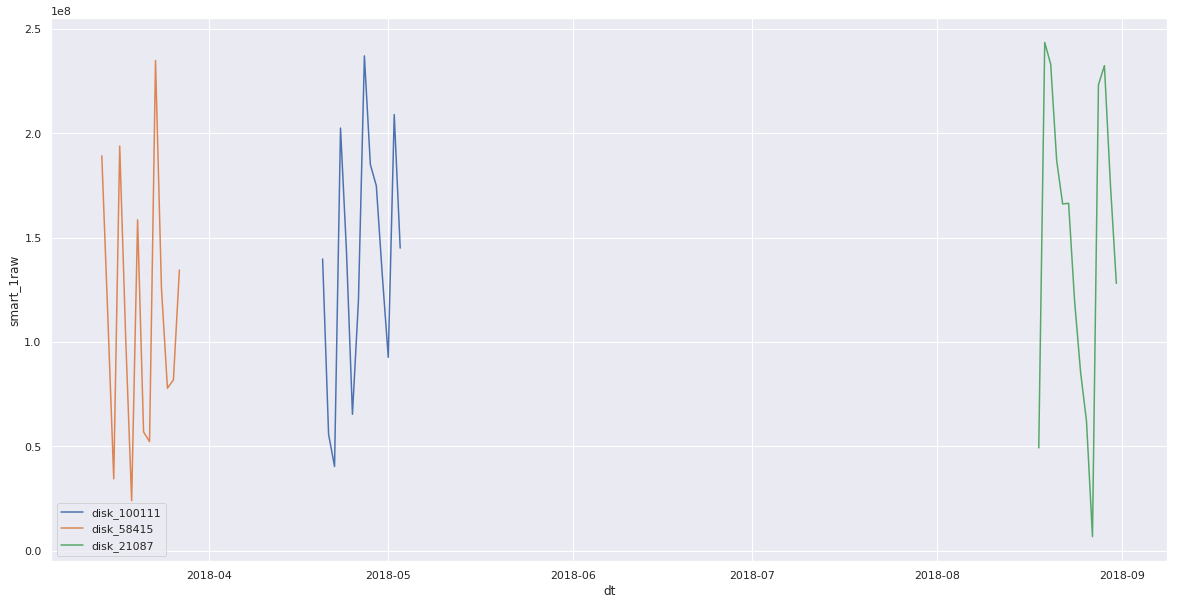

Text(0,0.5,'smart_3_normalized')

Text(0.5,0,'dt')

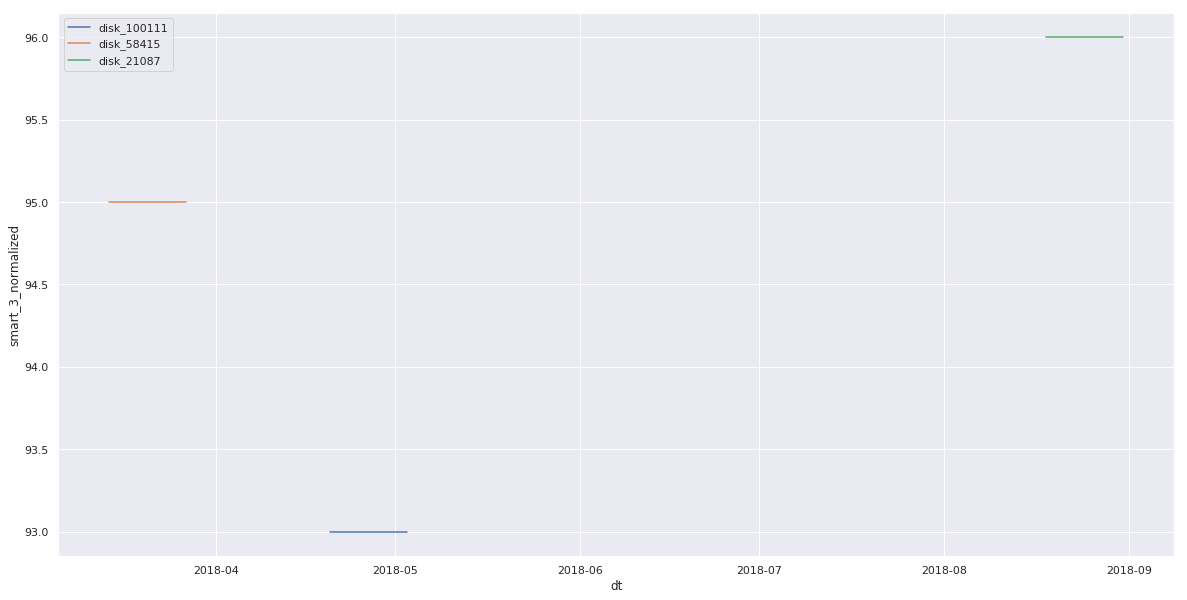

Text(0,0.5,'smart_3raw')

Text(0.5,0,'dt')

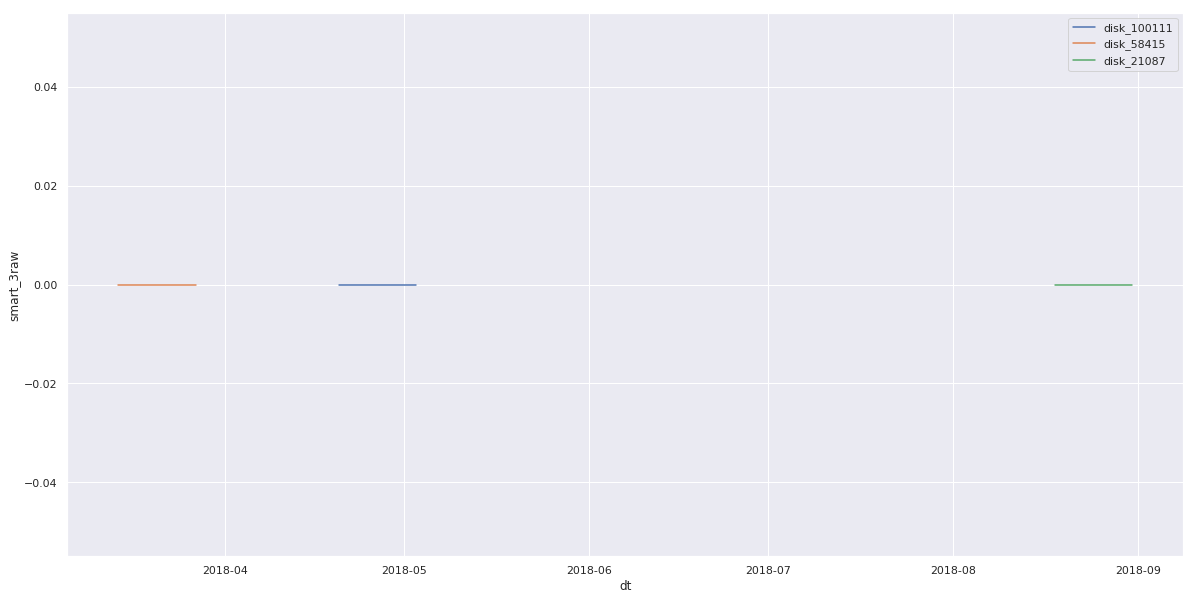

Text(0,0.5,'smart_4_normalized')

Text(0.5,0,'dt')

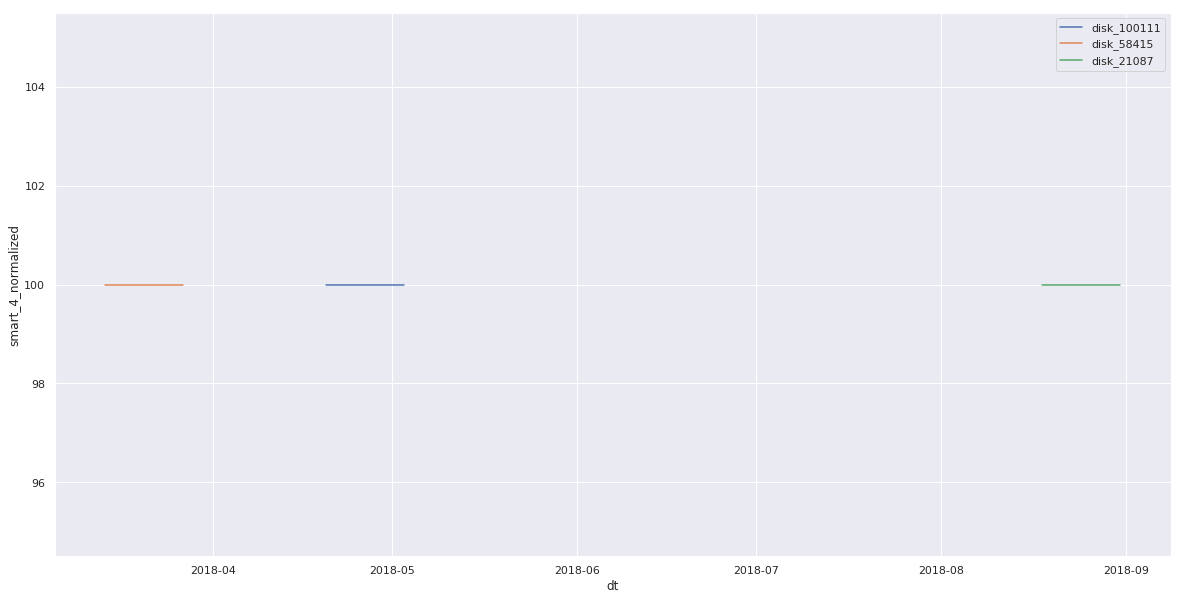

Text(0,0.5,'smart_4raw')

Text(0.5,0,'dt')

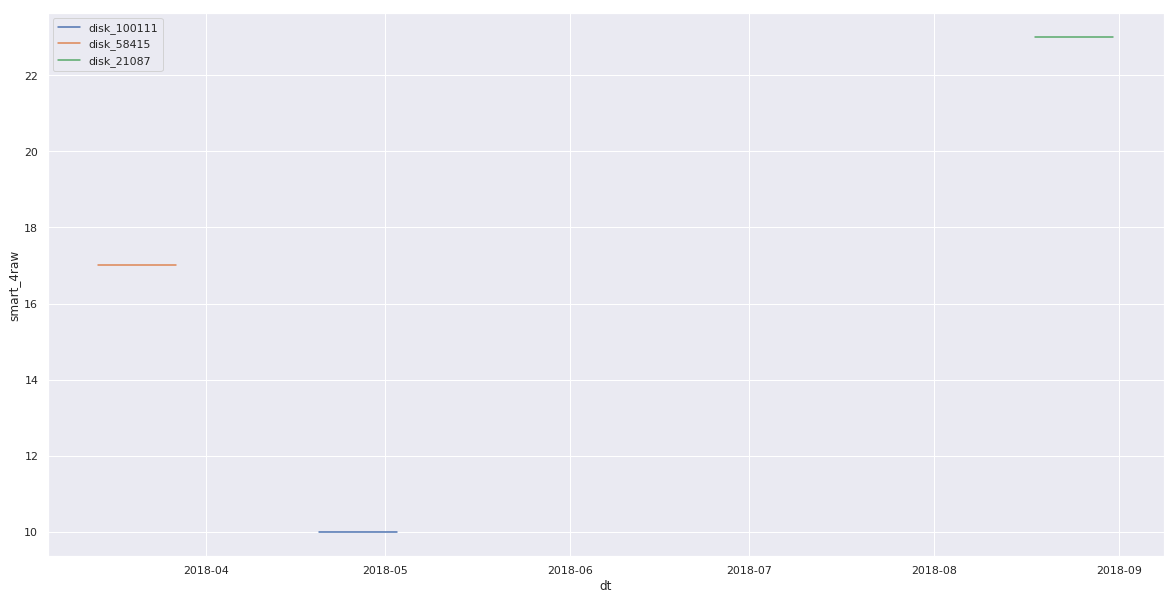

Text(0,0.5,'smart_5_normalized')

Text(0.5,0,'dt')

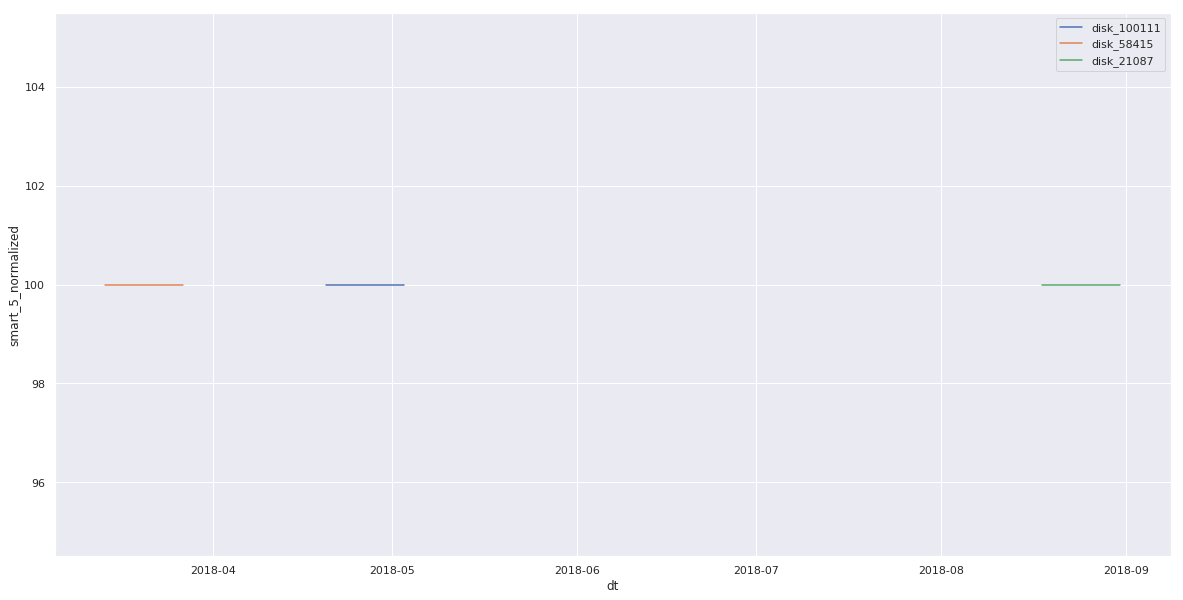

Text(0,0.5,'smart_5raw')

Text(0.5,0,'dt')

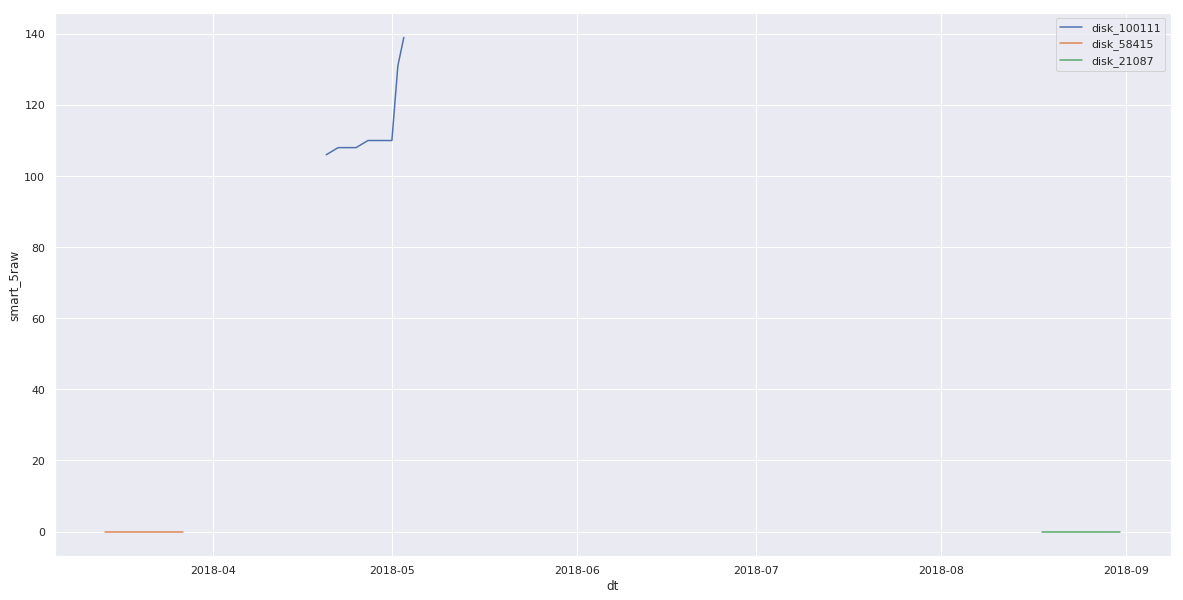

Text(0,0.5,'smart_7_normalized')

Text(0.5,0,'dt')

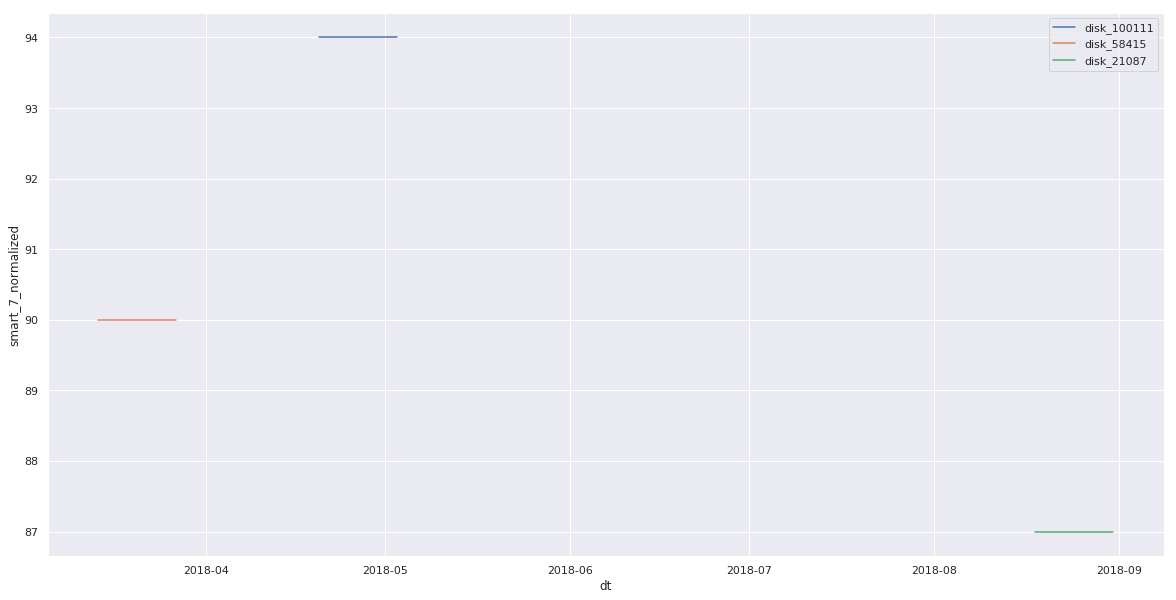

Text(0,0.5,'smart_7raw')

Text(0.5,0,'dt')

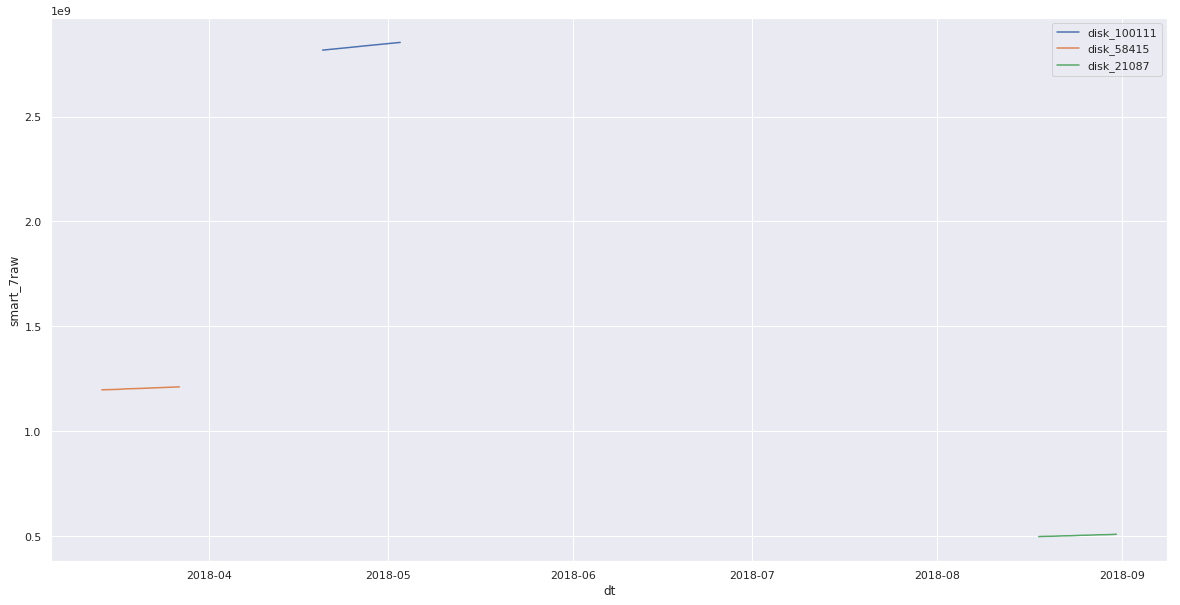

Text(0,0.5,'smart_9_normalized')

Text(0.5,0,'dt')

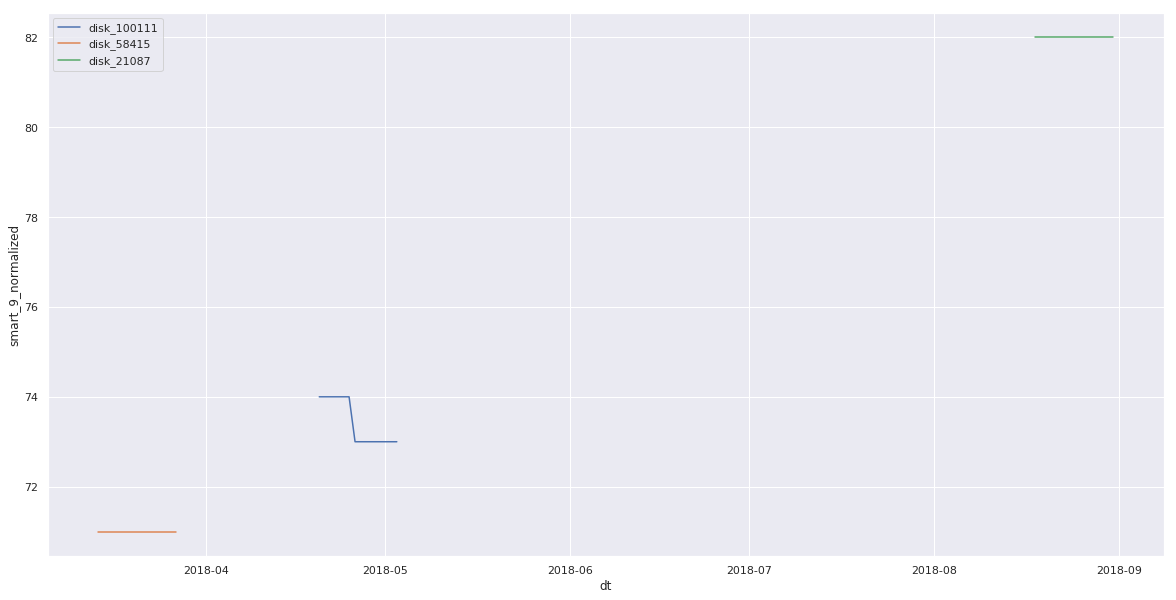

Text(0,0.5,'smart_9raw')

Text(0.5,0,'dt')

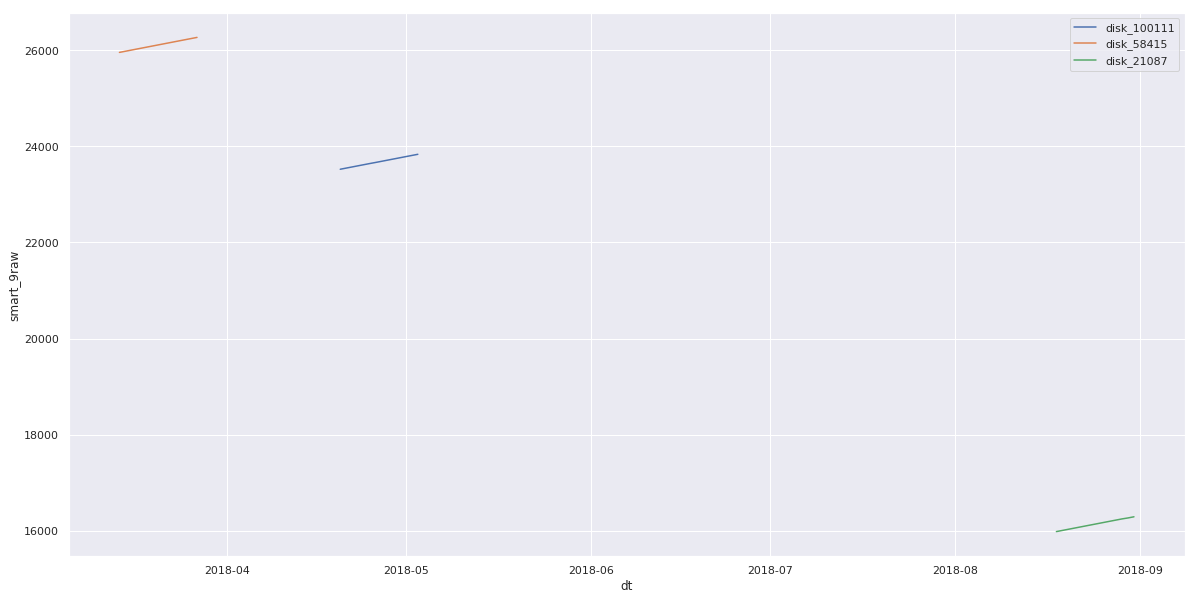

Text(0,0.5,'smart_10_normalized')

Text(0.5,0,'dt')

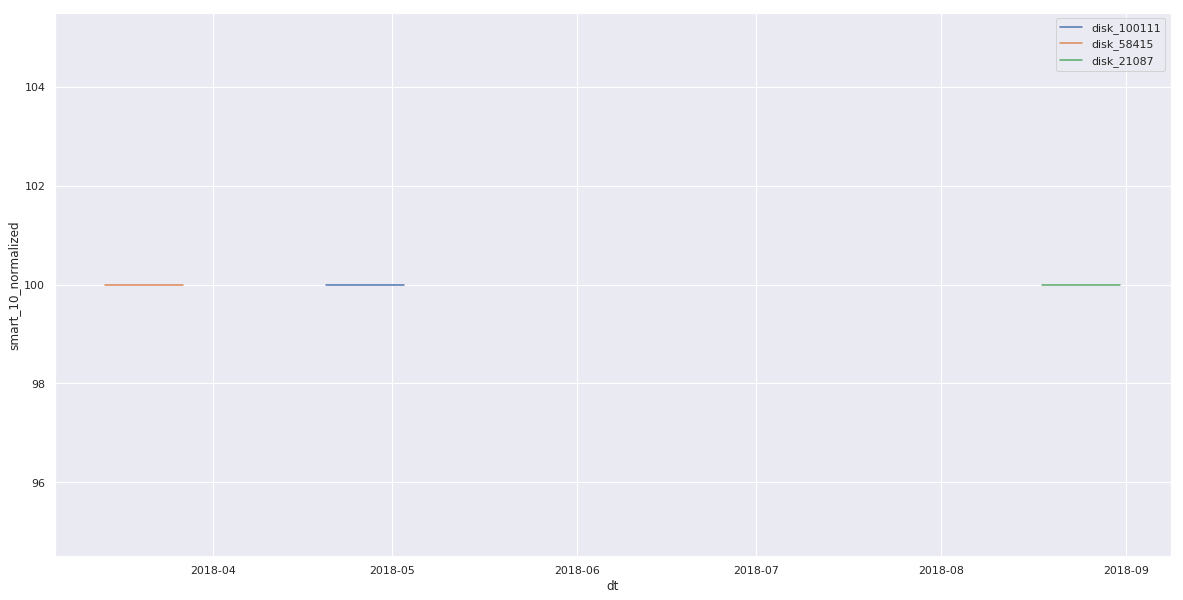

Text(0,0.5,'smart_10raw')

Text(0.5,0,'dt')

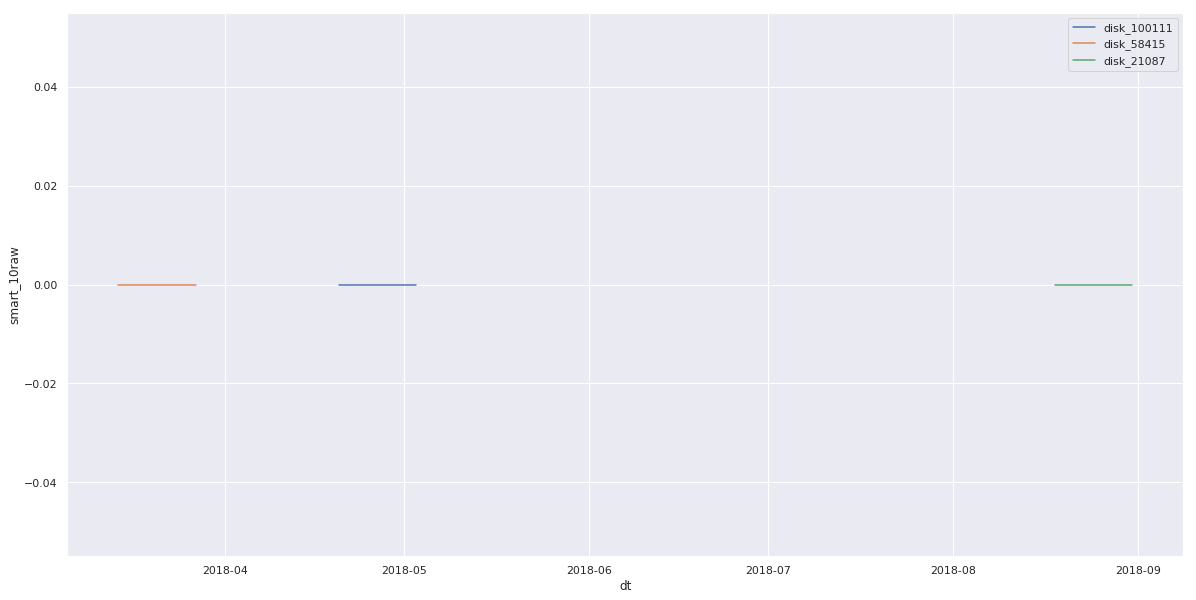

Text(0,0.5,'smart_12_normalized')

Text(0.5,0,'dt')

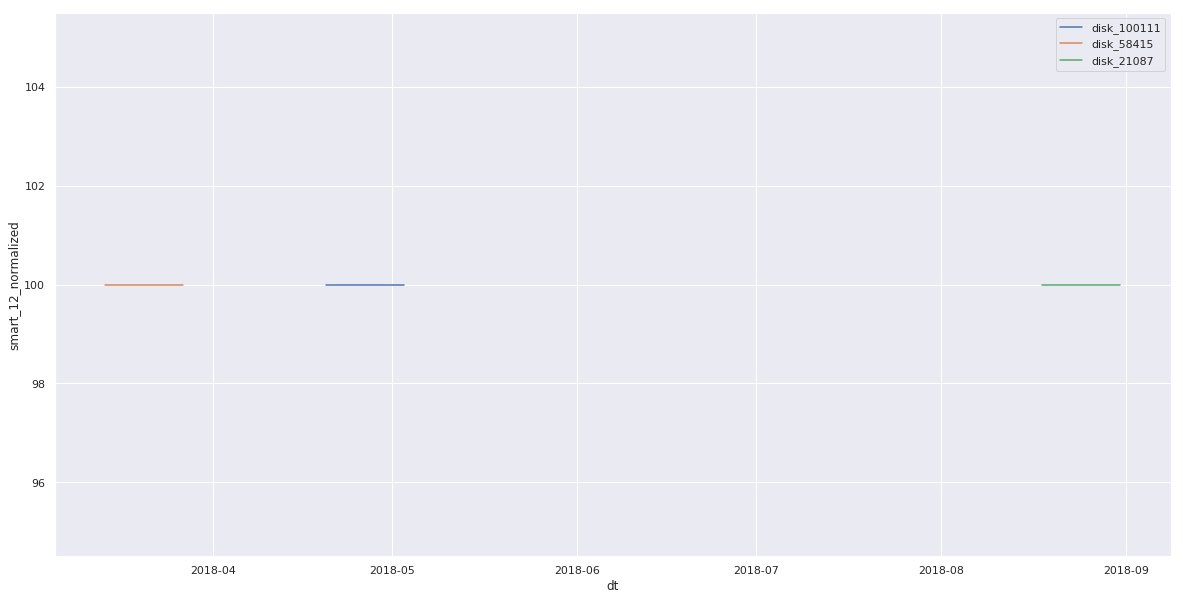

Text(0,0.5,'smart_12raw')

Text(0.5,0,'dt')

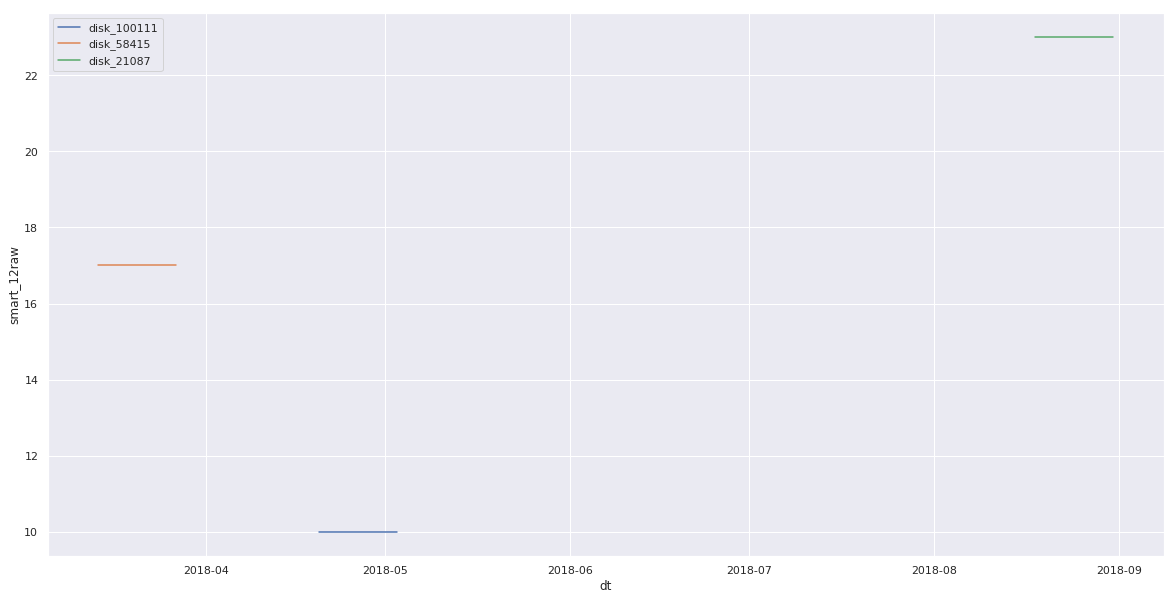

Text(0,0.5,'smart_184_normalized')

Text(0.5,0,'dt')

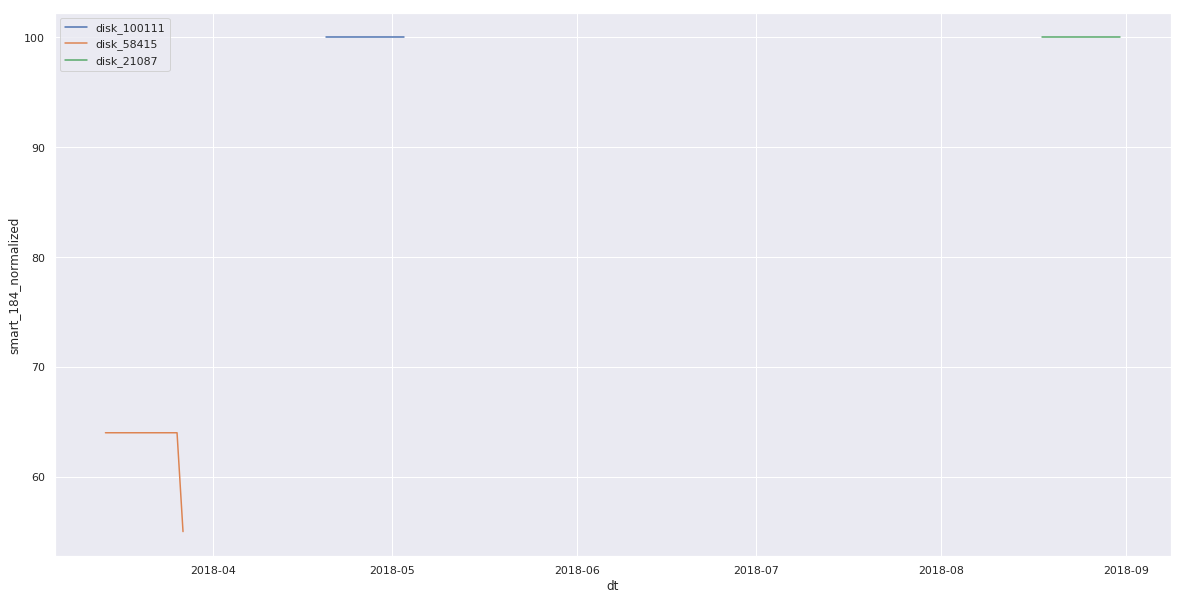

Text(0,0.5,'smart_184raw')

Text(0.5,0,'dt')

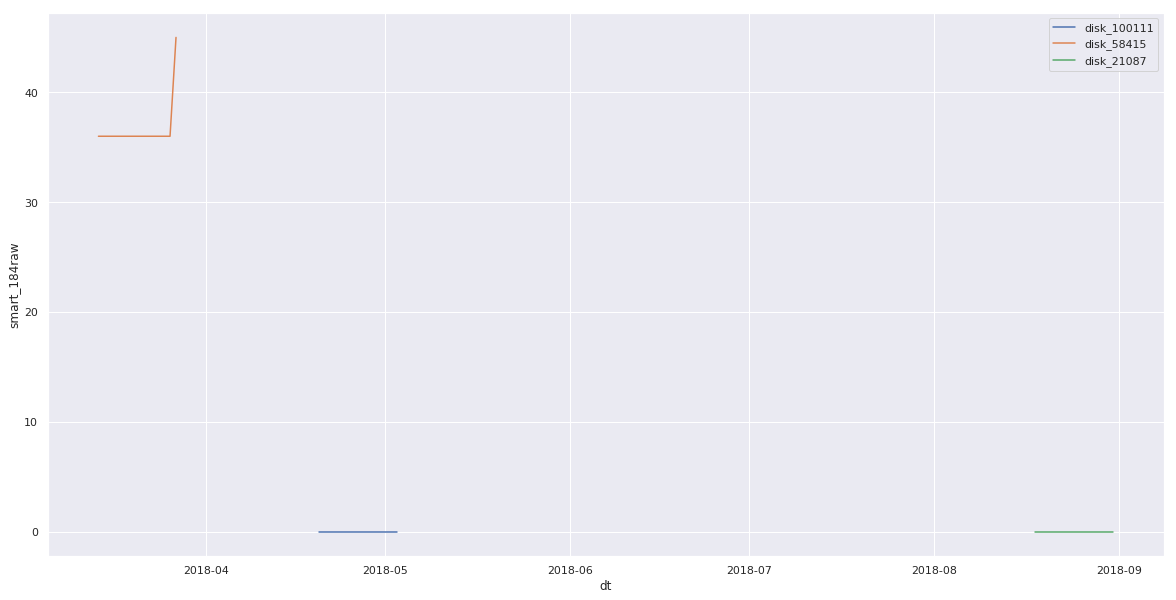

Text(0,0.5,'smart_187_normalized')

Text(0.5,0,'dt')

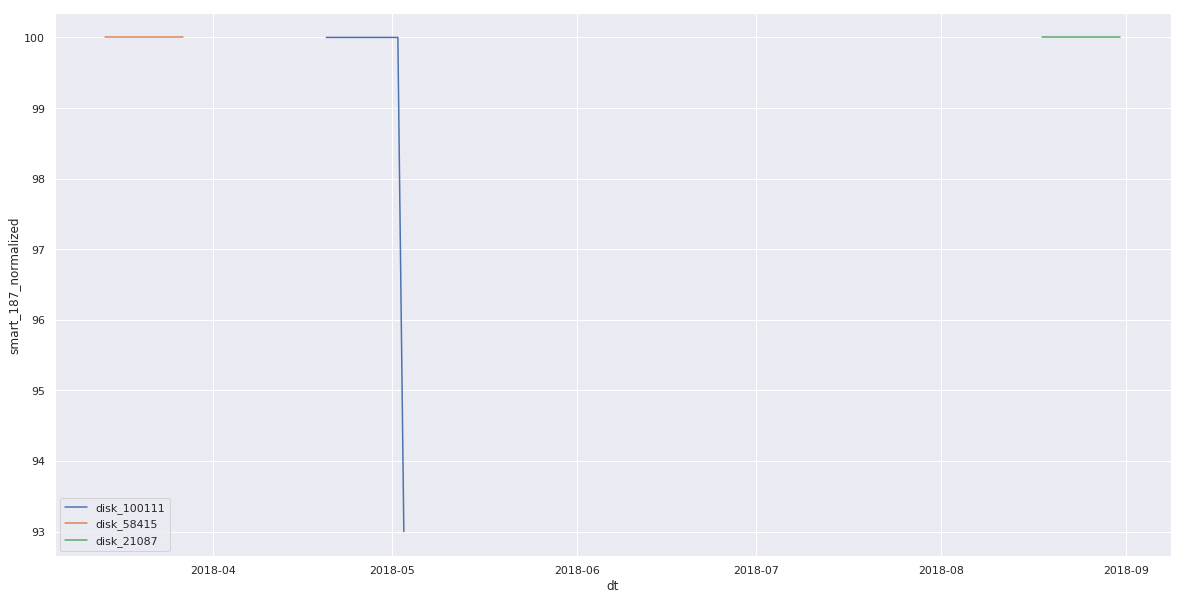

Text(0,0.5,'smart_187raw')

Text(0.5,0,'dt')

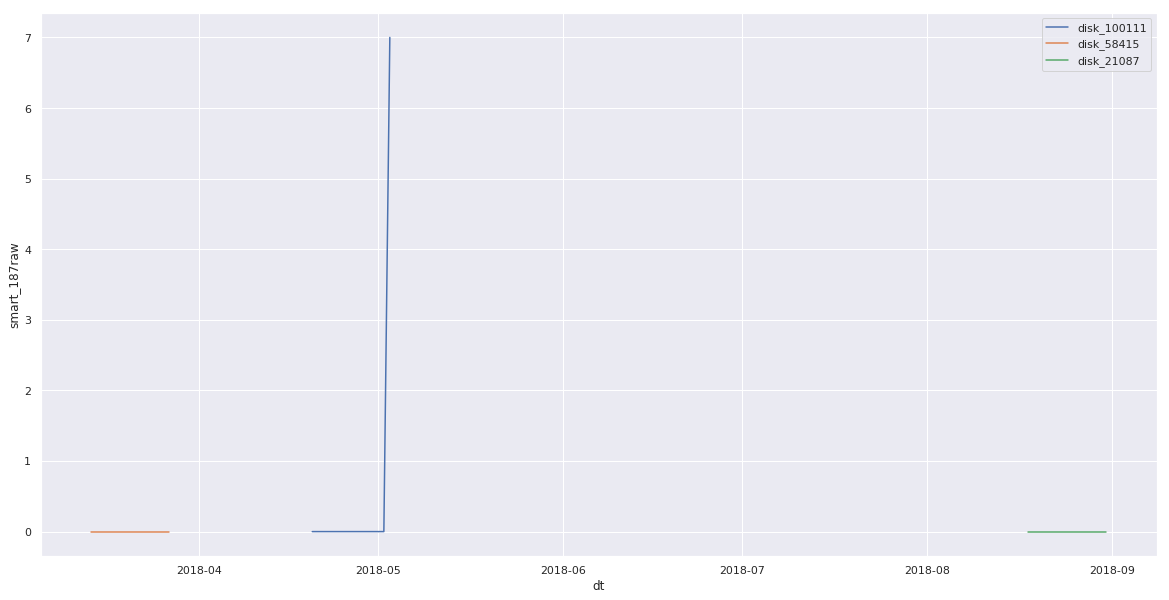

Text(0,0.5,'smart_188_normalized')

Text(0.5,0,'dt')

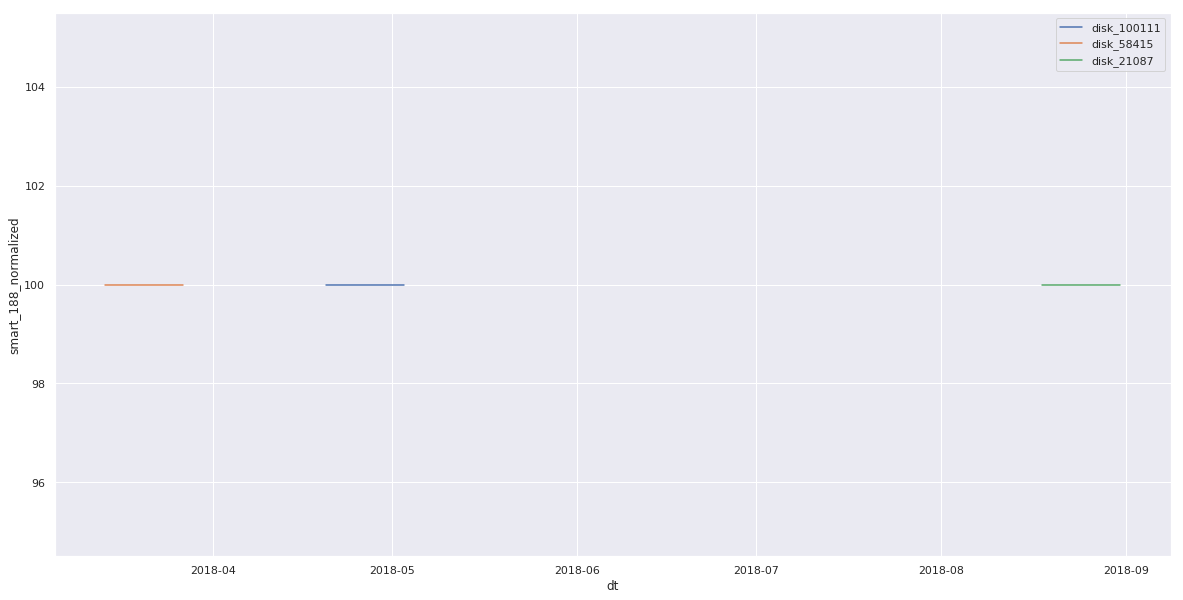

Text(0,0.5,'smart_188raw')

Text(0.5,0,'dt')

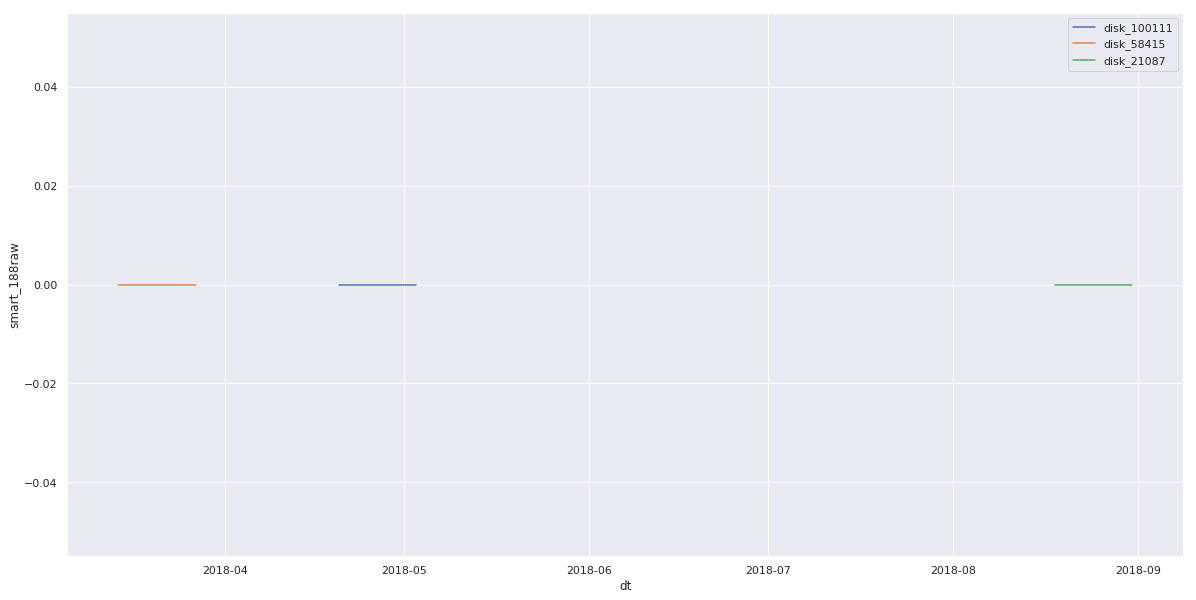

Text(0,0.5,'smart_189_normalized')

Text(0.5,0,'dt')

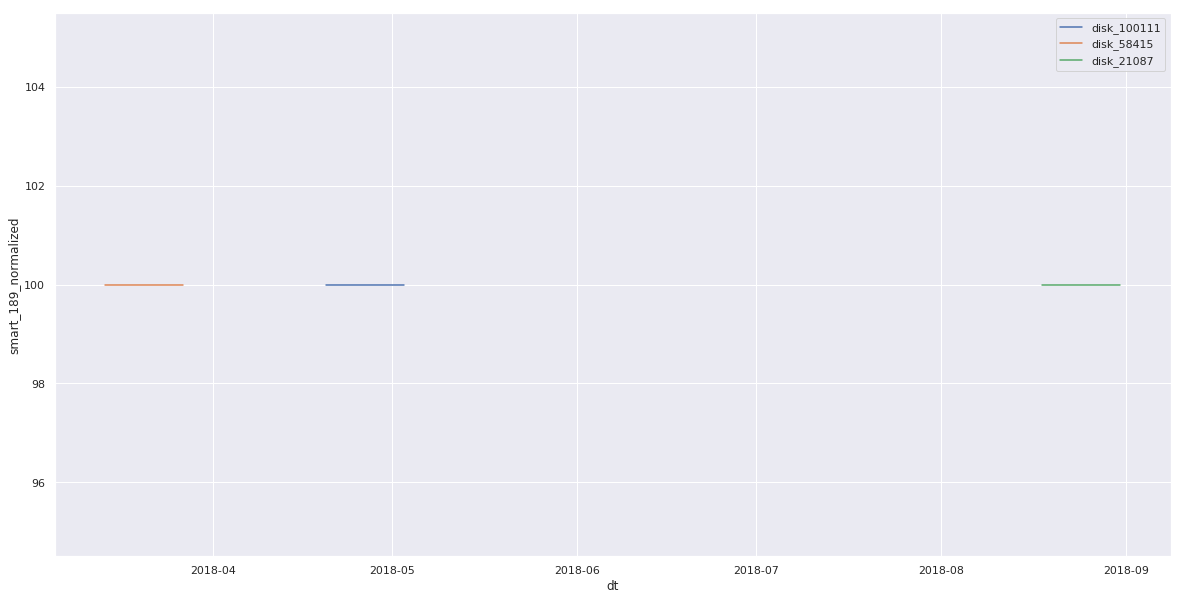

Text(0,0.5,'smart_189raw')

Text(0.5,0,'dt')

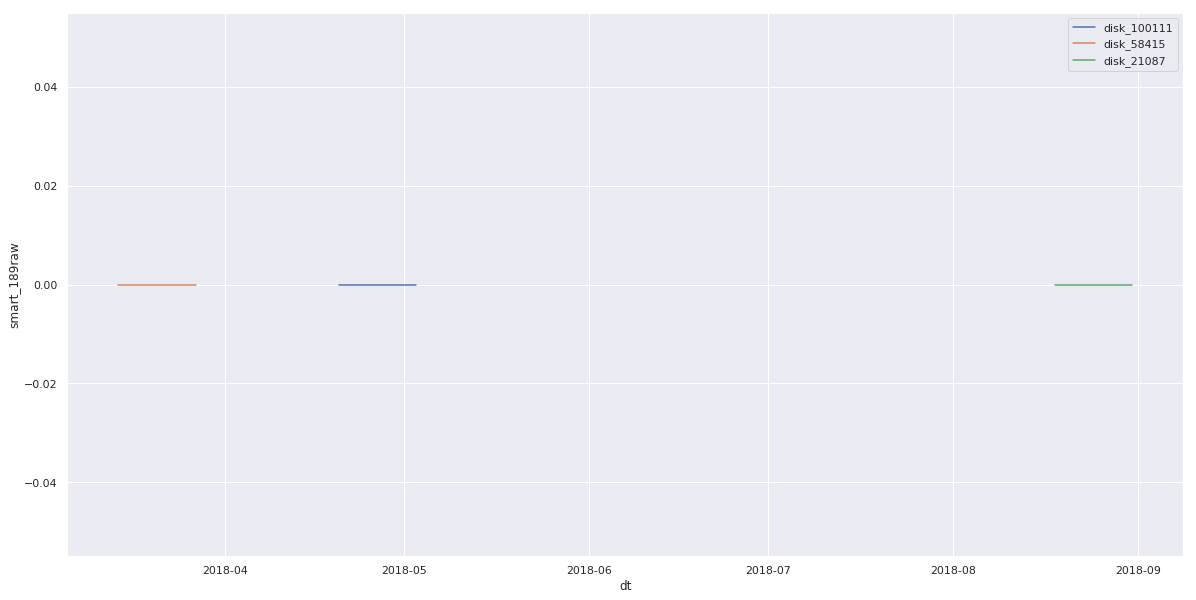

Text(0,0.5,'smart_190_normalized')

Text(0.5,0,'dt')

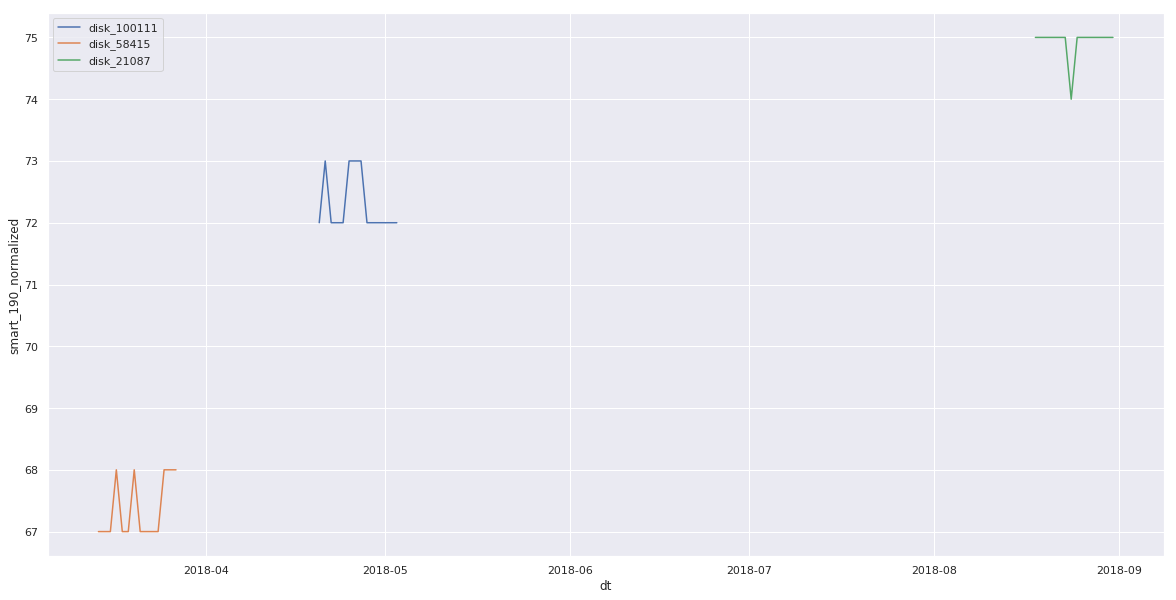

Text(0,0.5,'smart_190raw')

Text(0.5,0,'dt')

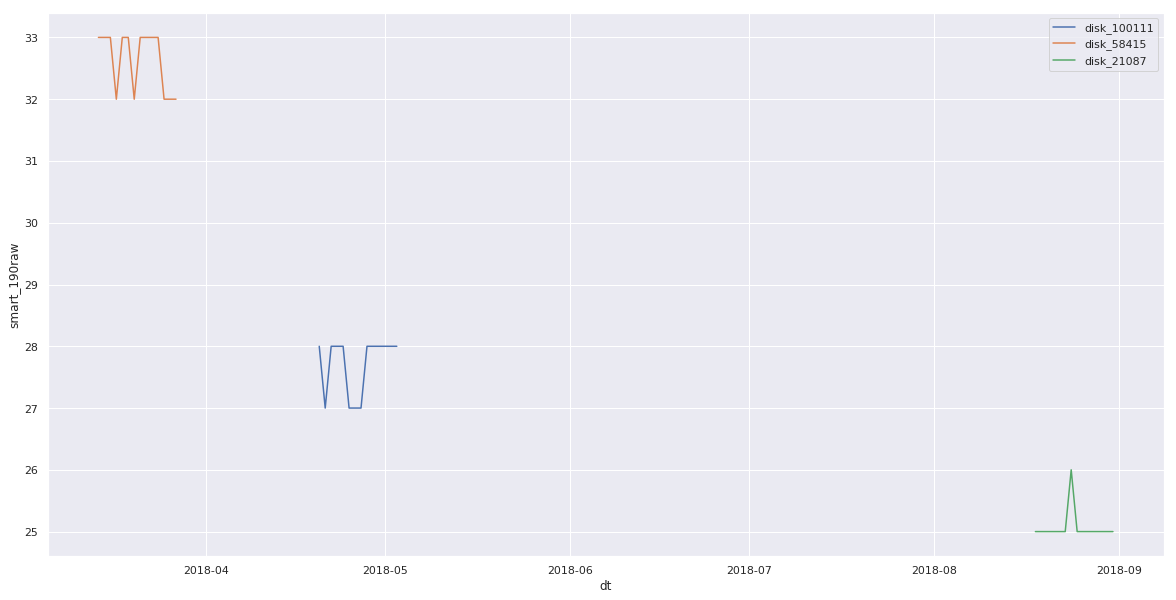

Text(0,0.5,'smart_191_normalized')

Text(0.5,0,'dt')

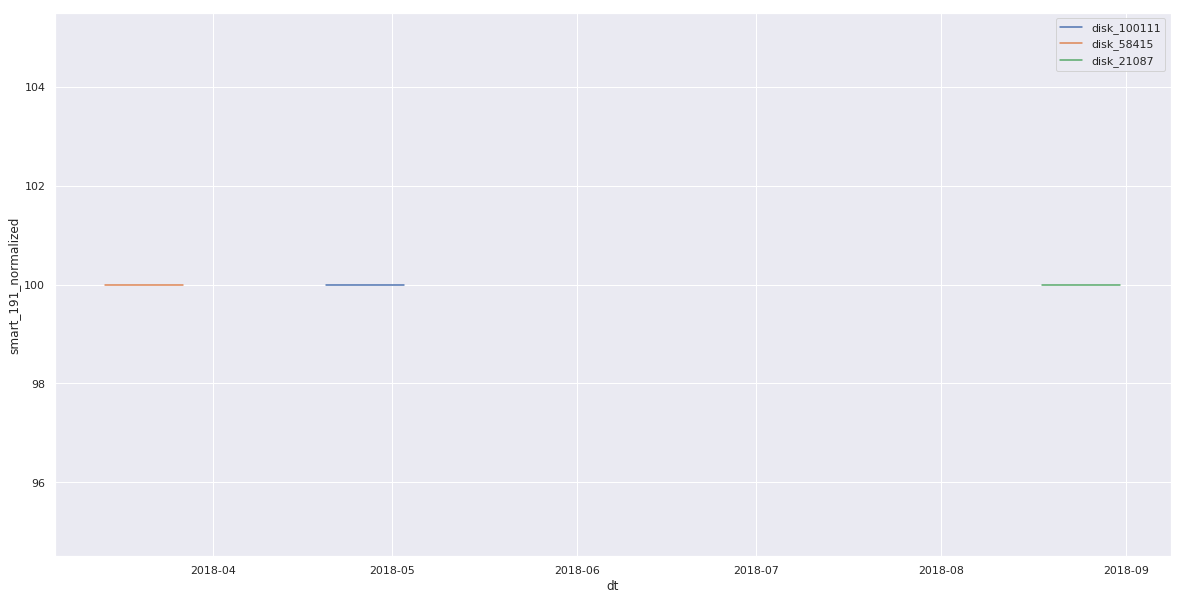

Text(0,0.5,'smart_191raw')

Text(0.5,0,'dt')

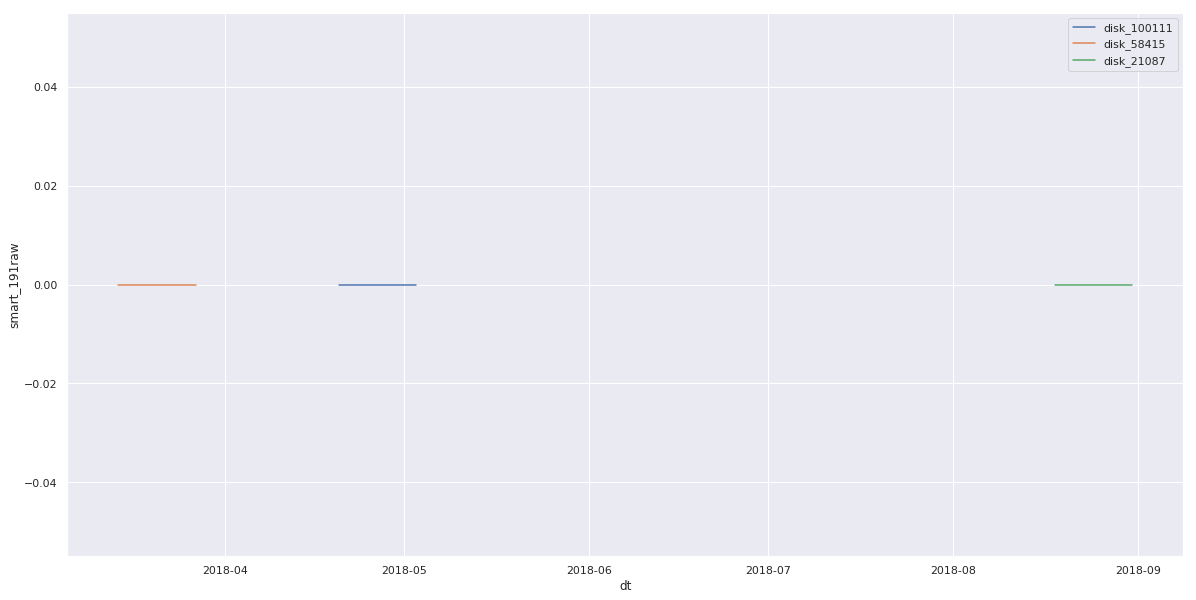

Text(0,0.5,'smart_192_normalized')

Text(0.5,0,'dt')

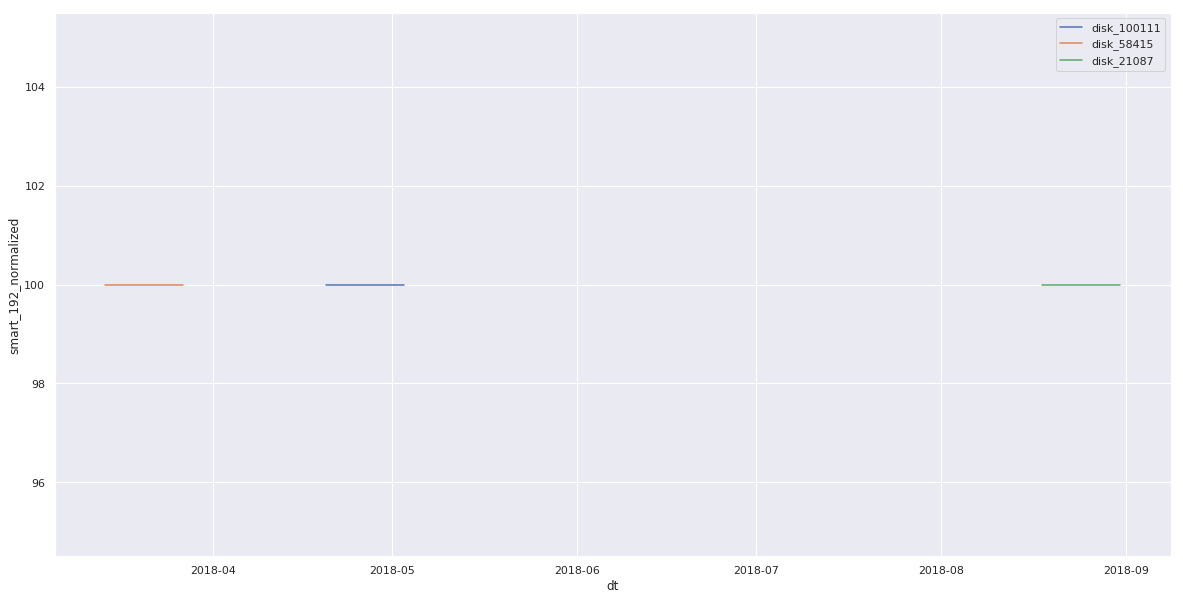

Text(0,0.5,'smart_192raw')

Text(0.5,0,'dt')

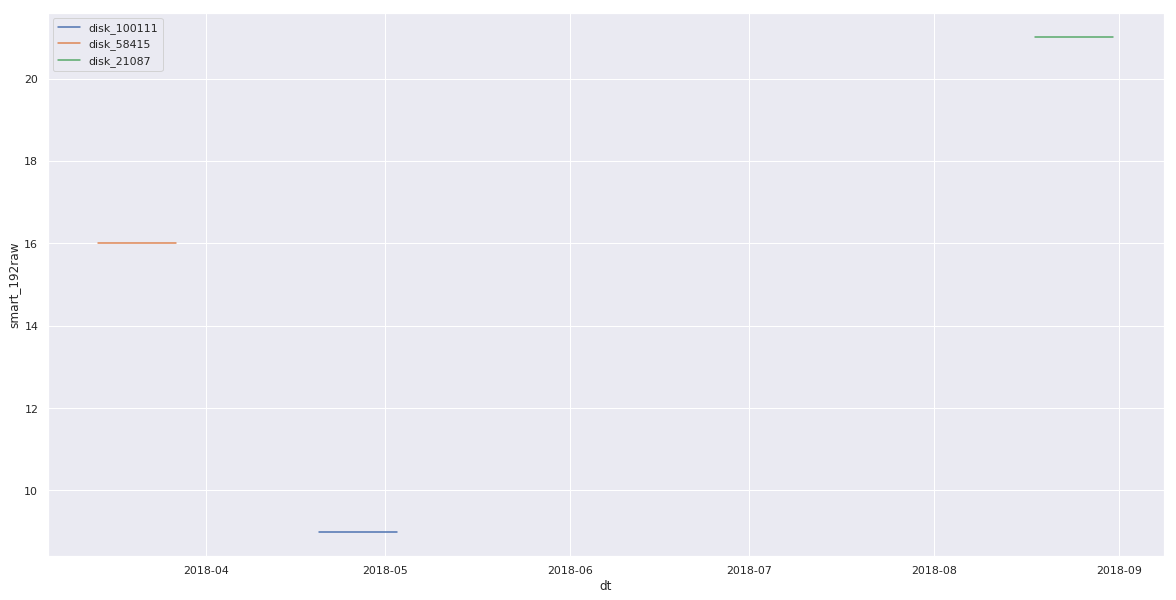

Text(0,0.5,'smart_193_normalized')

Text(0.5,0,'dt')

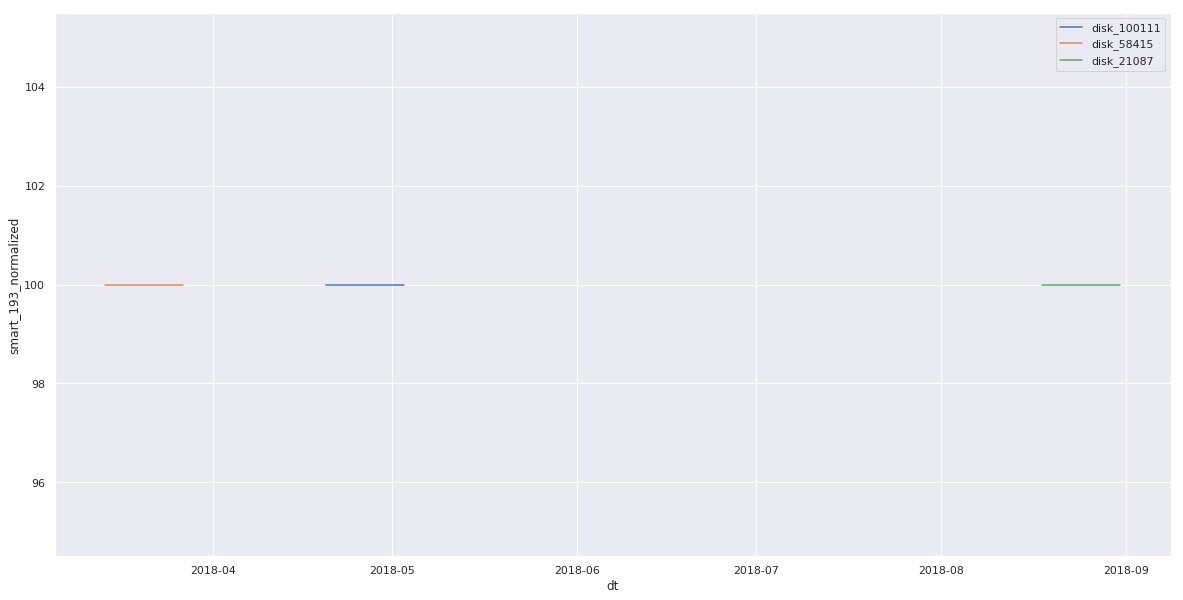

Text(0,0.5,'smart_193raw')

Text(0.5,0,'dt')

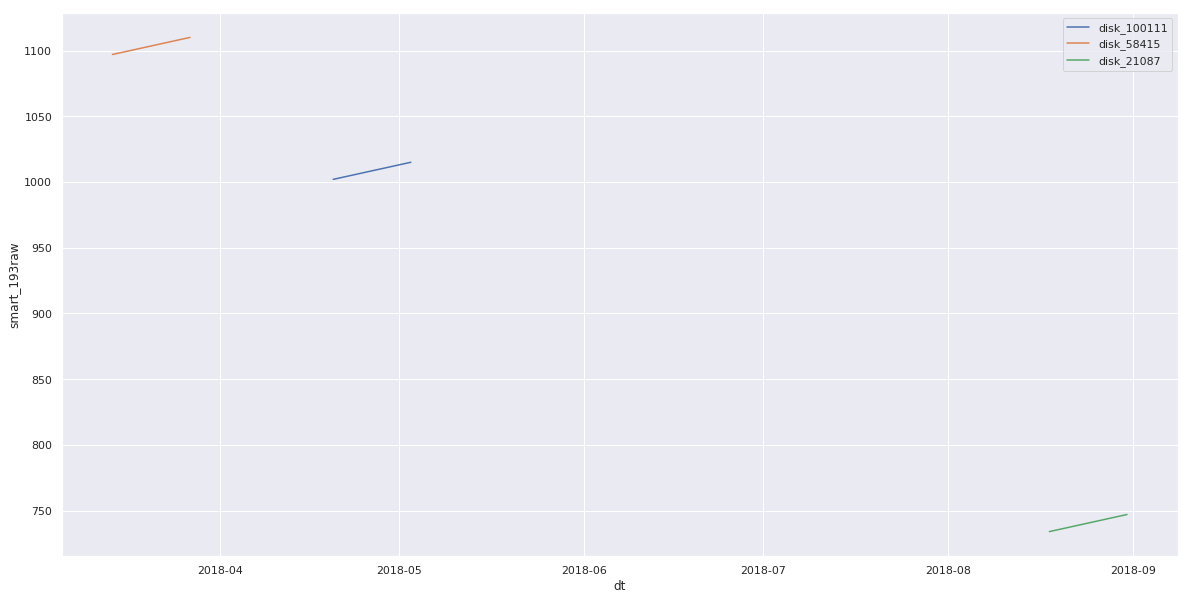

Text(0,0.5,'smart_194_normalized')

Text(0.5,0,'dt')

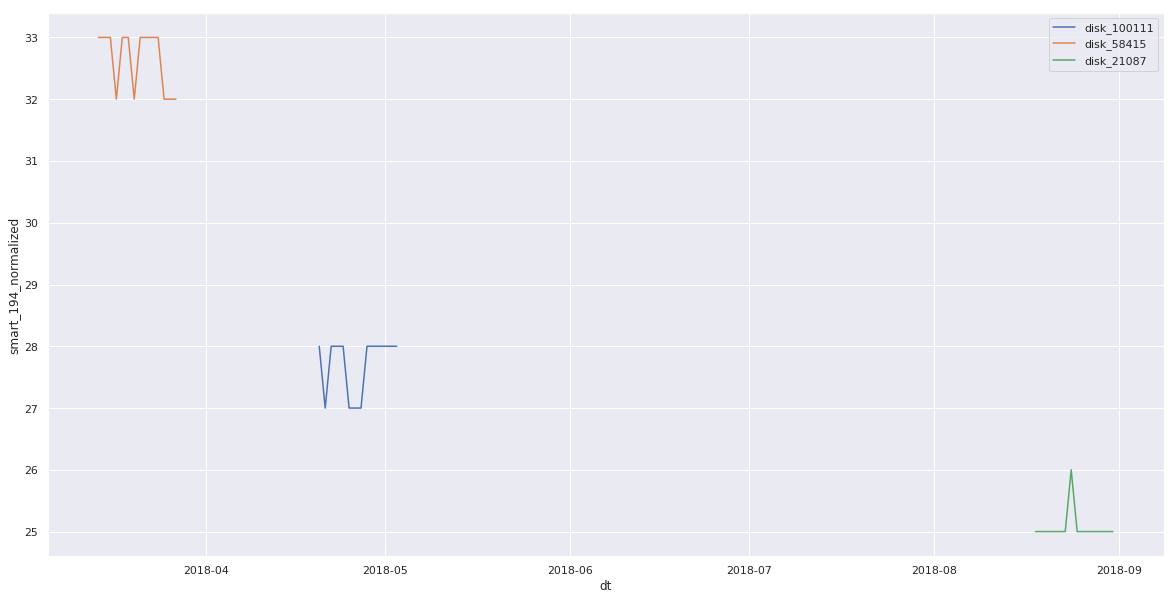

Text(0,0.5,'smart_194raw')

Text(0.5,0,'dt')

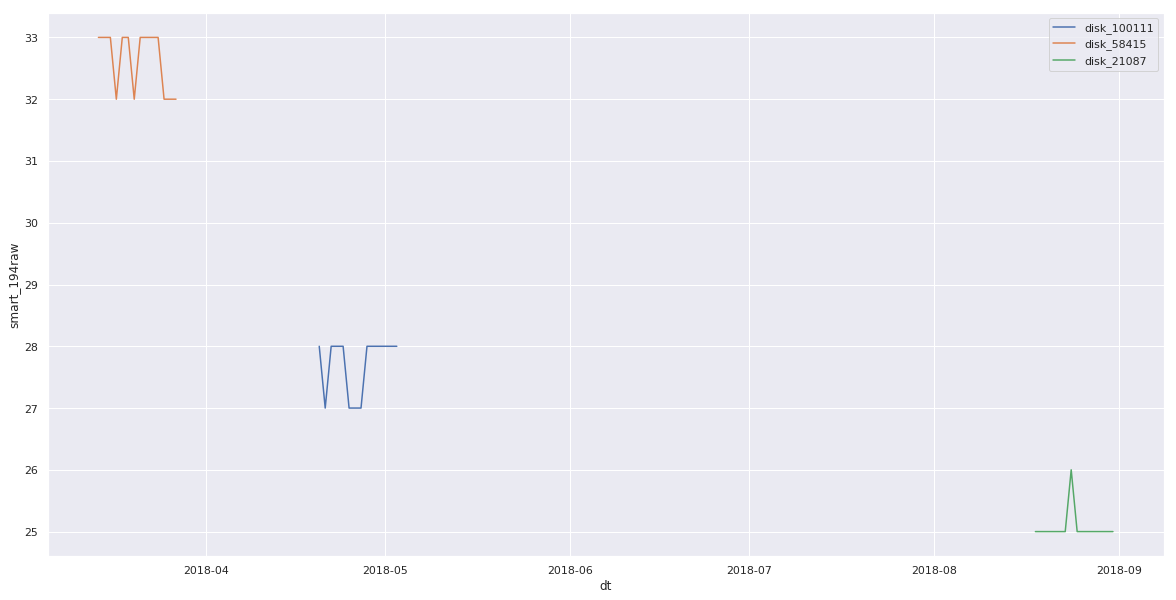

Text(0,0.5,'smart_195_normalized')

Text(0.5,0,'dt')

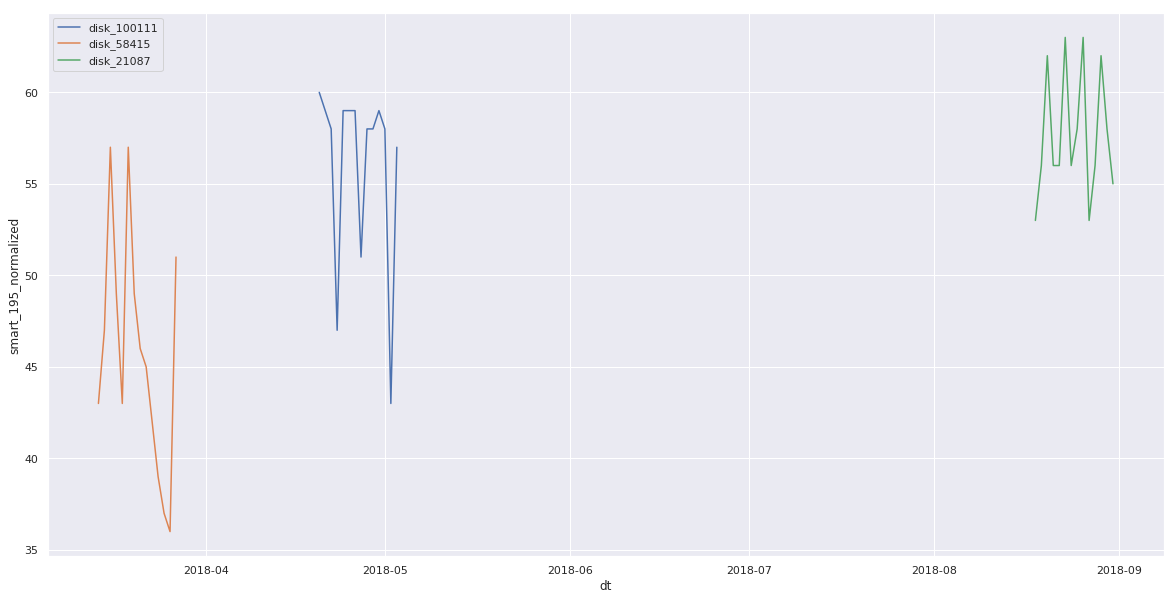

Text(0,0.5,'smart_195raw')

Text(0.5,0,'dt')

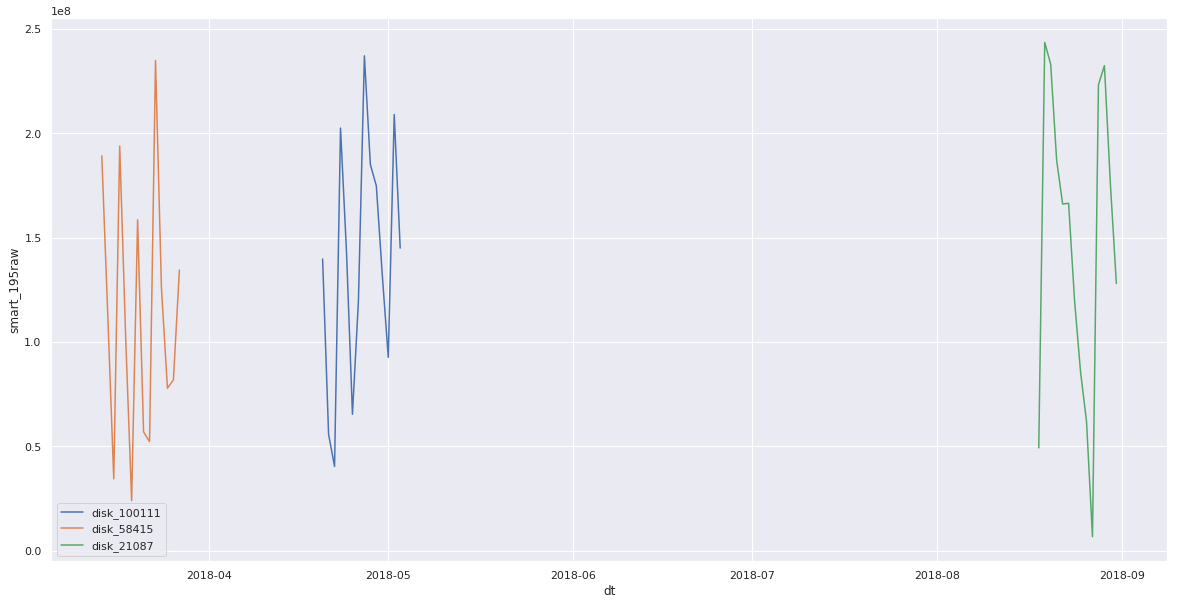

Text(0,0.5,'smart_197_normalized')

Text(0.5,0,'dt')

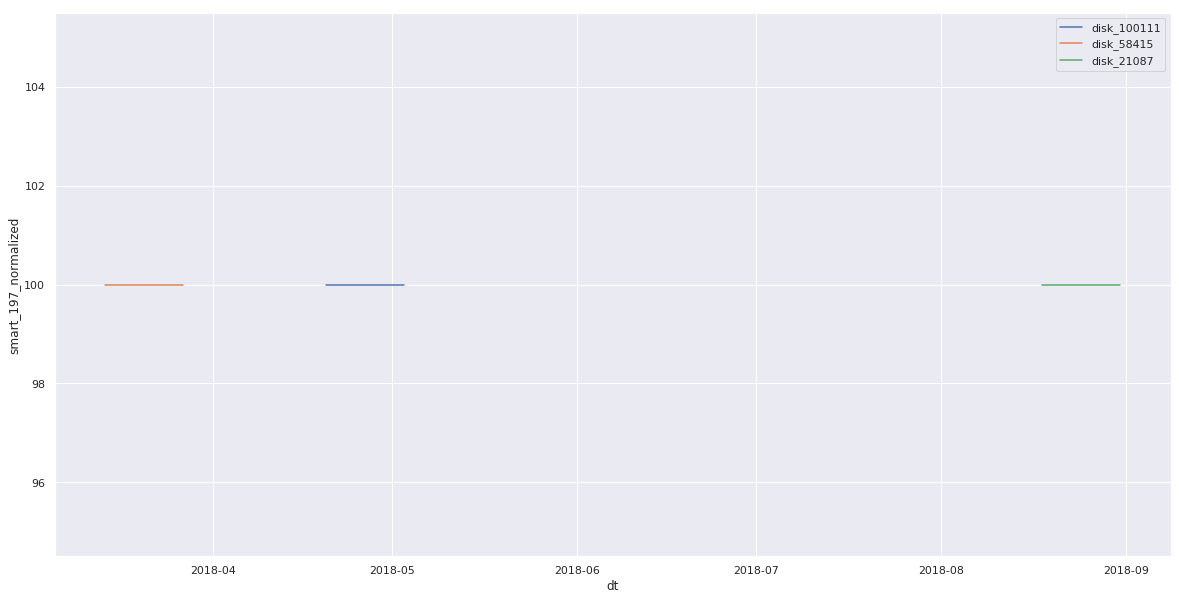

Text(0,0.5,'smart_197raw')

Text(0.5,0,'dt')

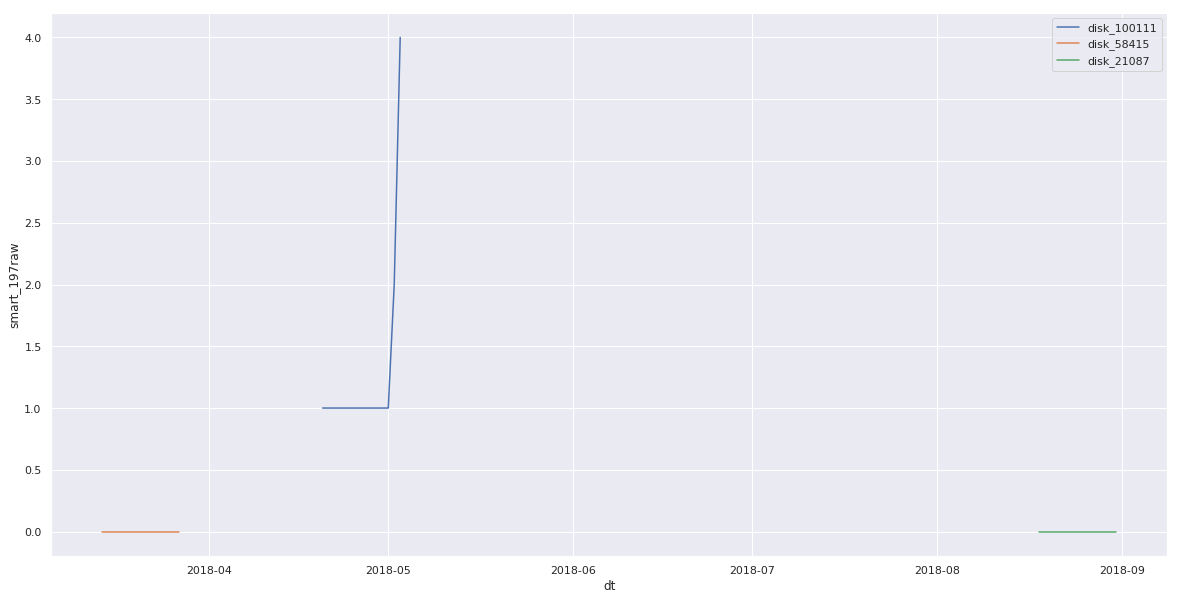

Text(0,0.5,'smart_198_normalized')

Text(0.5,0,'dt')

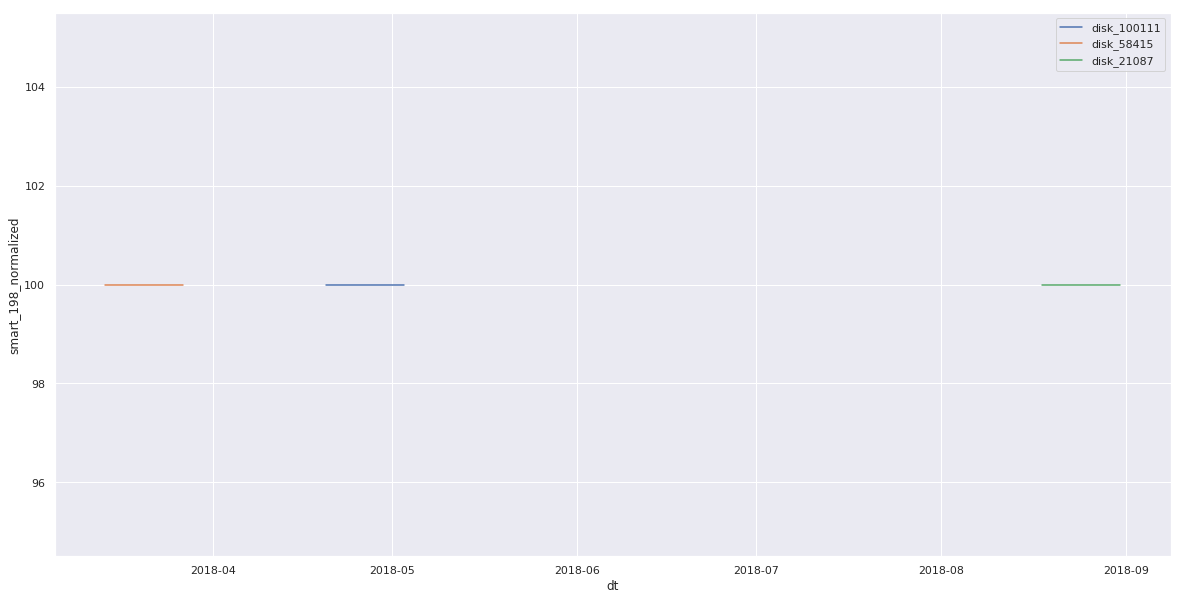

Text(0,0.5,'smart_198raw')

Text(0.5,0,'dt')

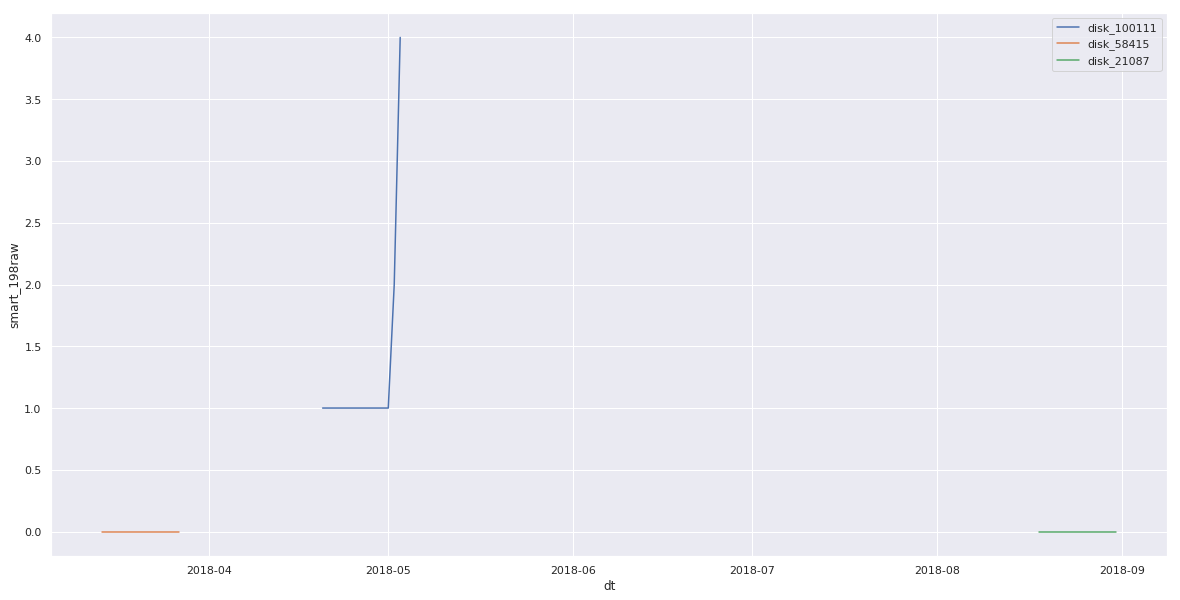

Text(0,0.5,'smart_199_normalized')

Text(0.5,0,'dt')

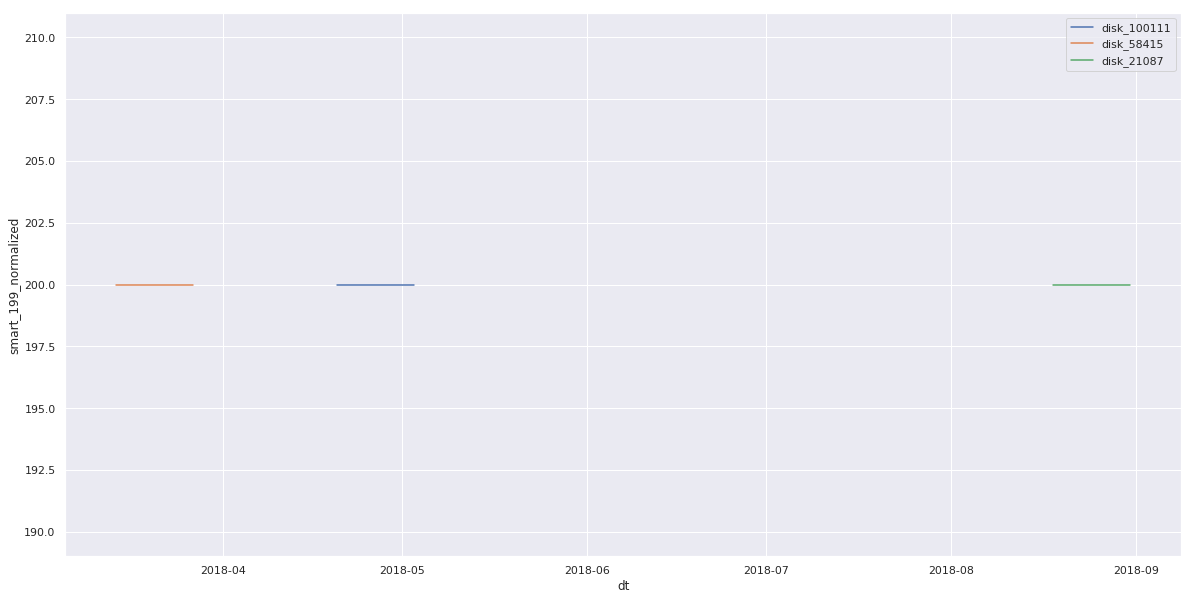

Text(0,0.5,'smart_199raw')

Text(0.5,0,'dt')

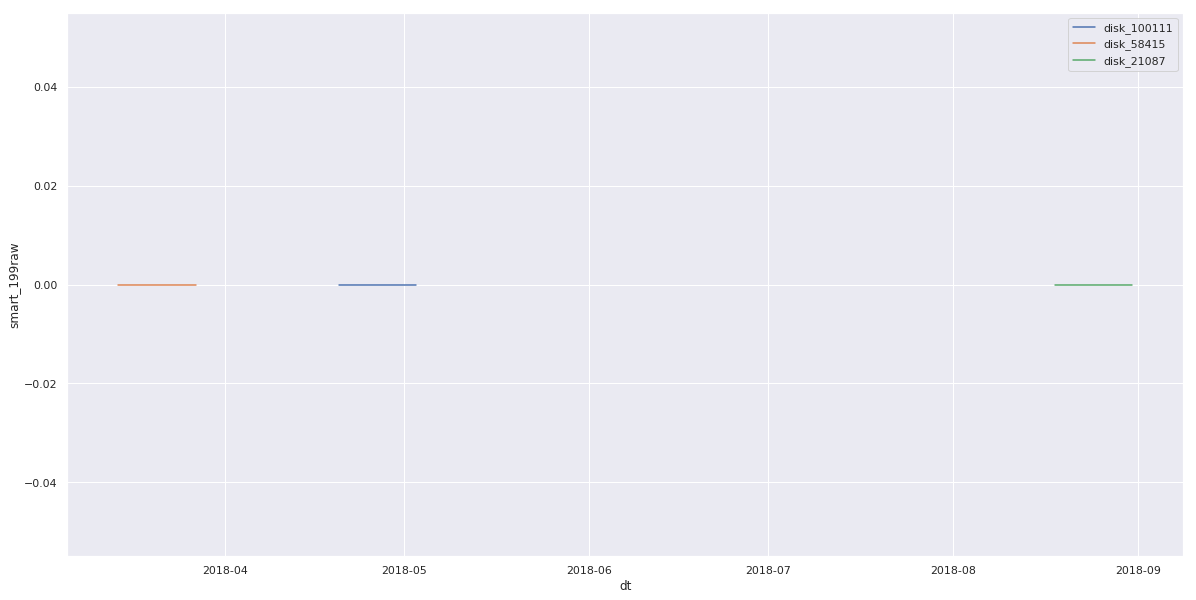

Text(0,0.5,'smart_240_normalized')

Text(0.5,0,'dt')

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x720 with 1 Axes>

Text(0,0.5,'smart_240raw')

Text(0.5,0,'dt')

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x720 with 1 Axes>

Text(0,0.5,'smart_241_normalized')

Text(0.5,0,'dt')

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x720 with 1 Axes>

Text(0,0.5,'smart_241raw')

Text(0.5,0,'dt')

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x720 with 1 Axes>

Text(0,0.5,'smart_242_normalized')

Text(0.5,0,'dt')

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x720 with 1 Axes>

Text(0,0.5,'smart_242raw')

Text(0.5,0,'dt')

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x720 with 1 Axes>

In [24]:
for cont_col in cont_cols: 
#     train_fault_sub_dfs[(1, 'disk_100111')][[cont_col,'dt']].set_index('dt').plot()
#     train_fault_sub_dfs[(1, 'disk_58415')][[cont_col,'dt']].set_index('dt').plot()
#     tmp_df = pd.DataFrame()
#     tmp_df.loc[:,'dt'] = train_fault_sub_dfs[(1, 'disk_100111')]['dt']
#     tmp_df.loc[:,cont_col] = train_fault_sub_dfs[(1, 'disk_100111')][cont_col]
#     tmp_df.dropna(inplace=True)
#     ax1 = plt.plot(tmp_df['dt'], tmp_df[cont_col])
    ax1 = plt.plot(train_fault_sub_dfs[(1, 'disk_100111')]['dt'].iloc[-14:], 
                   train_fault_sub_dfs[(1, 'disk_100111')][cont_col].iloc[-14:],
                   label='disk_100111')
    ax2 = plt.plot(train_fault_sub_dfs[(1, 'disk_58415')]['dt'].iloc[-14:],
                   train_fault_sub_dfs[(1, 'disk_58415')][cont_col].iloc[-14:],
                   label='disk_58415')
    ax3 = plt.plot(train_normal_sub_dfs[(1, 'disk_21087')]['dt'].iloc[-14:],
                   train_normal_sub_dfs[(1, 'disk_21087')][cont_col].iloc[-14:],
                   label='disk_21087')
    plt.legend()
    plt.ylabel(cont_col)
    plt.xlabel('dt')
    plt.show()

### <a id='3'> 3. show feature distribution between normal and fault disks</a>

In [23]:
train_fe_df.head()

,serial_number,manufacturer,model,dt,smart_1_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_9_normalized,smart_10_normalized,smart_12_normalized,smart_184_normalized,smart_187_normalized,smart_188_normalized,smart_189_normalized,smart_190_normalized,smart_191_normalized,smart_192_normalized,smart_193_normalized,smart_194_normalized,smart_195_normalized,smart_197_normalized,smart_198_normalized,smart_199_normalized,tag,flag,30_day,smart_1raw,smart_3raw,smart_4raw,smart_5raw,smart_7raw,smart_9raw,smart_10raw,smart_12raw,smart_184raw,smart_187raw,smart_188raw,smart_189raw,smart_190raw,smart_191raw,smart_192raw,smart_193raw,smart_194raw,smart_195raw,smart_197raw,smart_198raw,smart_199raw
0,disk_21087,A,1,2018-01-01,80.0,96.0,100.0,100.0,84.0,89.0,100.0,100.0,100.0,100.0,100.0,100.0,75.0,100.0,100.0,100.0,25.0,63.0,100.0,100.0,200.0,0,0,0,104629728.0,0.0,23.0,0.0,3.062229e+08,10483.0,0.0,23.0,0.0,0.0,0.0,0.0,25.0,0.0,21.0,505.0,25.0,104629728.0,0.0,0.0,0.0
1,disk_69256,A,2,2018-01-01,84.0,86.0,100.0,100.0,93.0,97.0,100.0,100.0,100.0,100.0,100.0,100.0,64.0,99.0,100.0,100.0,36.0,15.0,100.0,100.0,200.0,0,0,0,232161968.0,0.0,104.0,0.0,1.817807e+09,3433.0,0.0,104.0,0.0,0.0,0.0,0.0,36.0,2114.0,8.0,438.0,36.0,232161968.0,0.0,0.0,0.0
2,disk_41304,A,1,2018-01-01,81.0,96.0,100.0,100.0,93.0,67.0,100.0,100.0,100.0,100.0,100.0,100.0,65.0,100.0,100.0,100.0,35.0,24.0,100.0,100.0,200.0,0,0,0,150906496.0,0.0,9.0,0.0,2.096764e+09,29782.0,0.0,9.0,0.0,0.0,0.0,0.0,35.0,0.0,8.0,1249.0,35.0,150906496.0,0.0,0.0,0.0
3,disk_73081,A,2,2018-01-01,83.0,88.0,100.0,100.0,71.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,66.0,100.0,100.0,100.0,34.0,12.0,100.0,100.0,200.0,0,0,0,189932672.0,0.0,12.0,0.0,1.232626e+07,234.0,0.0,12.0,0.0,0.0,0.0,0.0,34.0,116.0,7.0,41.0,34.0,189932672.0,0.0,0.0,0.0
4,disk_9590,A,1,2018-01-01,68.0,97.0,100.0,100.0,60.0,83.0,100.0,100.0,100.0,100.0,100.0,100.0,73.0,100.0,100.0,100.0,27.0,12.0,100.0,100.0,200.0,0,0,0,6786815.0,0.0,6.0,0.0,1.259635e+06,15019.0,0.0,6.0,0.0,0.0,0.0,0.0,27.0,0.0,5.0,708.0,27.0,6786815.0,0.0,0.0,0.0


<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_1_normalized distirbution against flag')

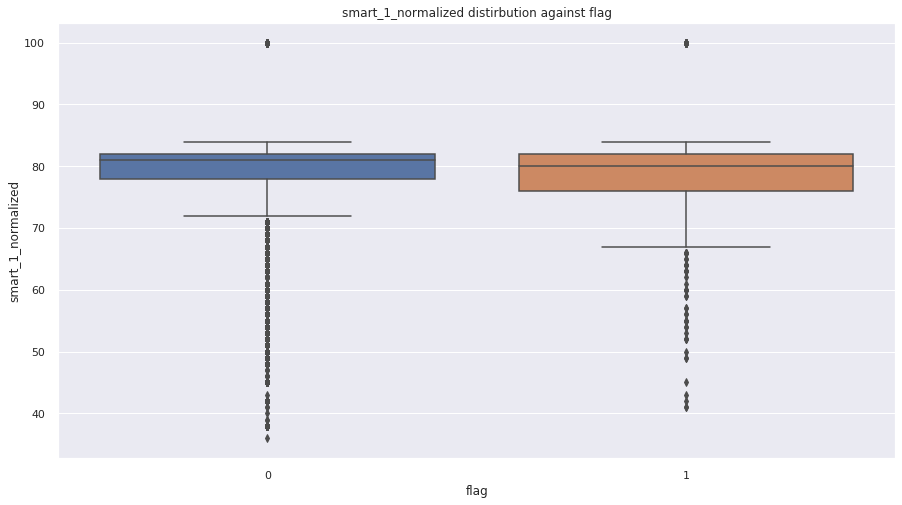

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_3_normalized distirbution against flag')

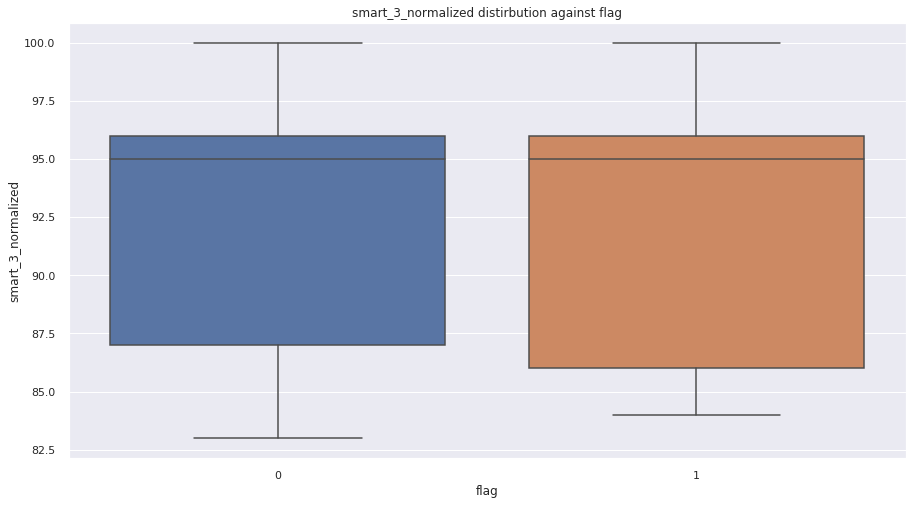

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_4_normalized distirbution against flag')

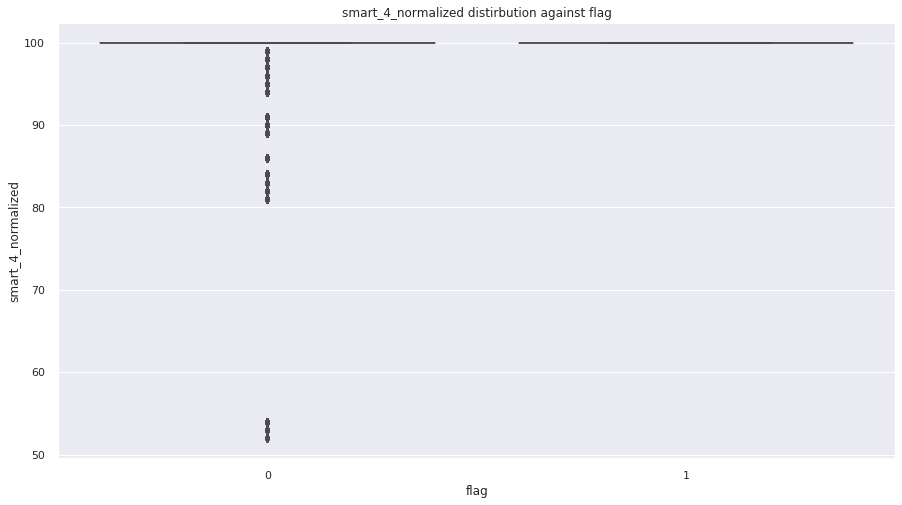

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_5_normalized distirbution against flag')

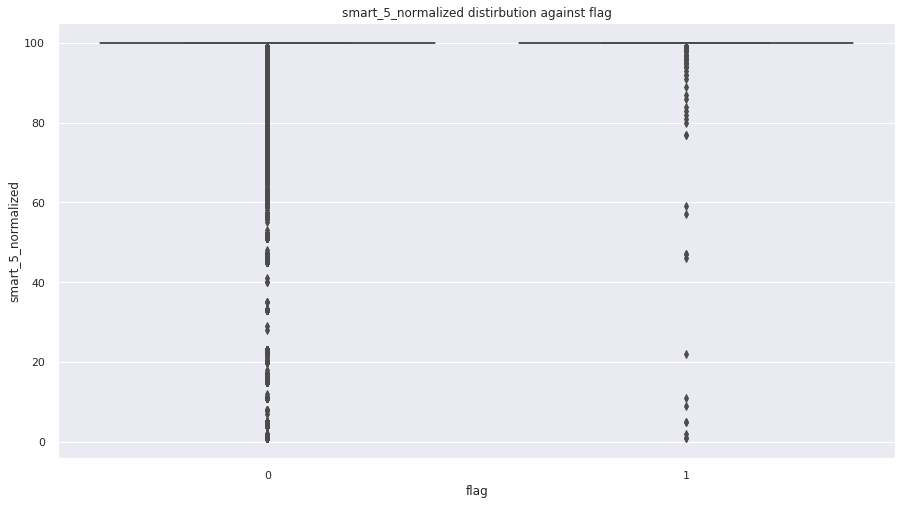

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_7_normalized distirbution against flag')

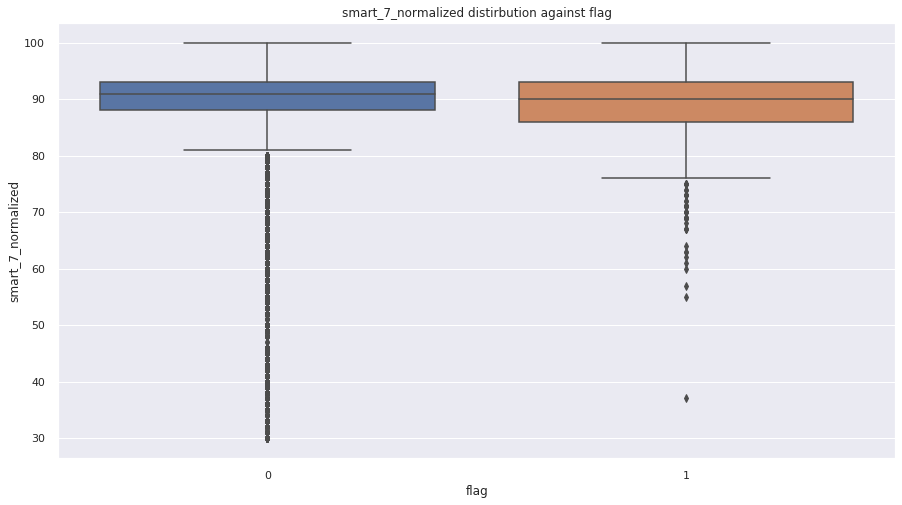

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_9_normalized distirbution against flag')

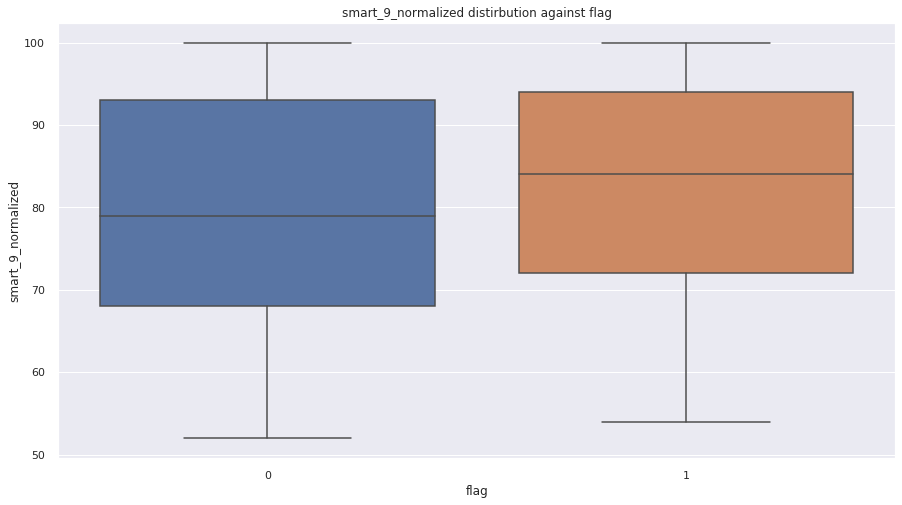

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_10_normalized distirbution against flag')

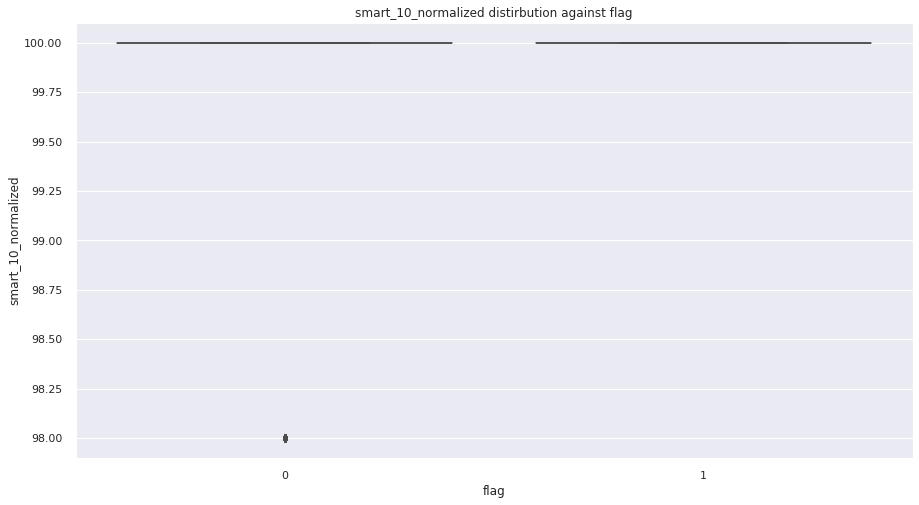

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_12_normalized distirbution against flag')

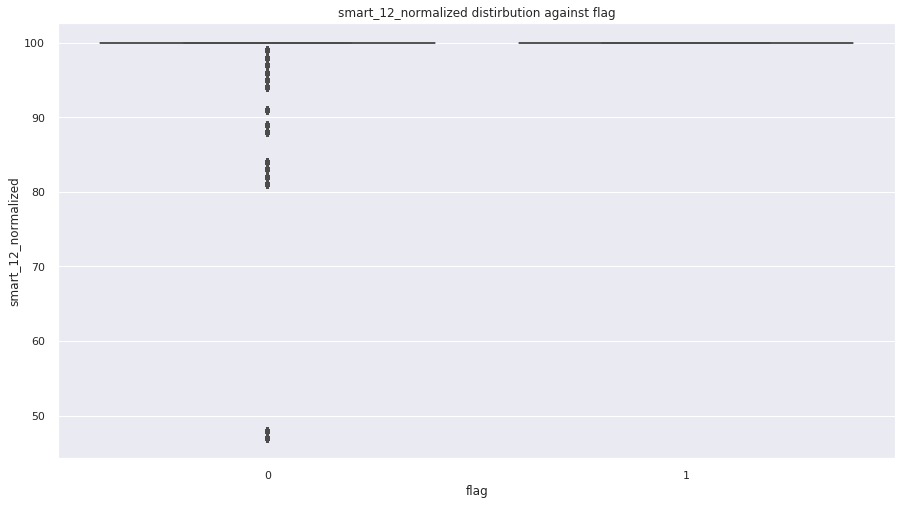

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_184_normalized distirbution against flag')

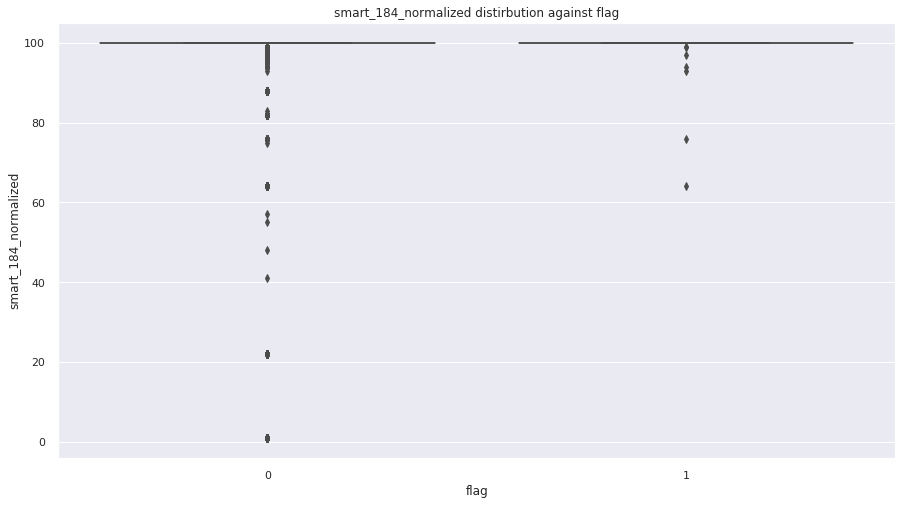

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_187_normalized distirbution against flag')

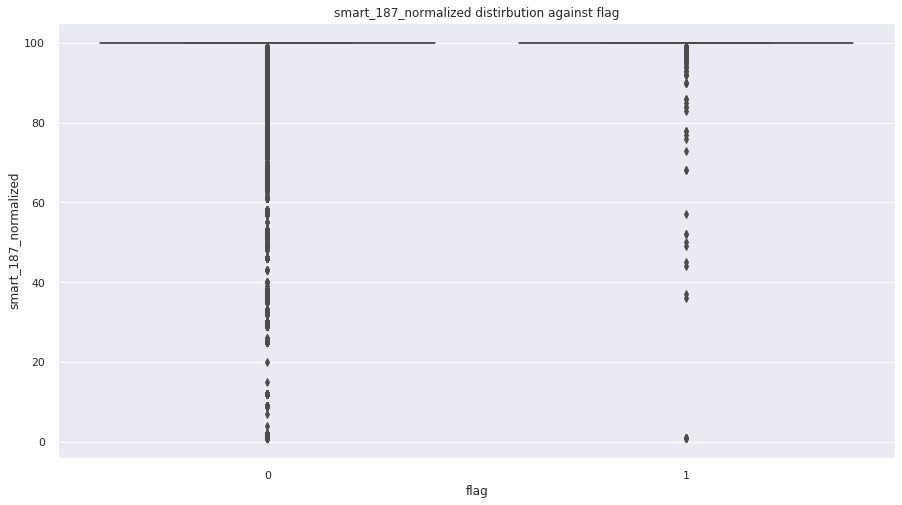

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_188_normalized distirbution against flag')

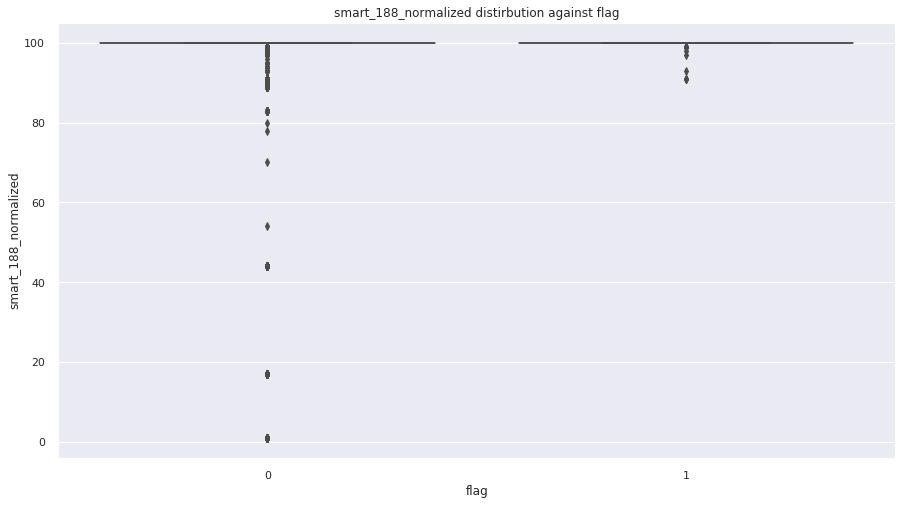

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_189_normalized distirbution against flag')

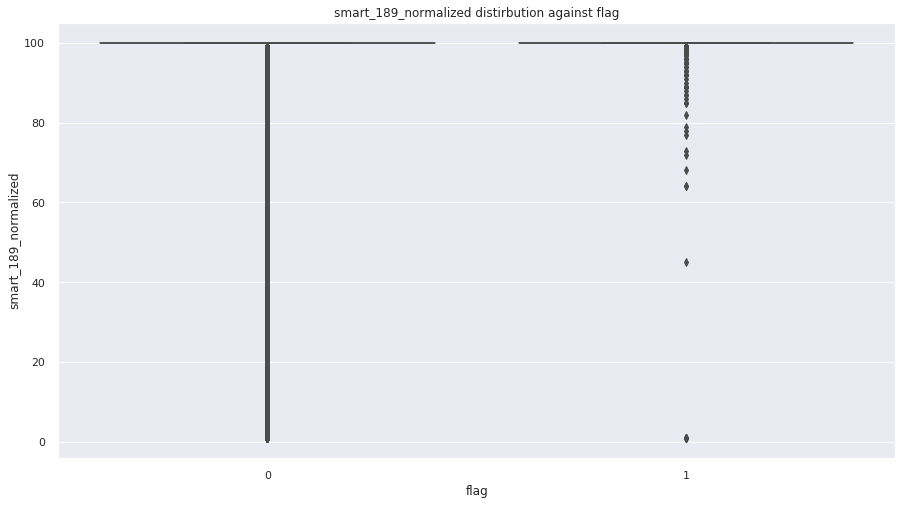

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_190_normalized distirbution against flag')

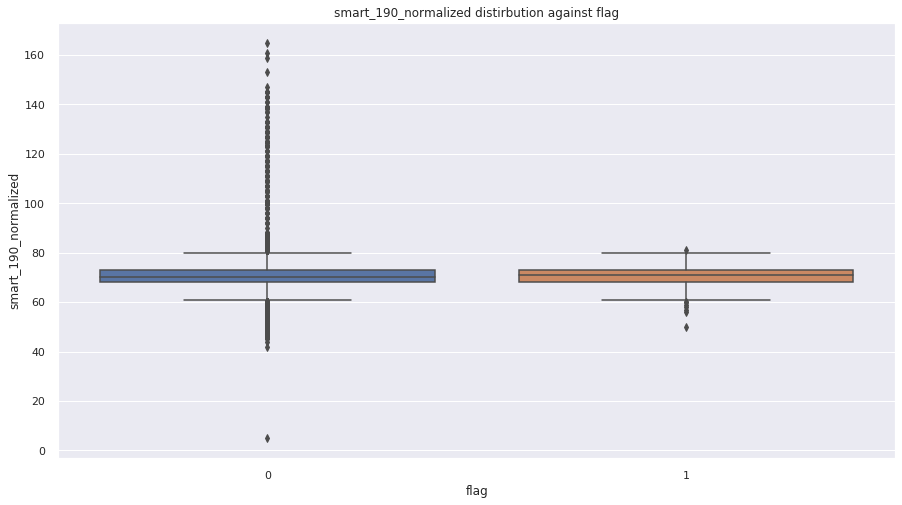

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_191_normalized distirbution against flag')

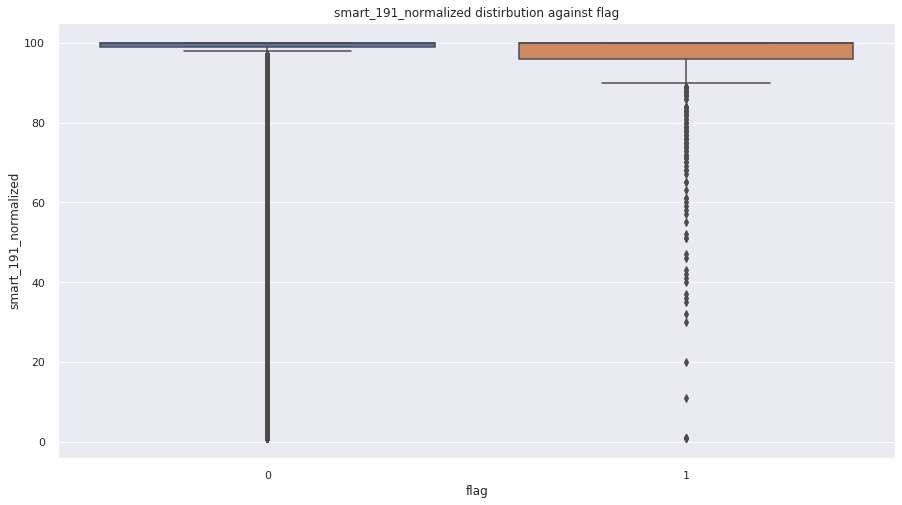

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_192_normalized distirbution against flag')

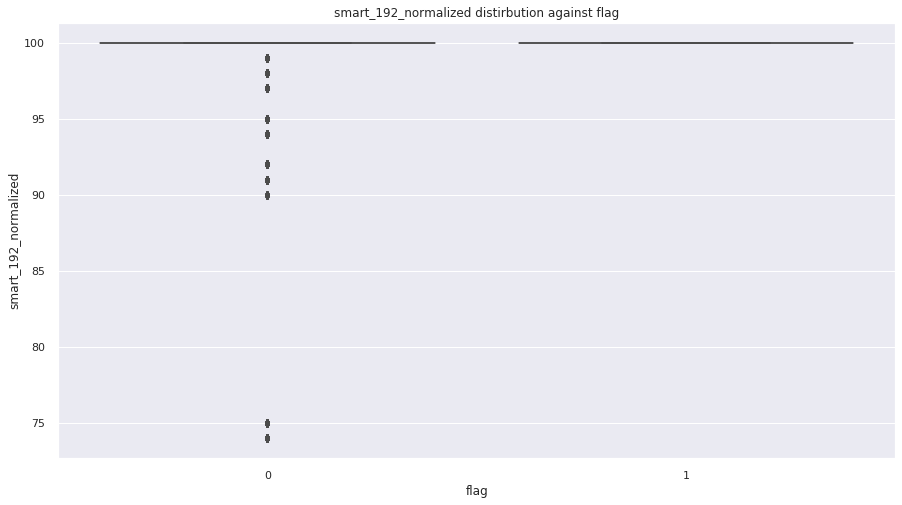

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_193_normalized distirbution against flag')

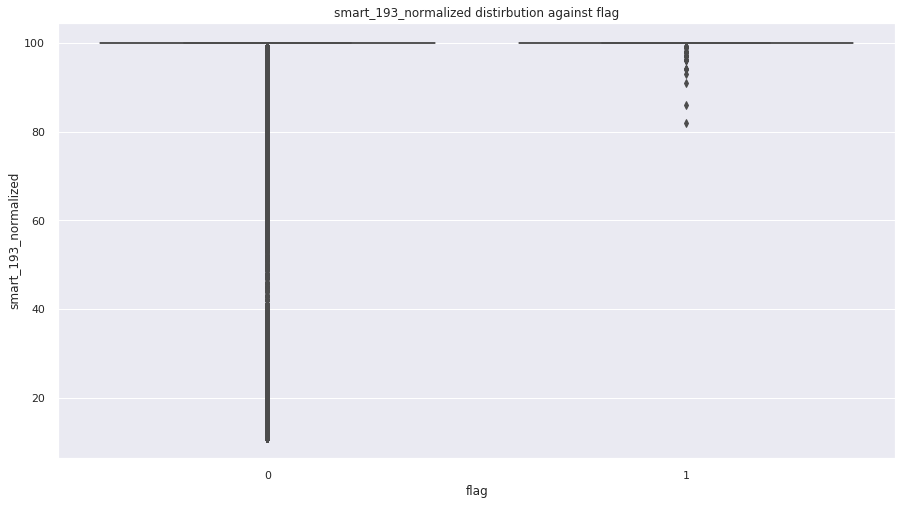

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_194_normalized distirbution against flag')

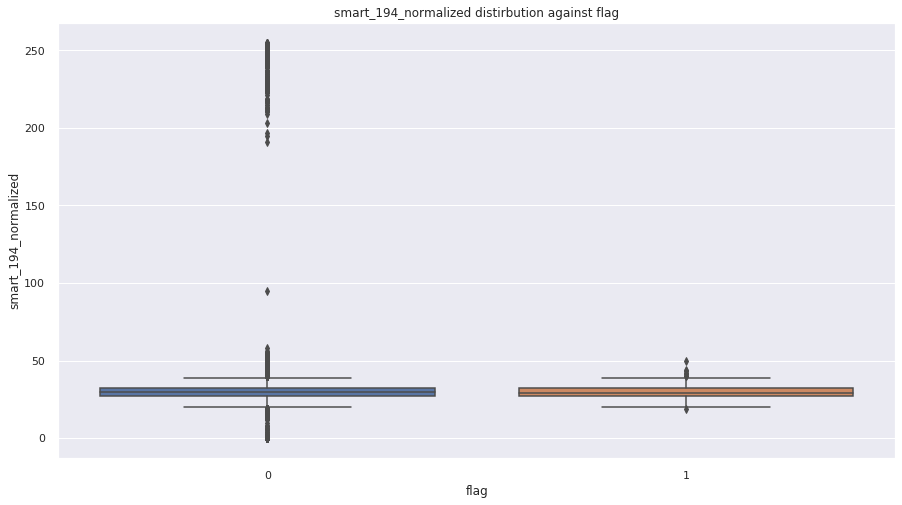

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_195_normalized distirbution against flag')

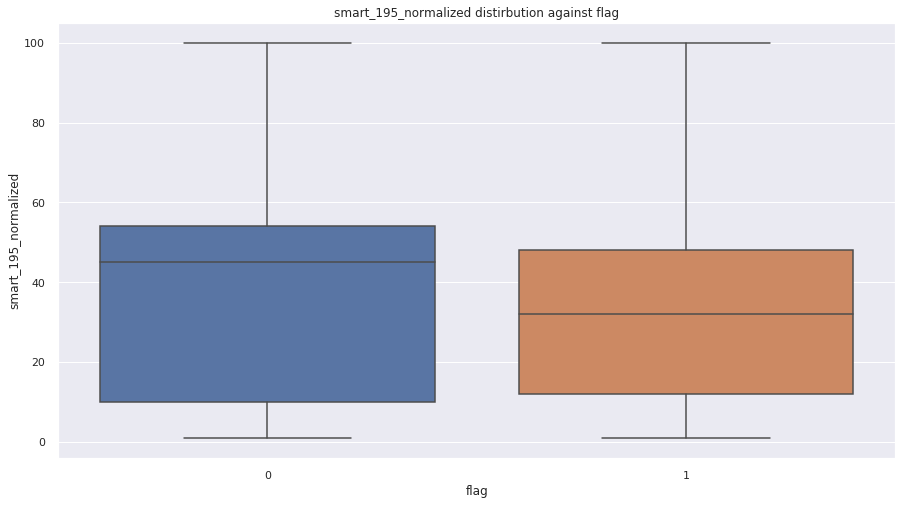

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_197_normalized distirbution against flag')

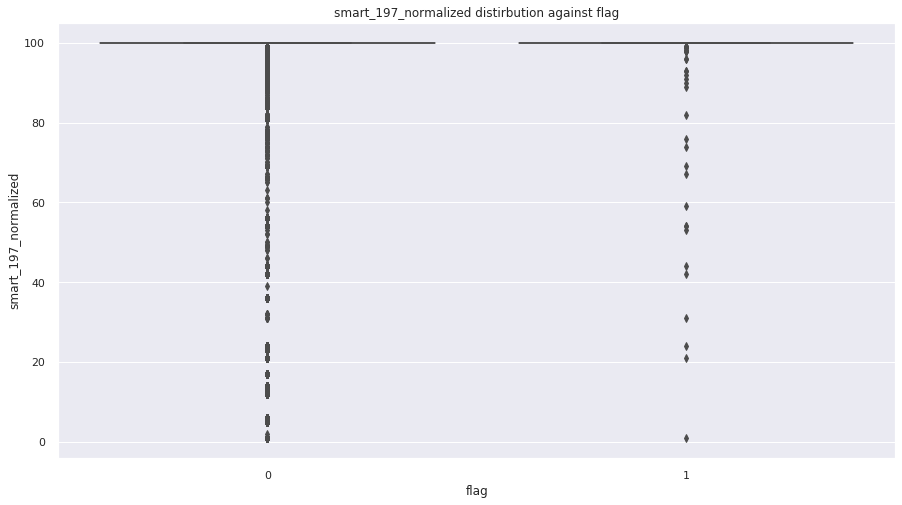

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_198_normalized distirbution against flag')

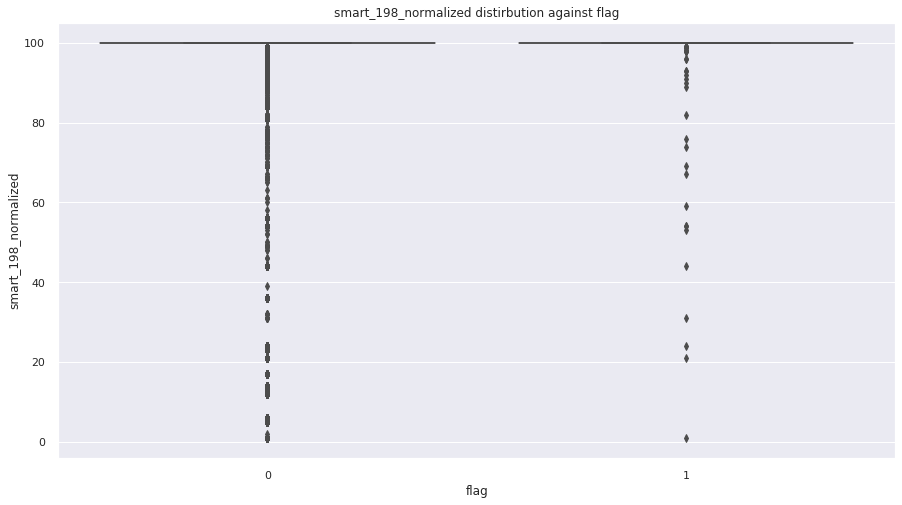

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_199_normalized distirbution against flag')

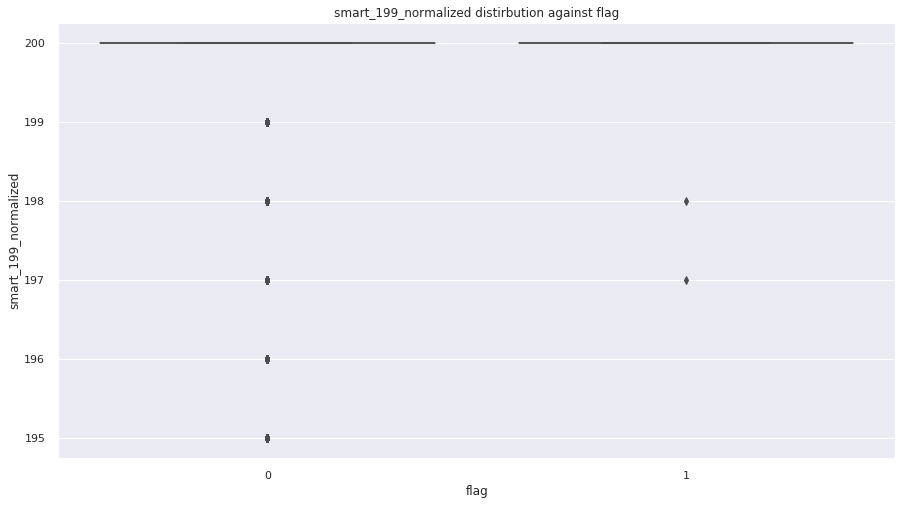

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_1raw distirbution against flag')

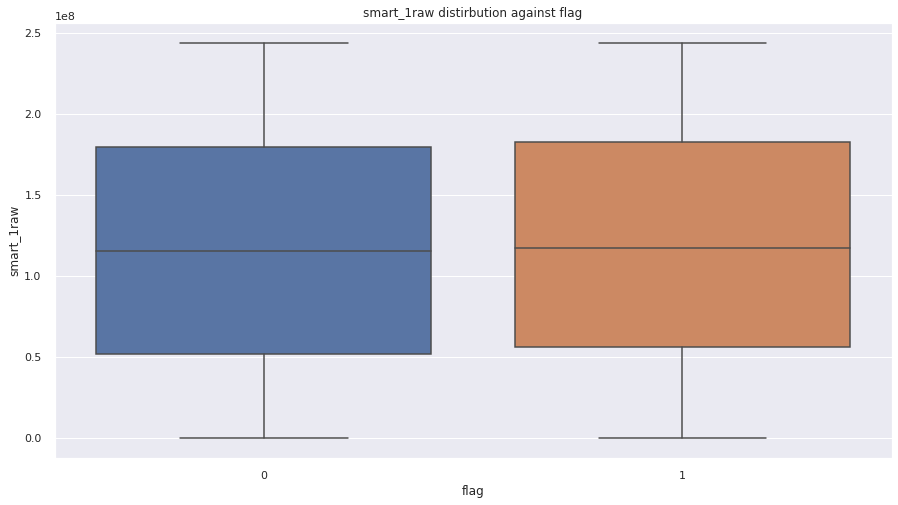

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_3raw distirbution against flag')

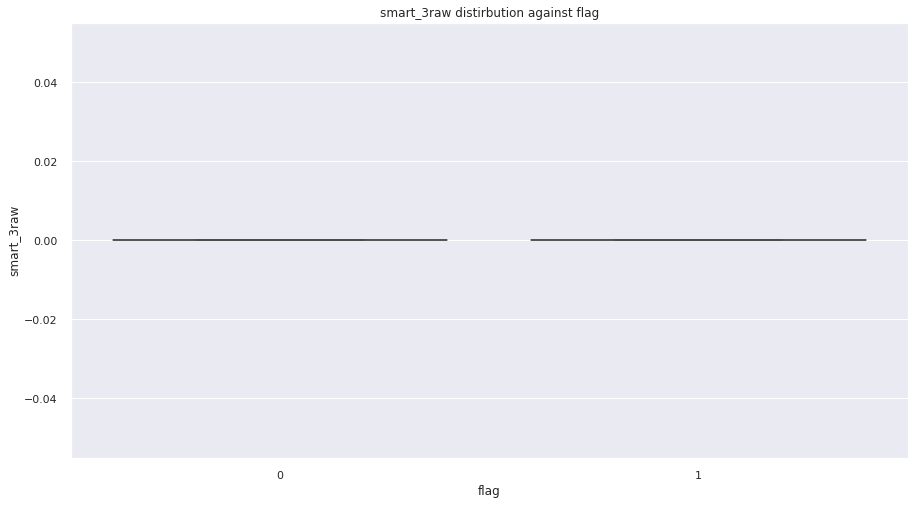

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_4raw distirbution against flag')

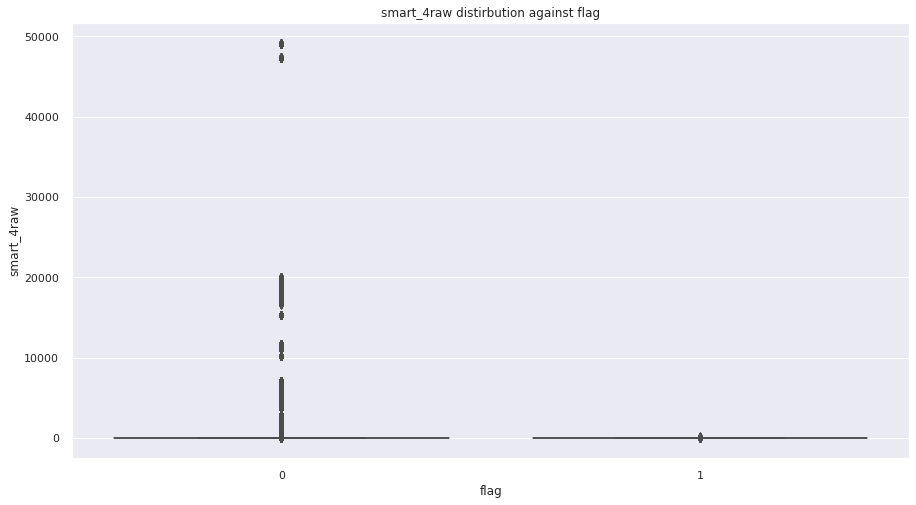

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_5raw distirbution against flag')

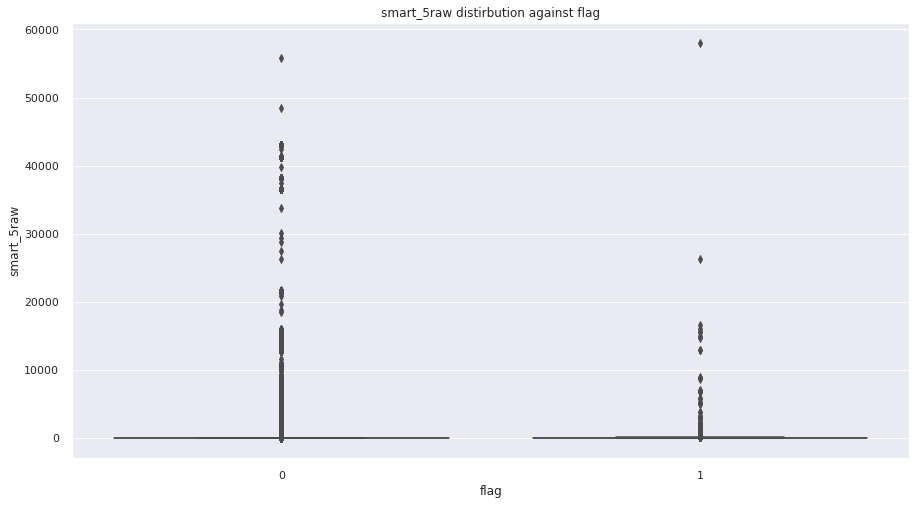

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_7raw distirbution against flag')

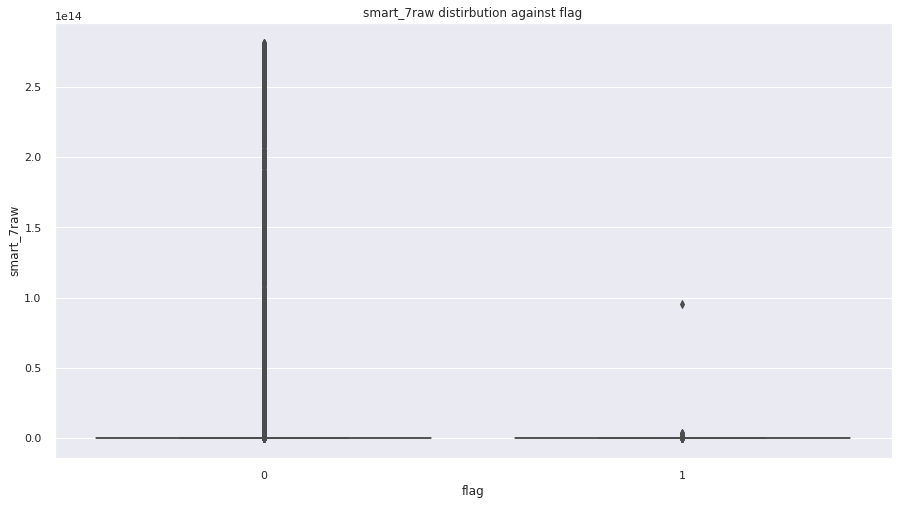

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_9raw distirbution against flag')

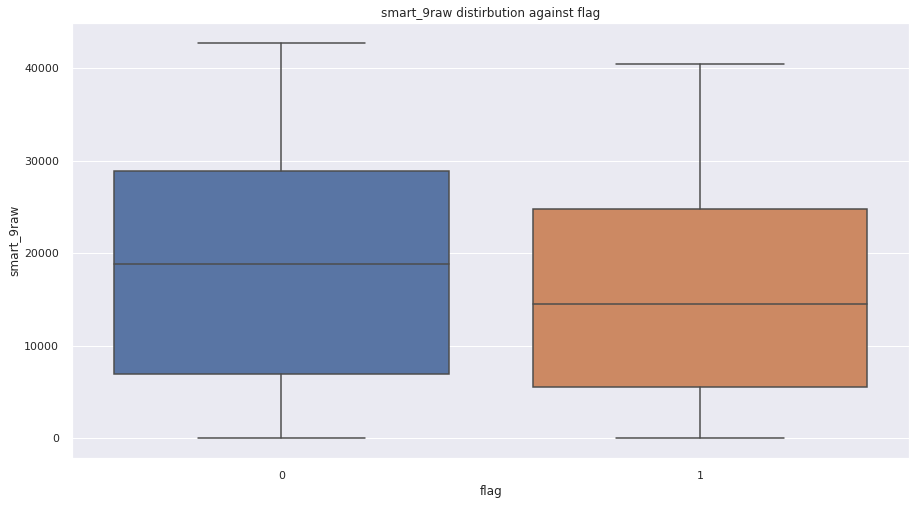

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_10raw distirbution against flag')

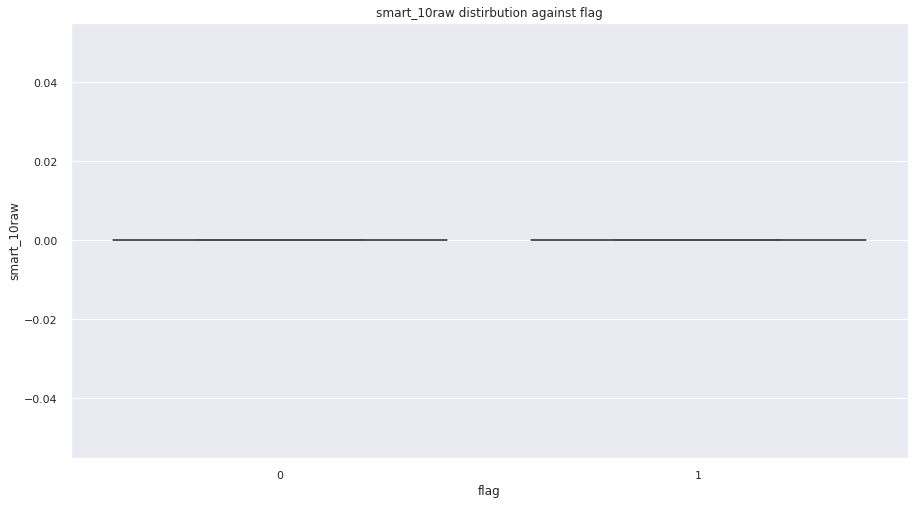

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_12raw distirbution against flag')

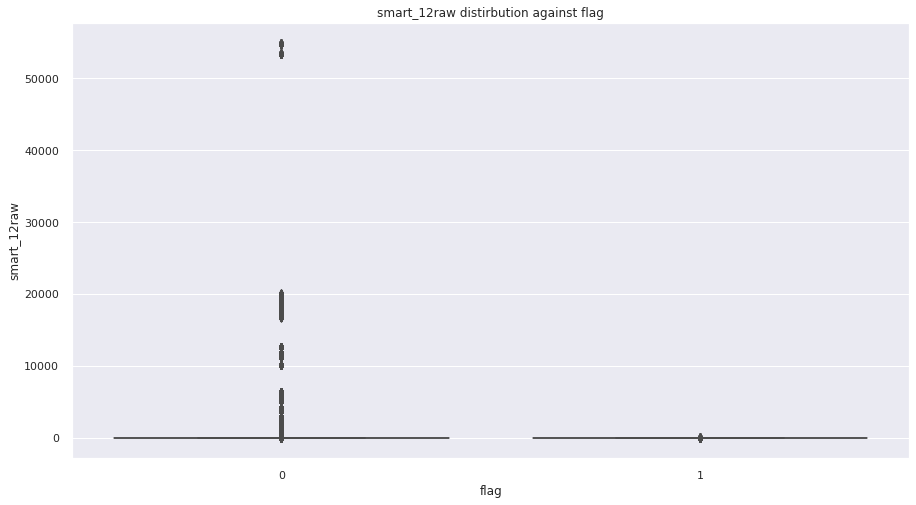

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_184raw distirbution against flag')

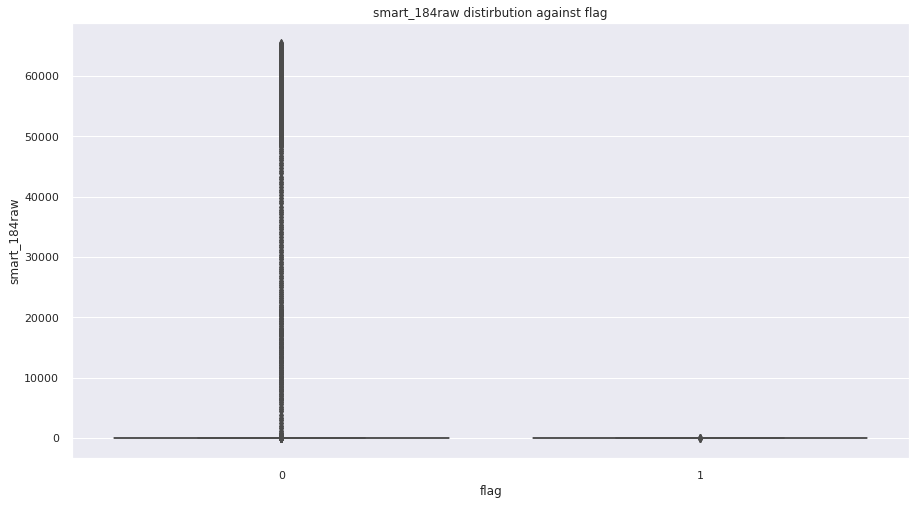

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_187raw distirbution against flag')

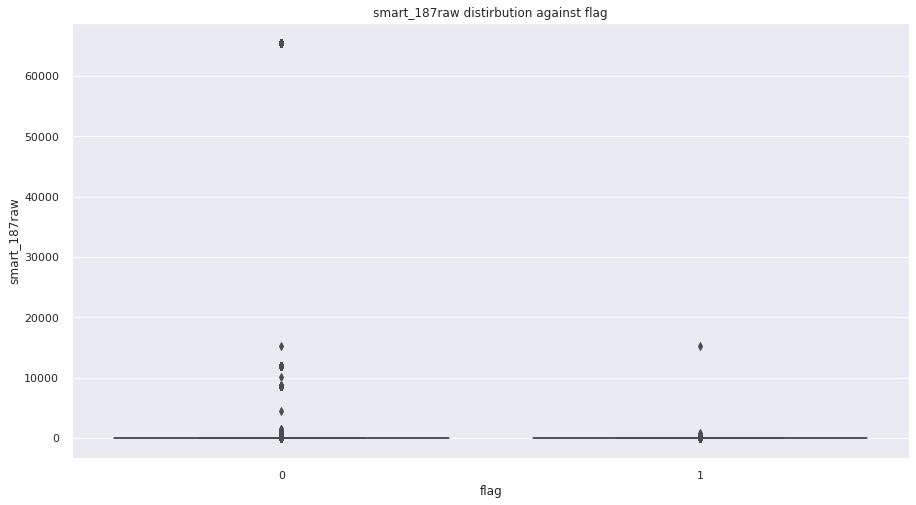

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_188raw distirbution against flag')

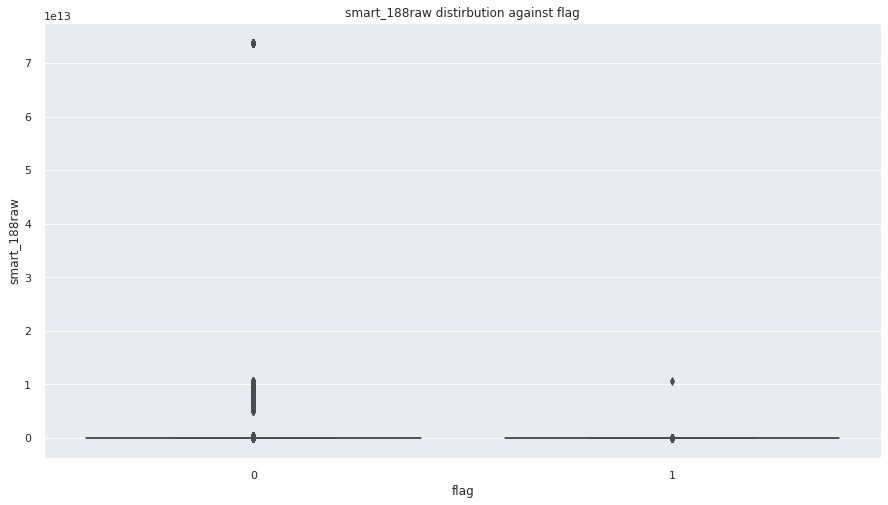

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_189raw distirbution against flag')

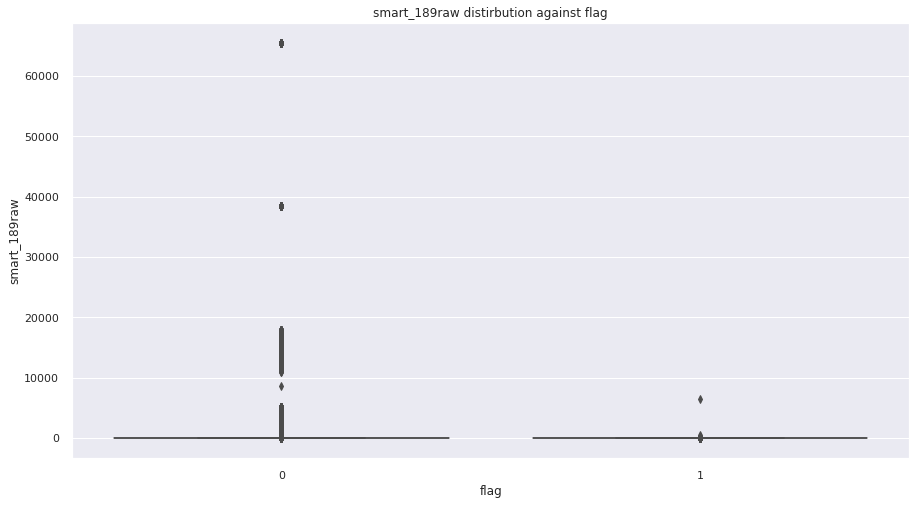

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_190raw distirbution against flag')

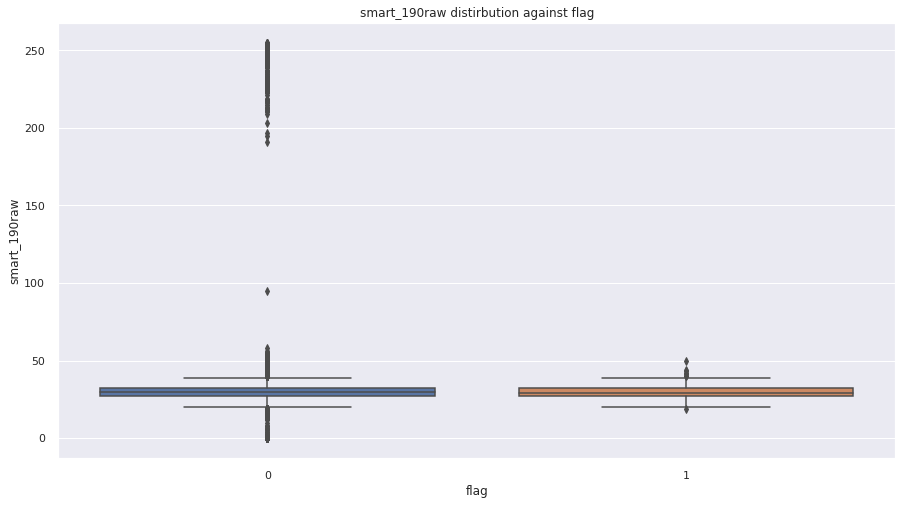

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_191raw distirbution against flag')

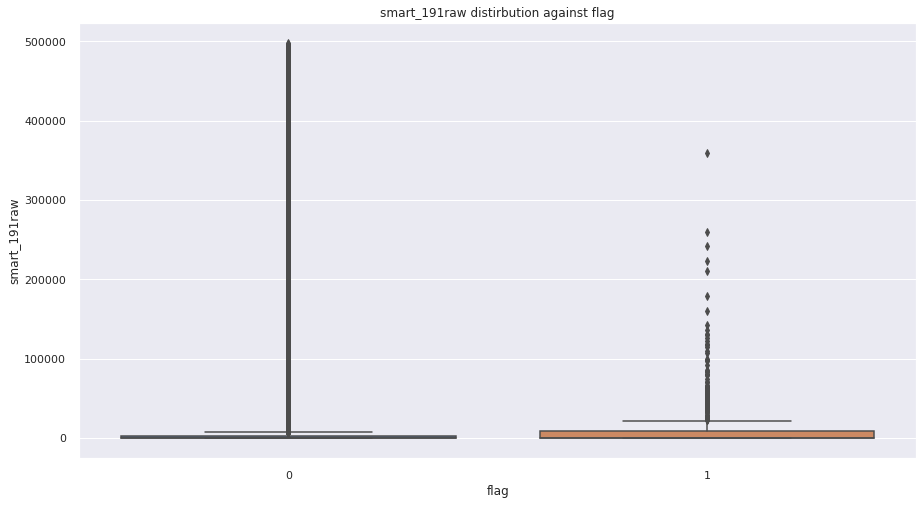

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_192raw distirbution against flag')

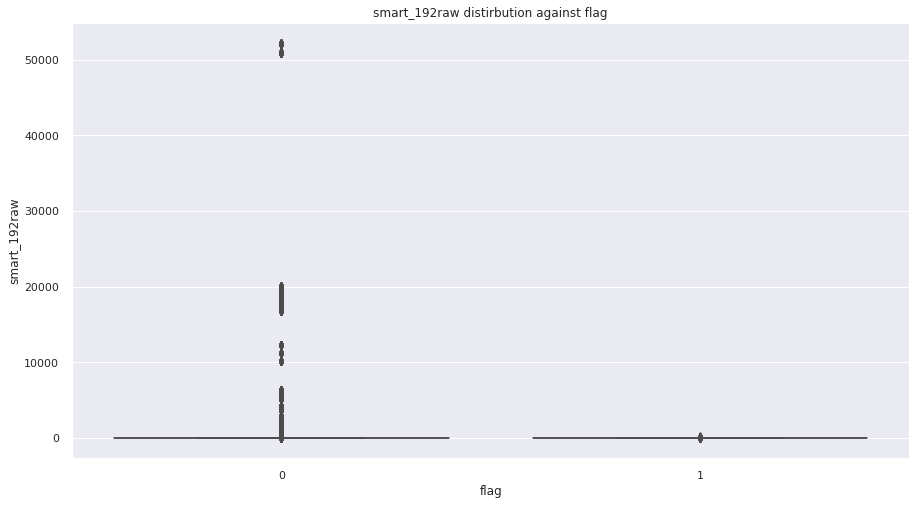

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_193raw distirbution against flag')

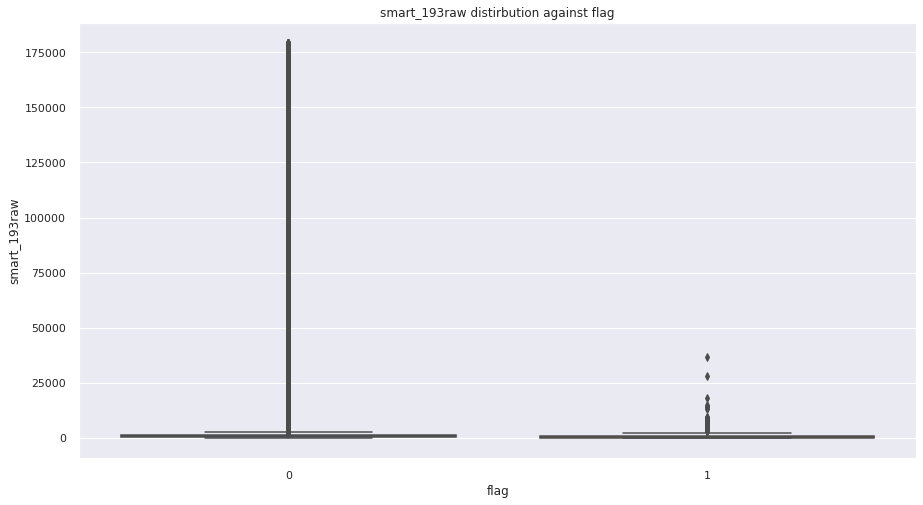

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_194raw distirbution against flag')

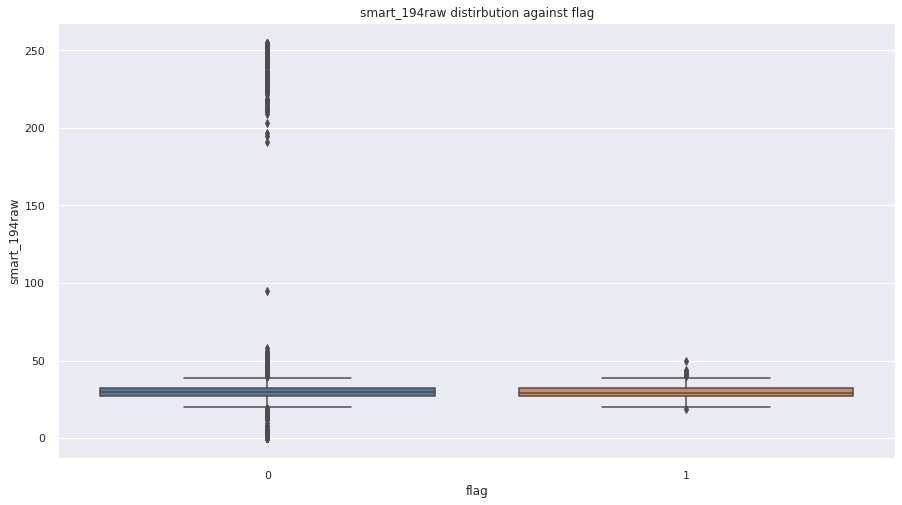

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_195raw distirbution against flag')

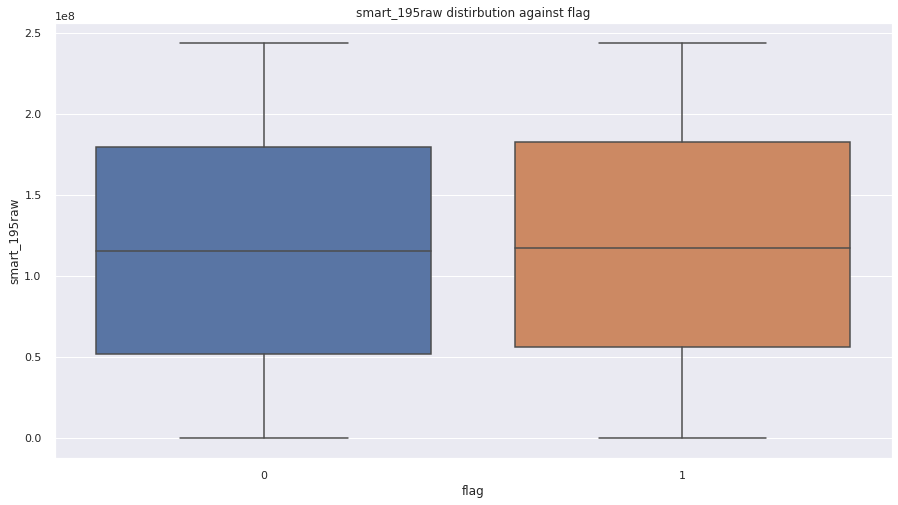

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_197raw distirbution against flag')

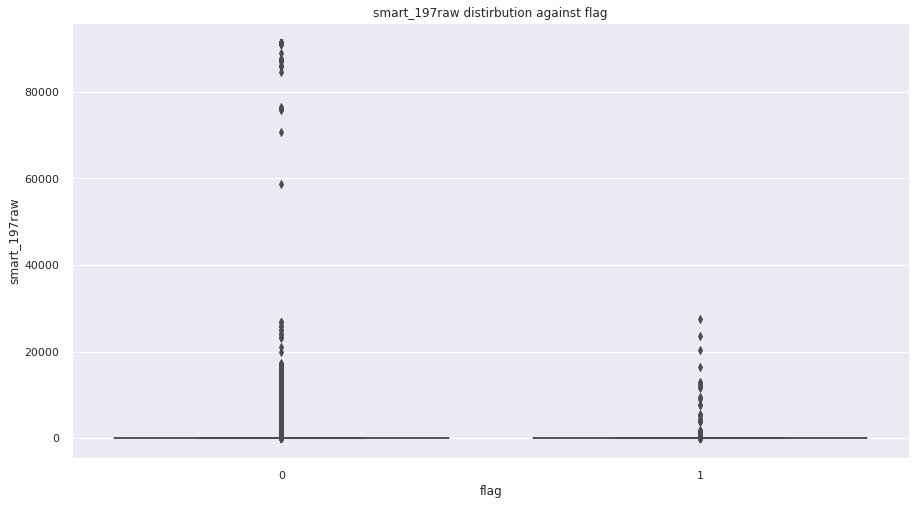

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_198raw distirbution against flag')

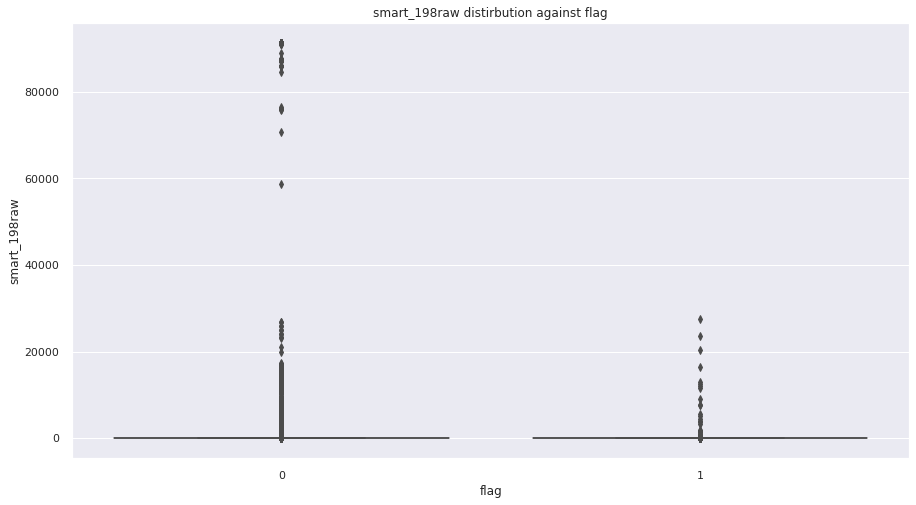

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_199raw distirbution against flag')

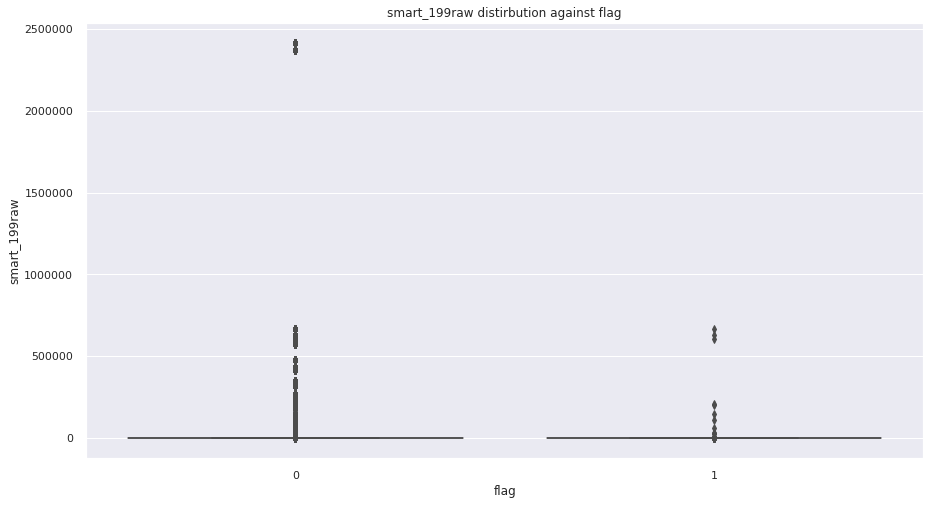

In [24]:
for cont_col in cont_cols:
    tmp_df = train_fe_df[[cont_col,'flag']]
    plt.figure(figsize=(15,8))
    sns.boxplot(x='flag', y=cont_col,  data=tmp_df)
    plt.title('%s distirbution against flag' % cont_col)
    plt.show()

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_1_normalized distirbution against tag')

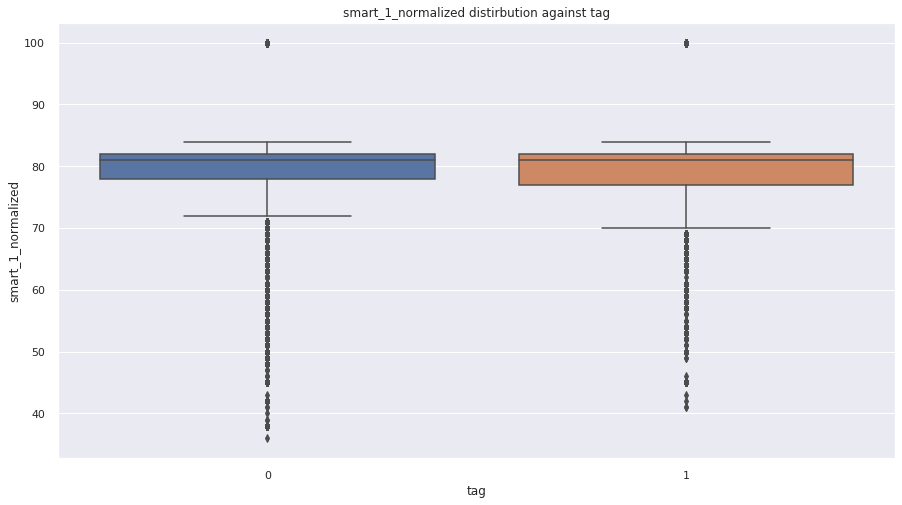

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_3_normalized distirbution against tag')

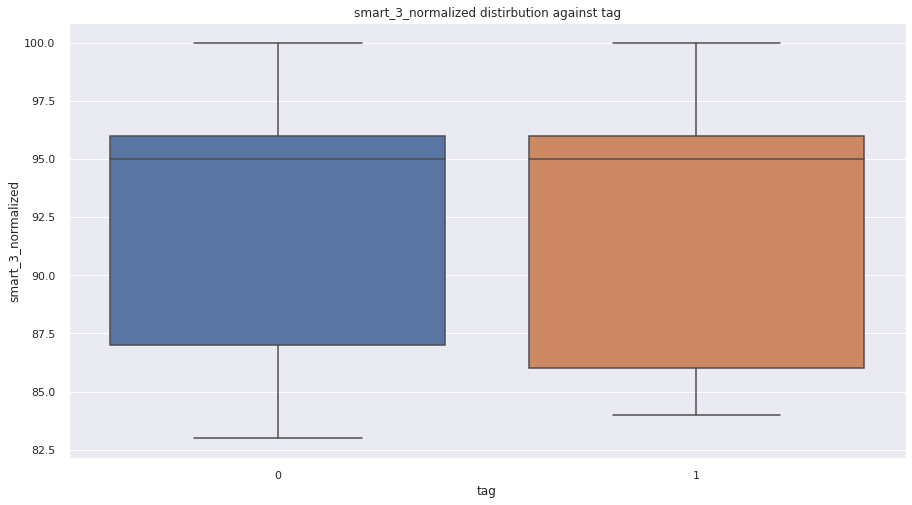

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_4_normalized distirbution against tag')

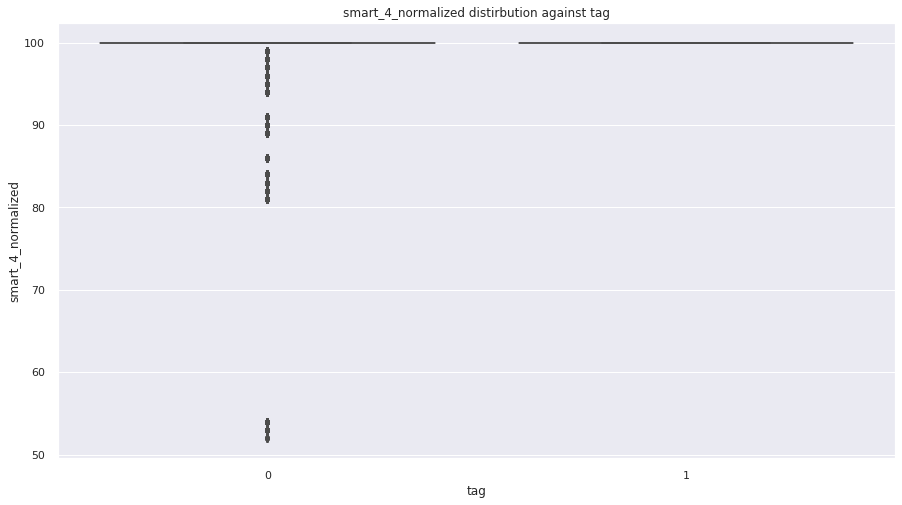

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_5_normalized distirbution against tag')

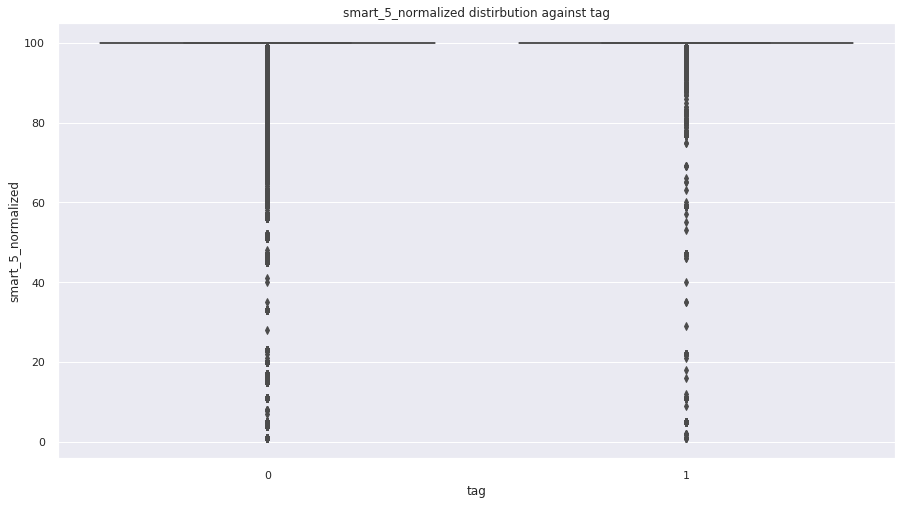

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_7_normalized distirbution against tag')

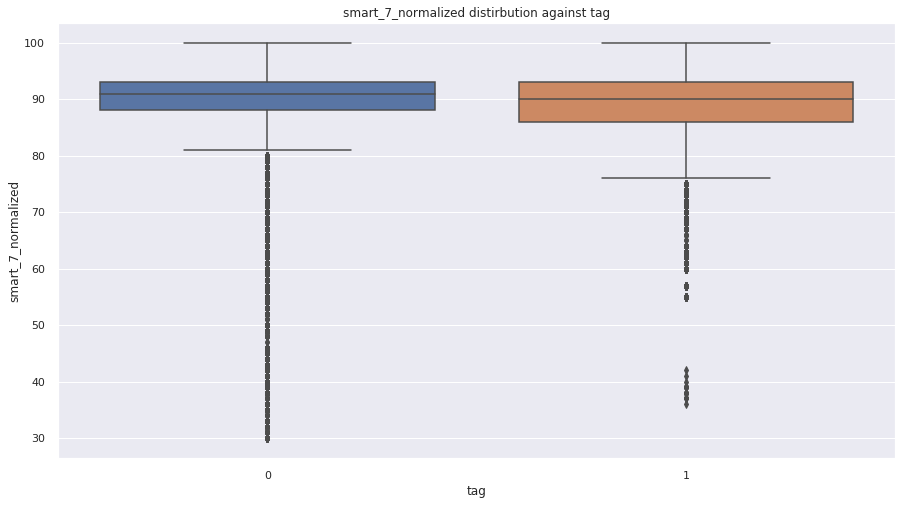

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_9_normalized distirbution against tag')

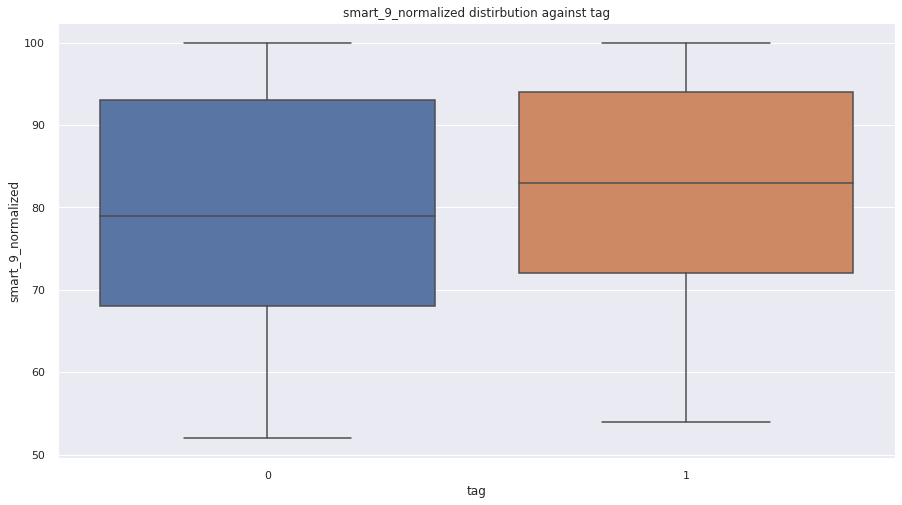

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_10_normalized distirbution against tag')

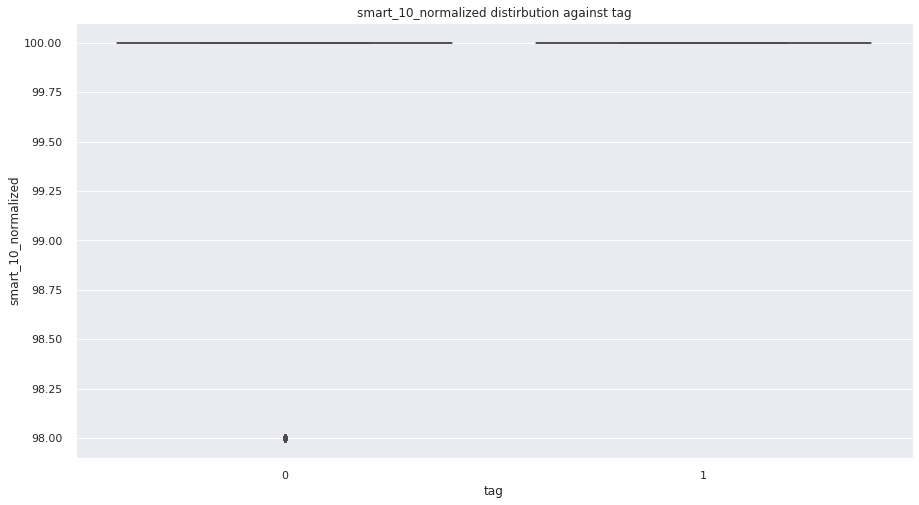

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_12_normalized distirbution against tag')

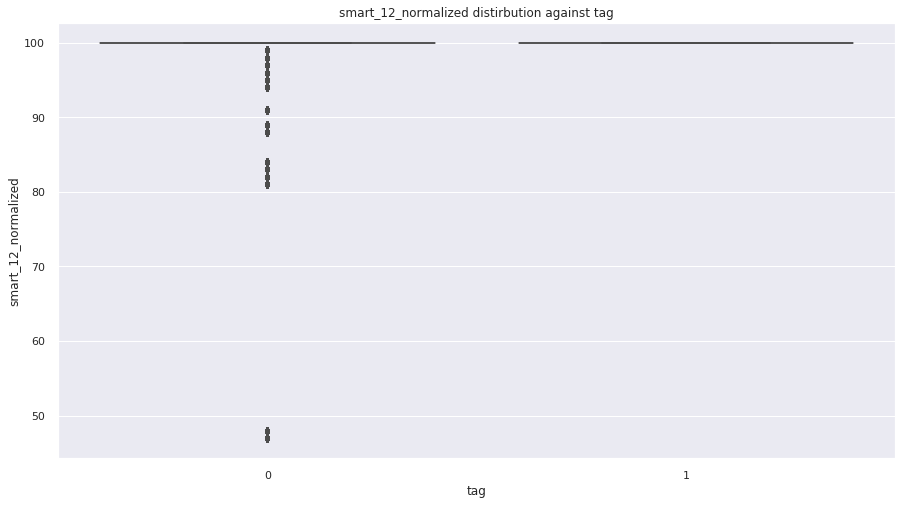

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_184_normalized distirbution against tag')

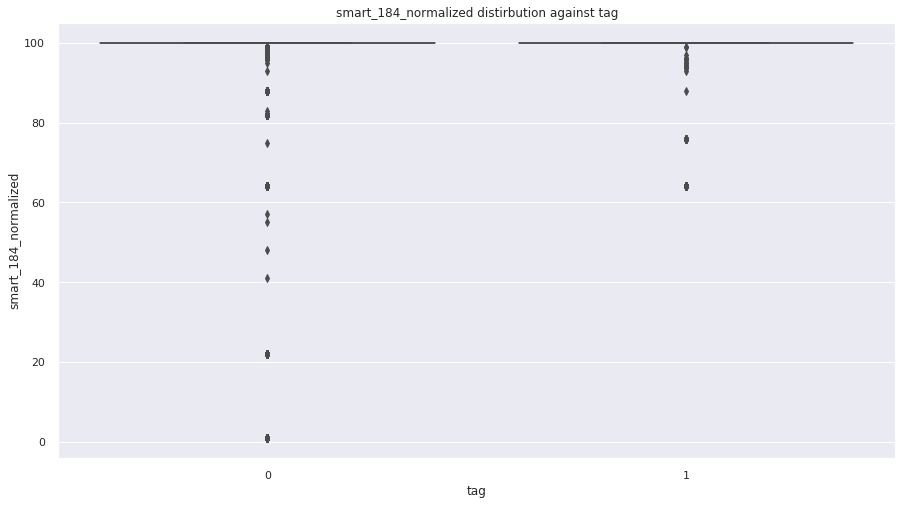

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_187_normalized distirbution against tag')

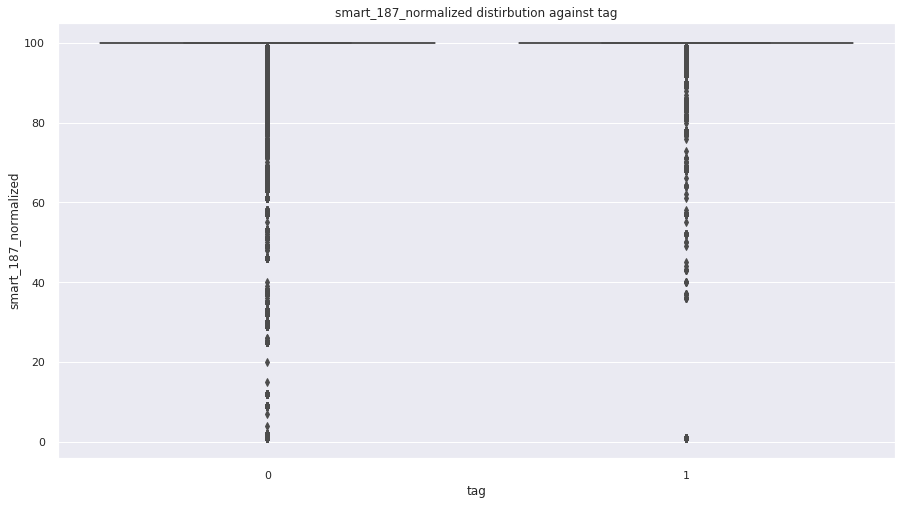

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_188_normalized distirbution against tag')

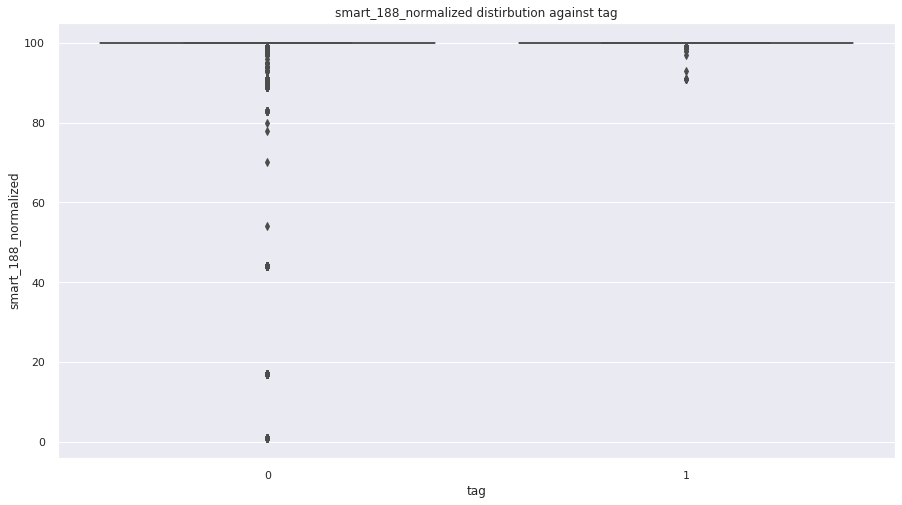

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_189_normalized distirbution against tag')

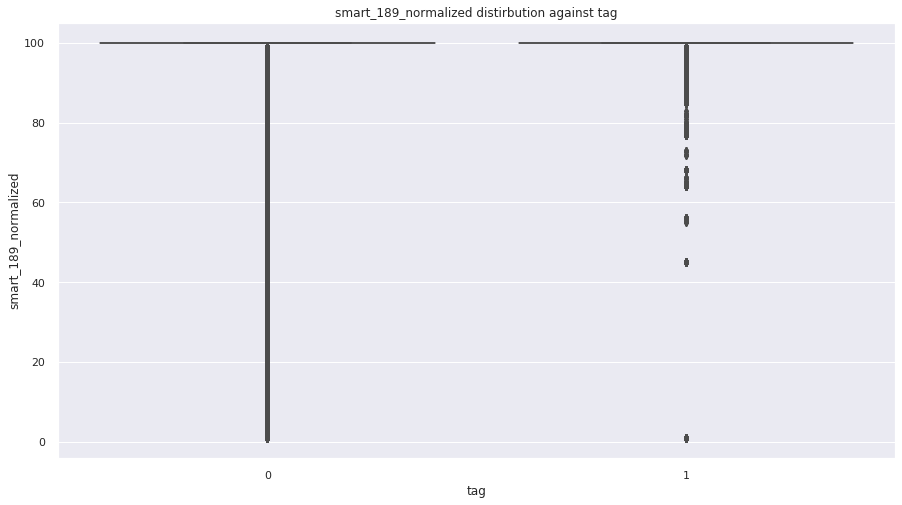

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_190_normalized distirbution against tag')

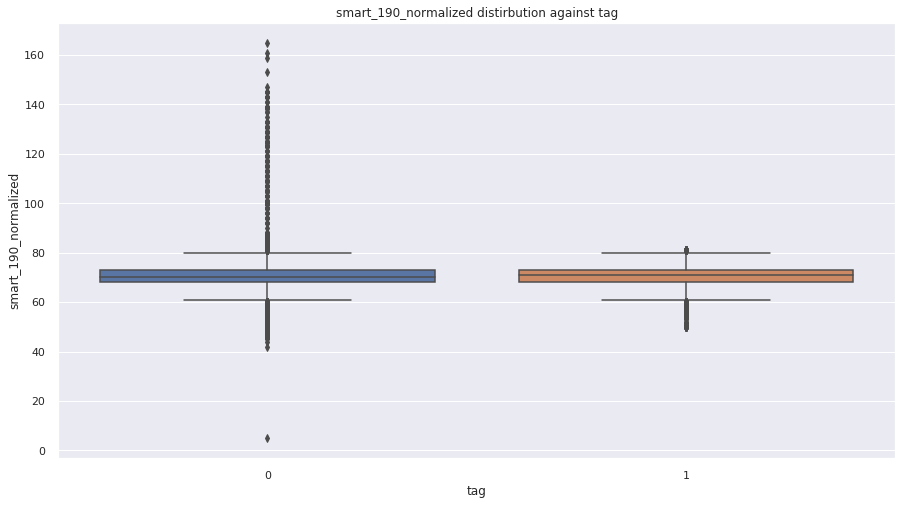

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_191_normalized distirbution against tag')

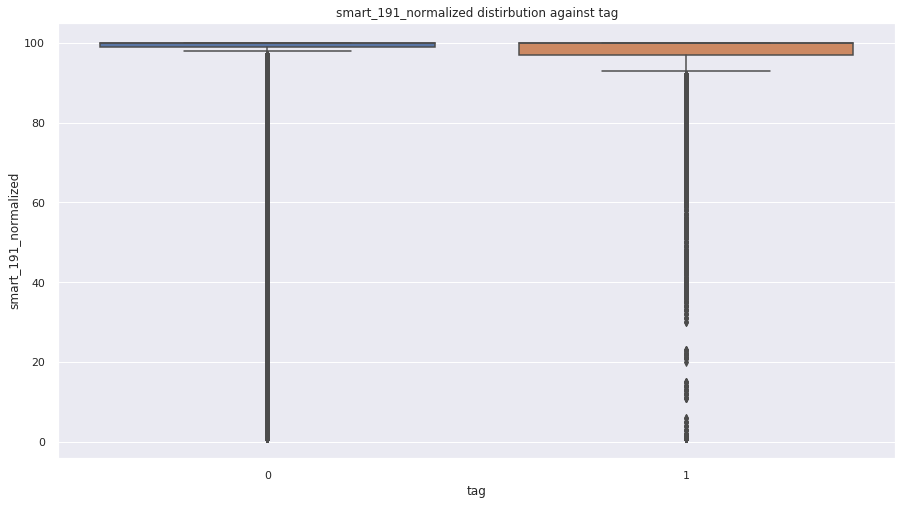

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_192_normalized distirbution against tag')

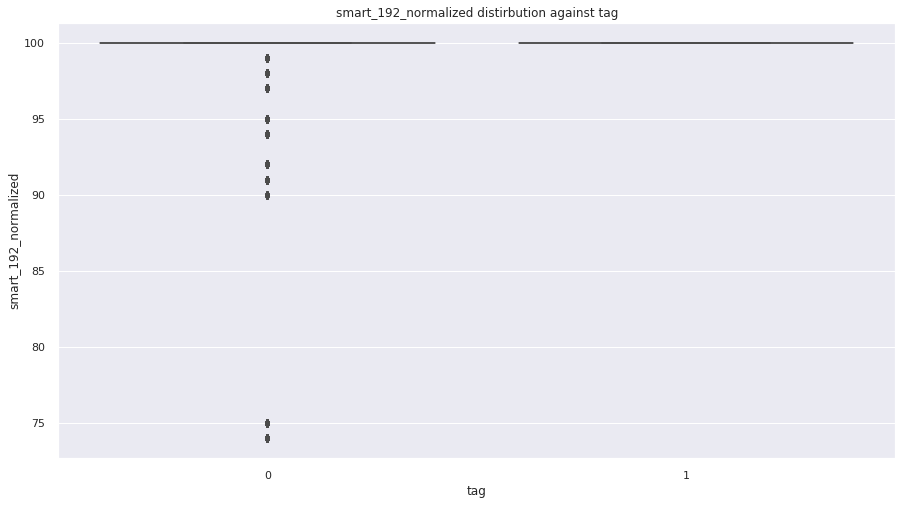

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_193_normalized distirbution against tag')

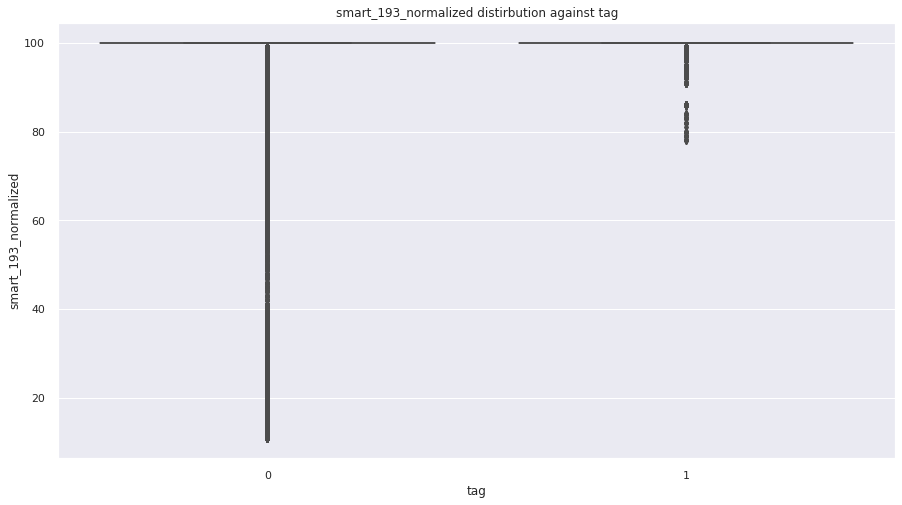

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_194_normalized distirbution against tag')

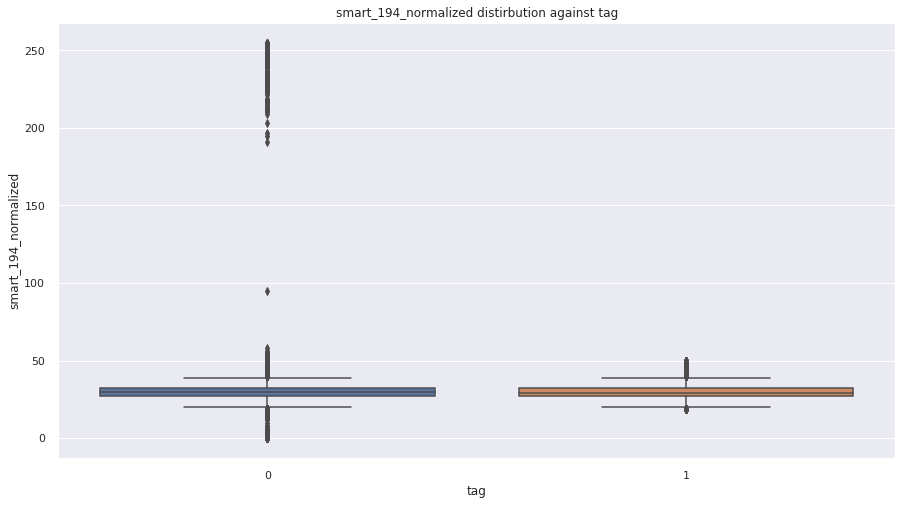

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_195_normalized distirbution against tag')

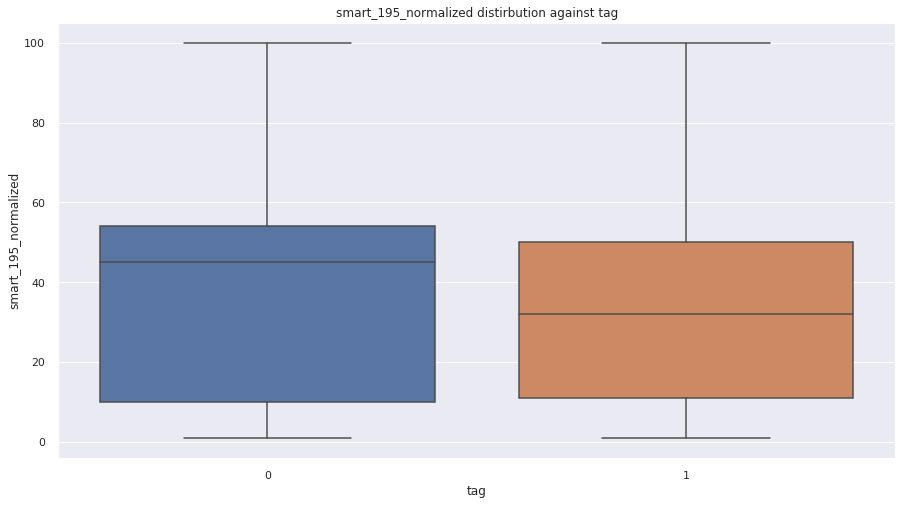

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_197_normalized distirbution against tag')

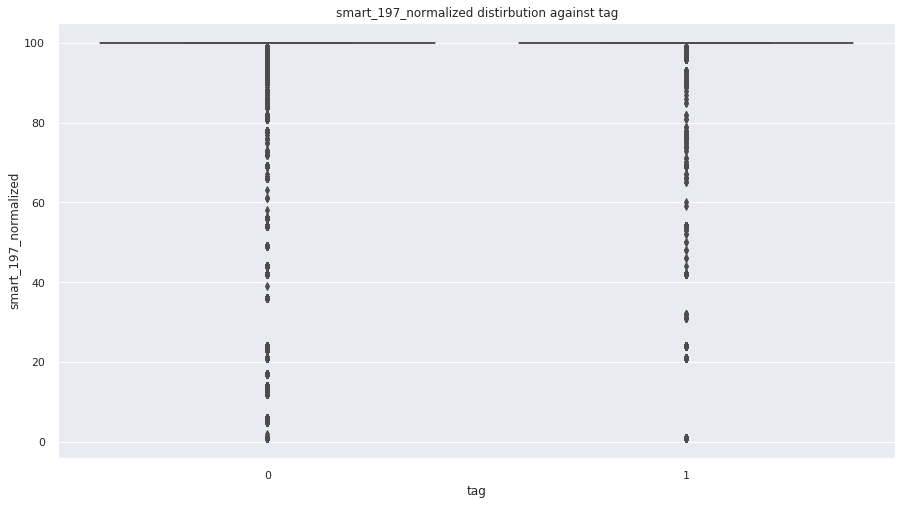

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_198_normalized distirbution against tag')

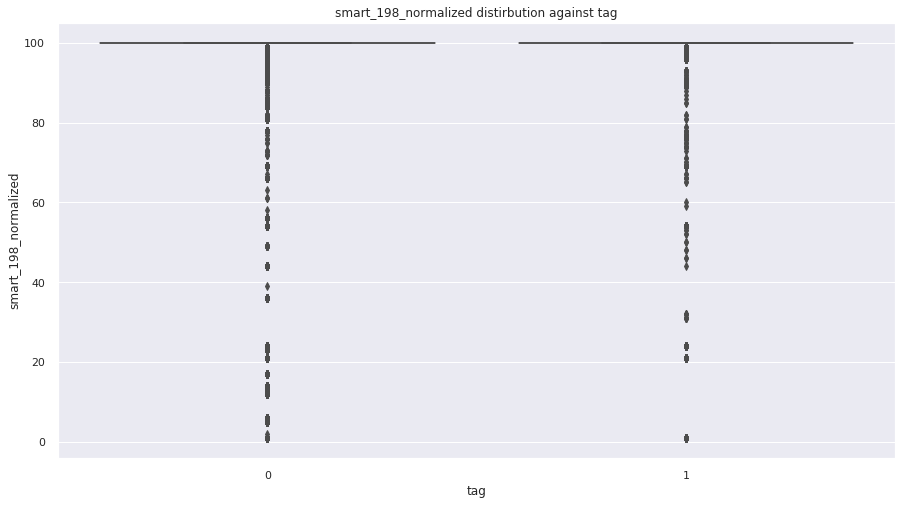

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_199_normalized distirbution against tag')

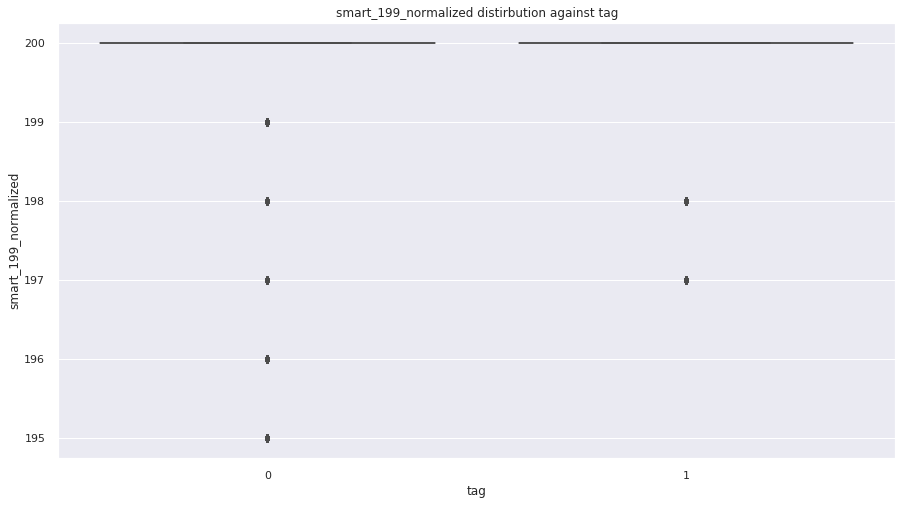

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_1raw distirbution against tag')

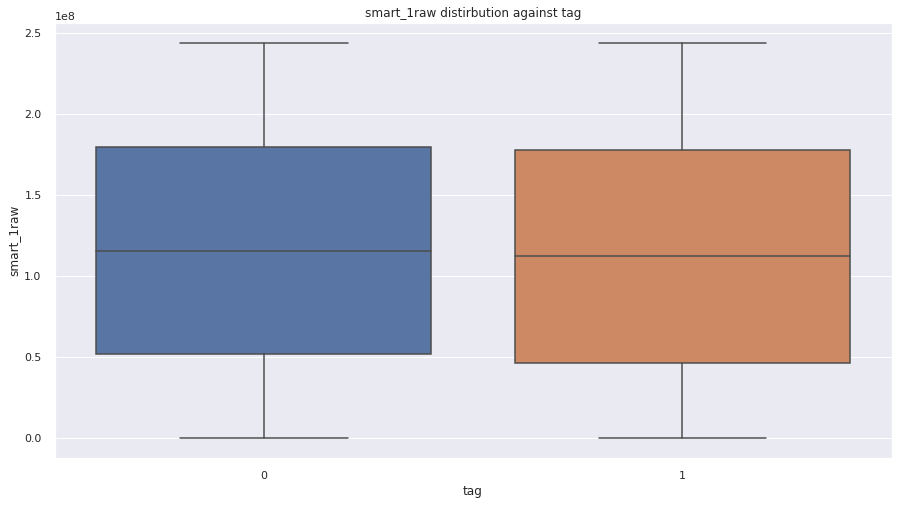

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_3raw distirbution against tag')

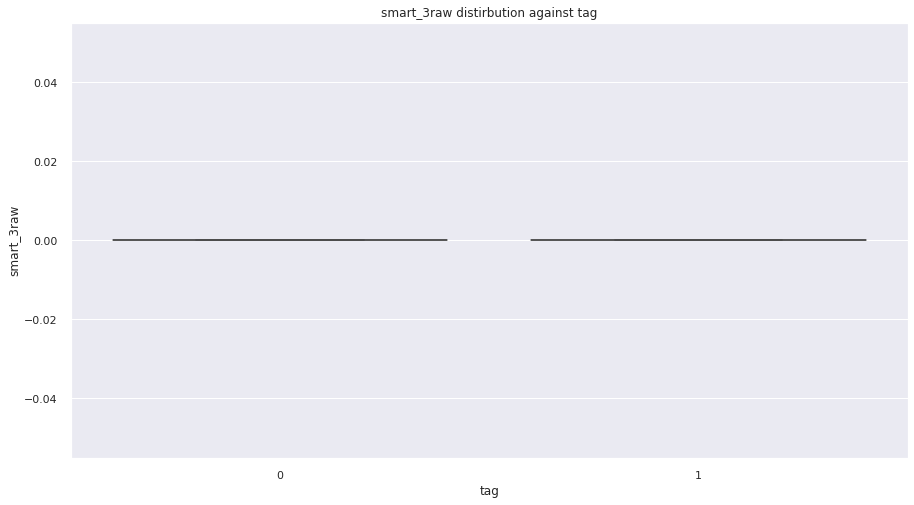

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_4raw distirbution against tag')

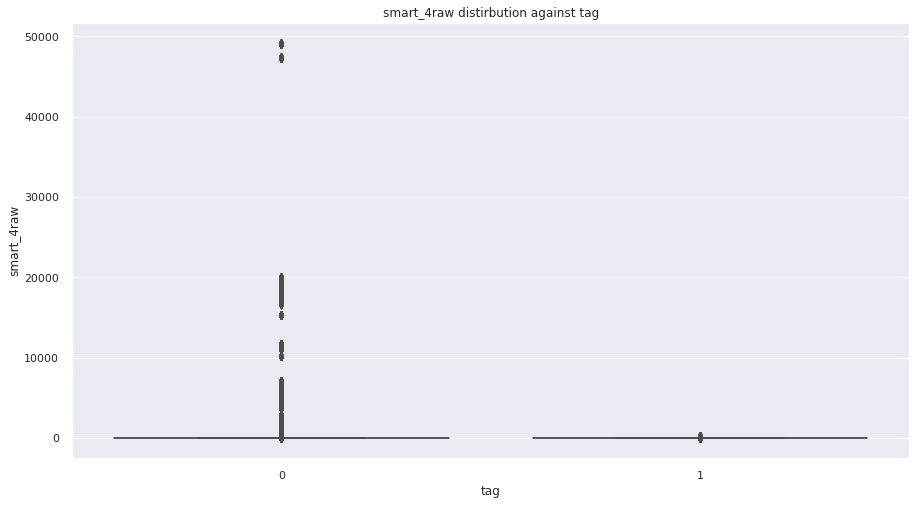

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_5raw distirbution against tag')

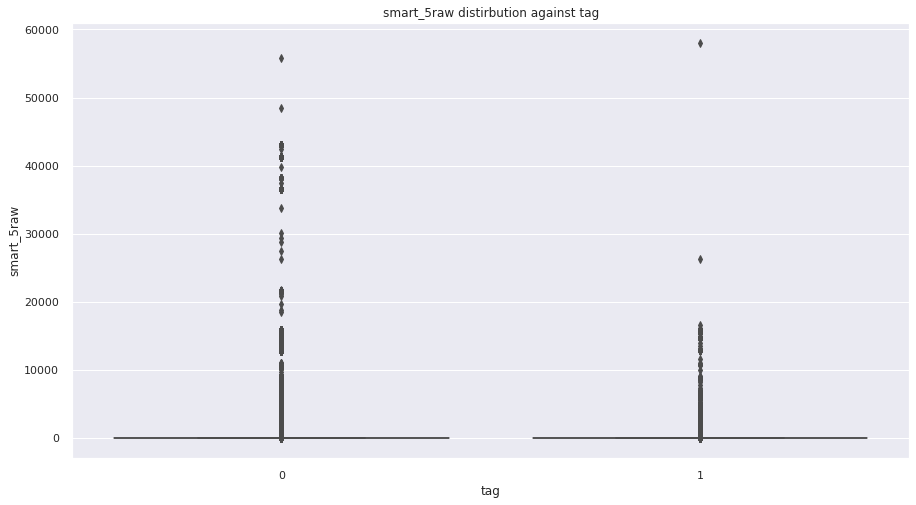

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_7raw distirbution against tag')

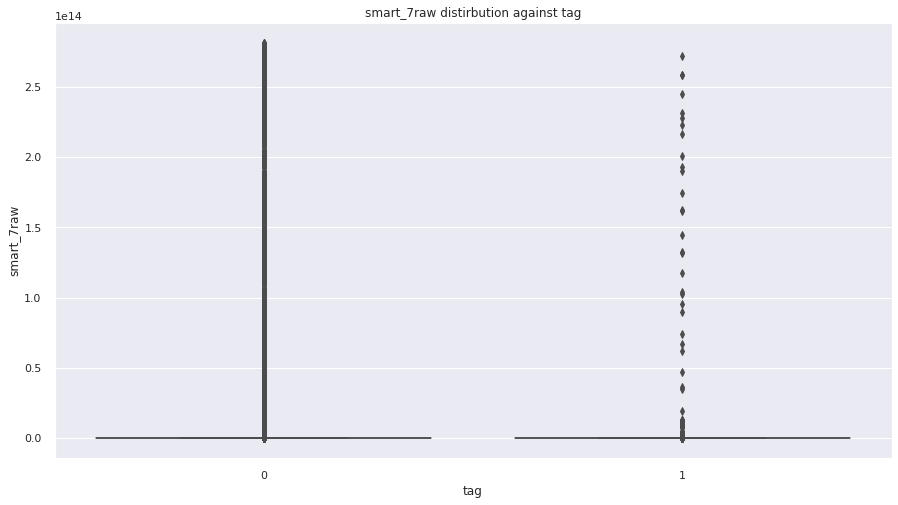

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_9raw distirbution against tag')

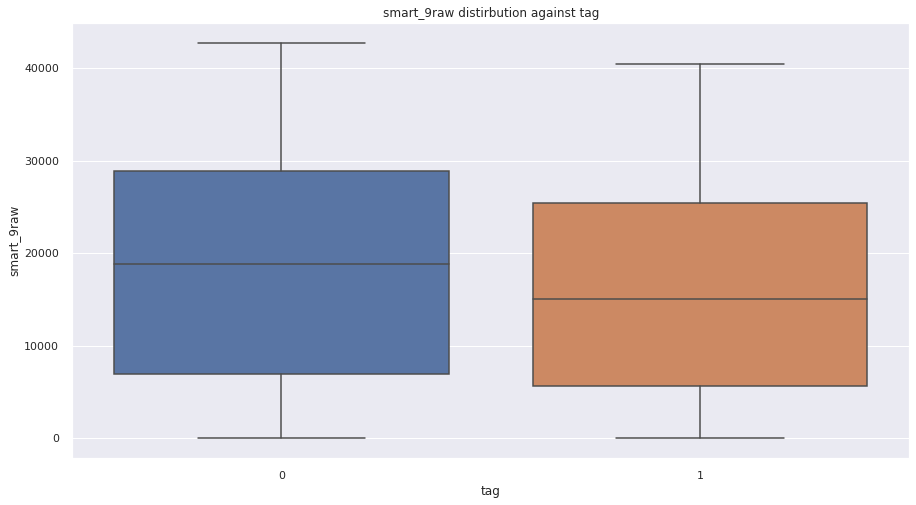

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_10raw distirbution against tag')

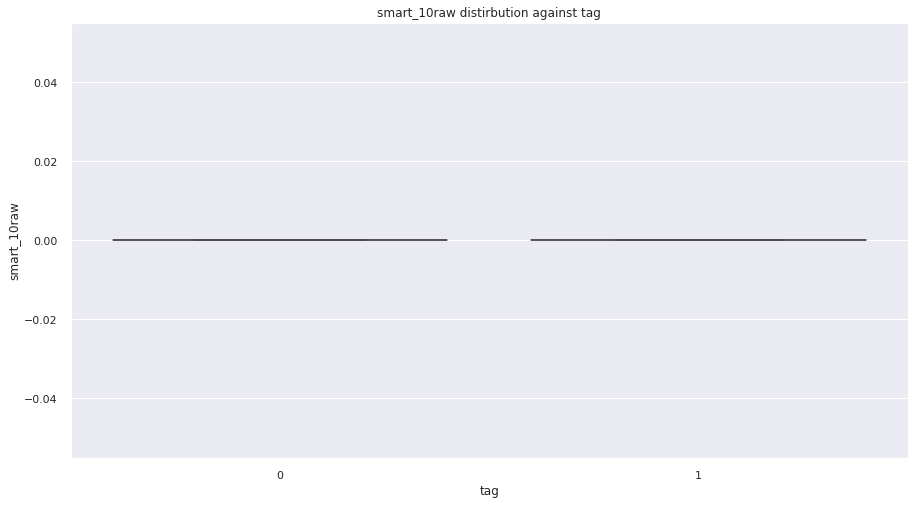

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_12raw distirbution against tag')

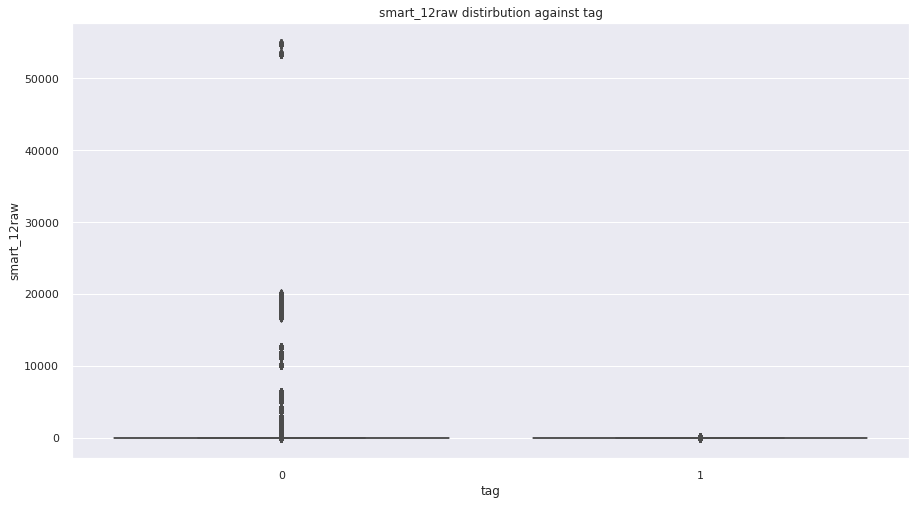

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_184raw distirbution against tag')

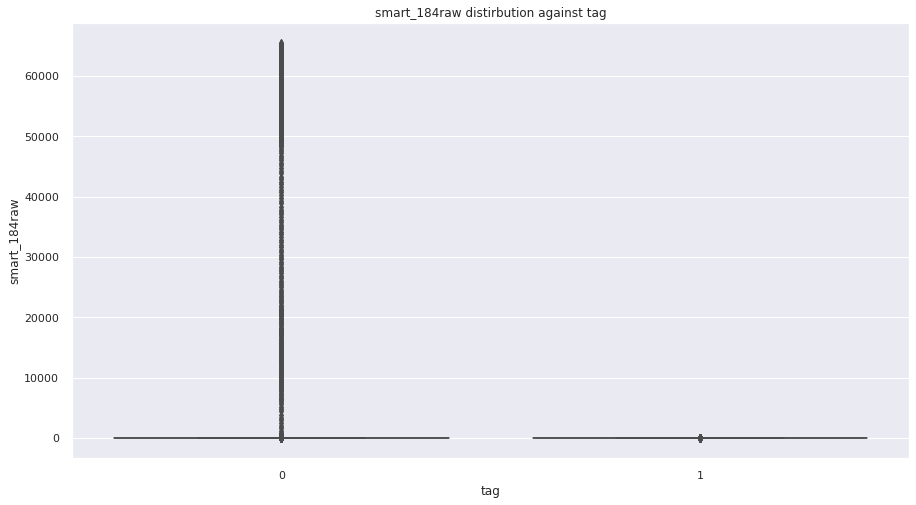

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_187raw distirbution against tag')

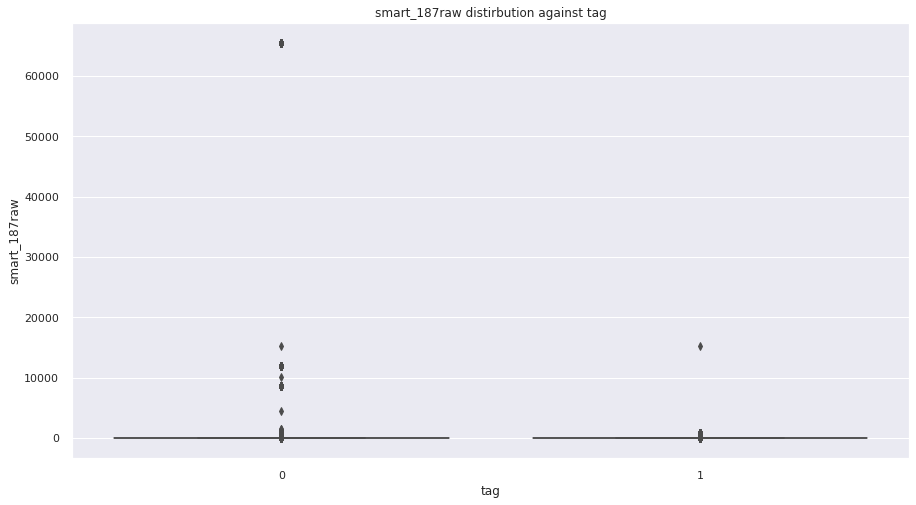

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_188raw distirbution against tag')

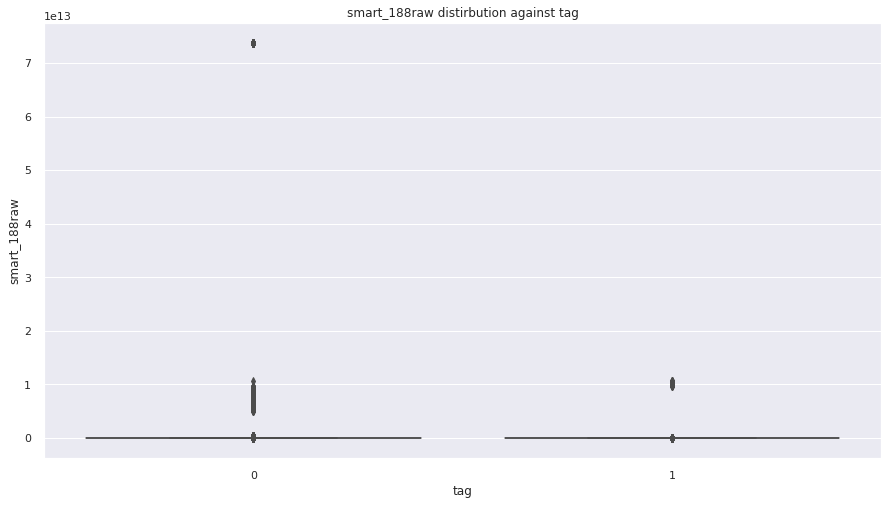

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_189raw distirbution against tag')

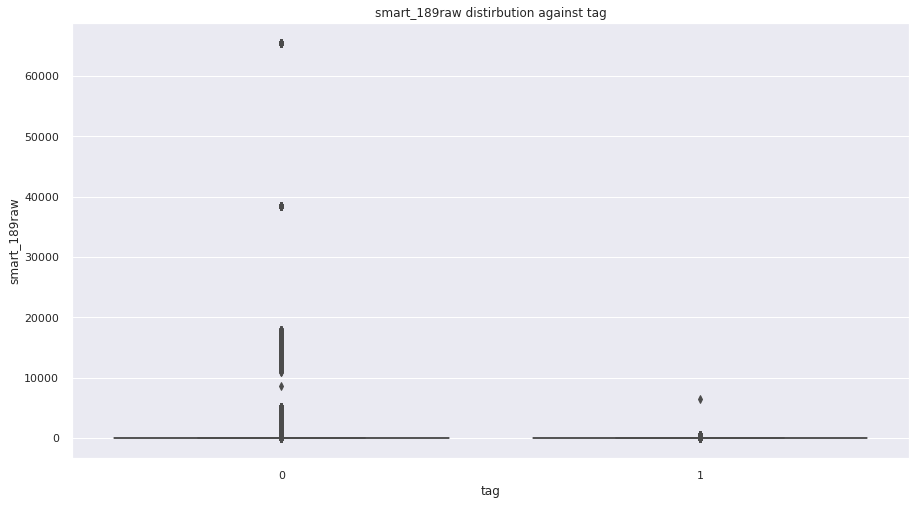

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_190raw distirbution against tag')

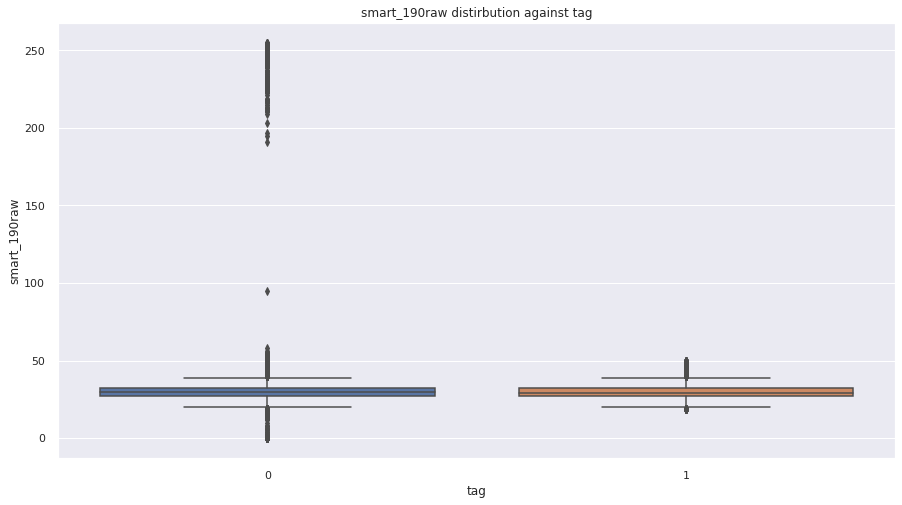

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_191raw distirbution against tag')

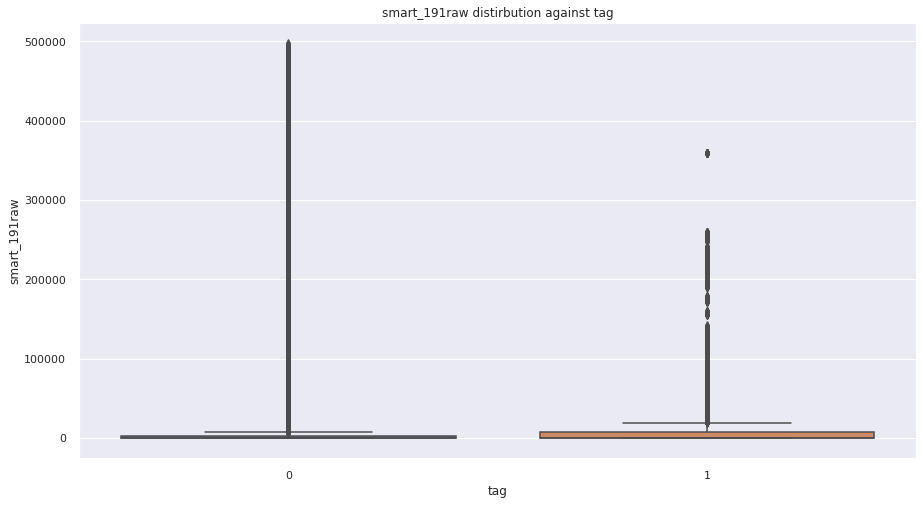

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_192raw distirbution against tag')

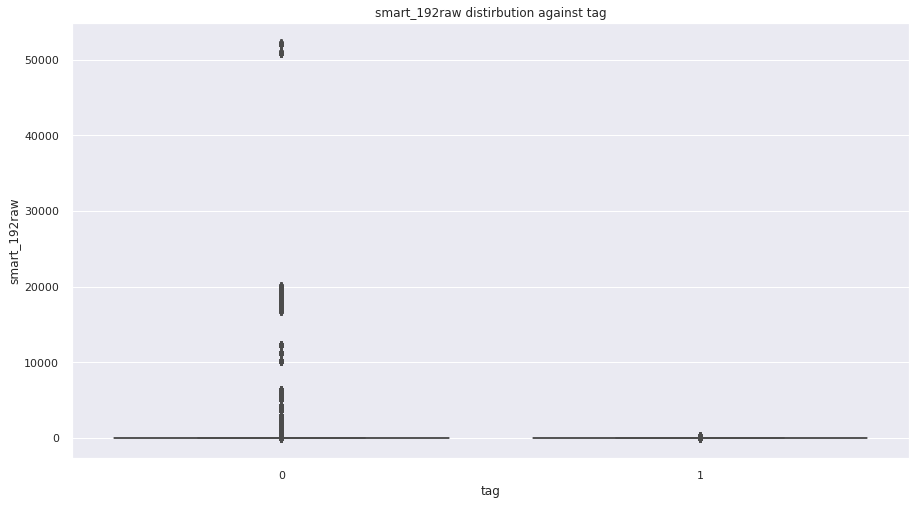

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_193raw distirbution against tag')

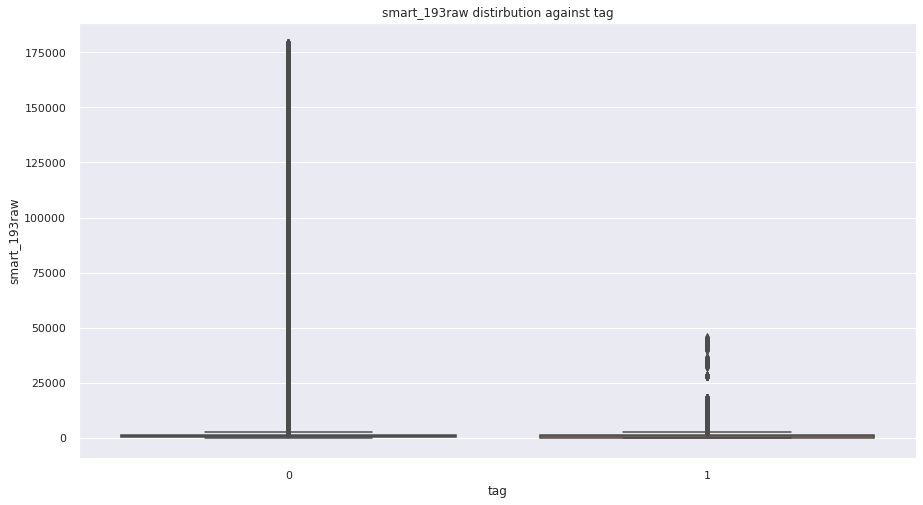

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_194raw distirbution against tag')

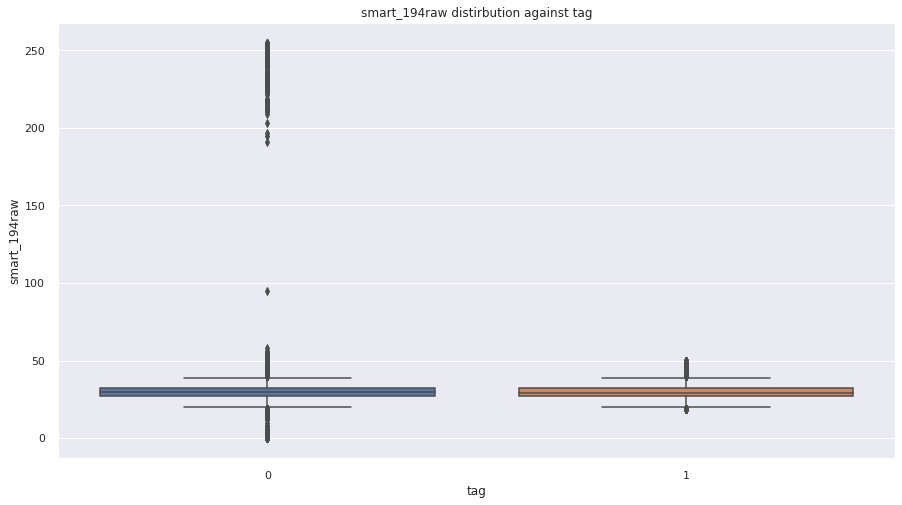

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_195raw distirbution against tag')

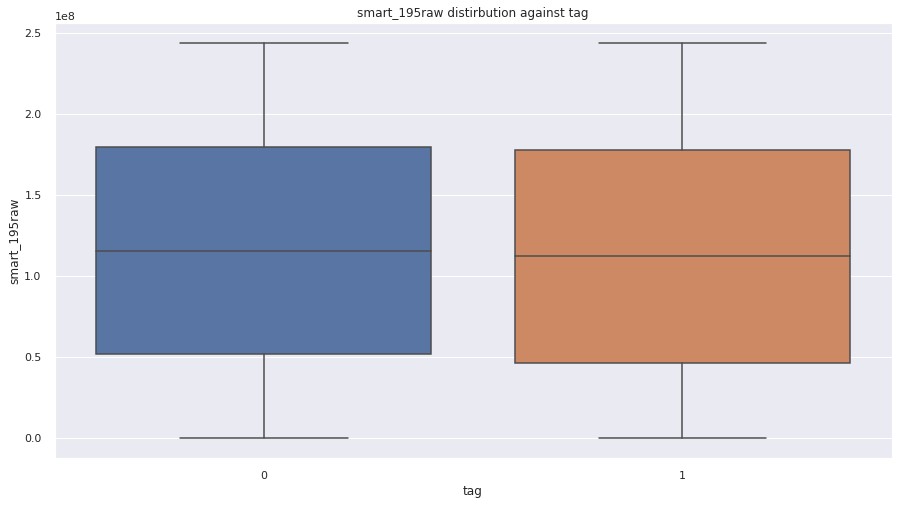

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_197raw distirbution against tag')

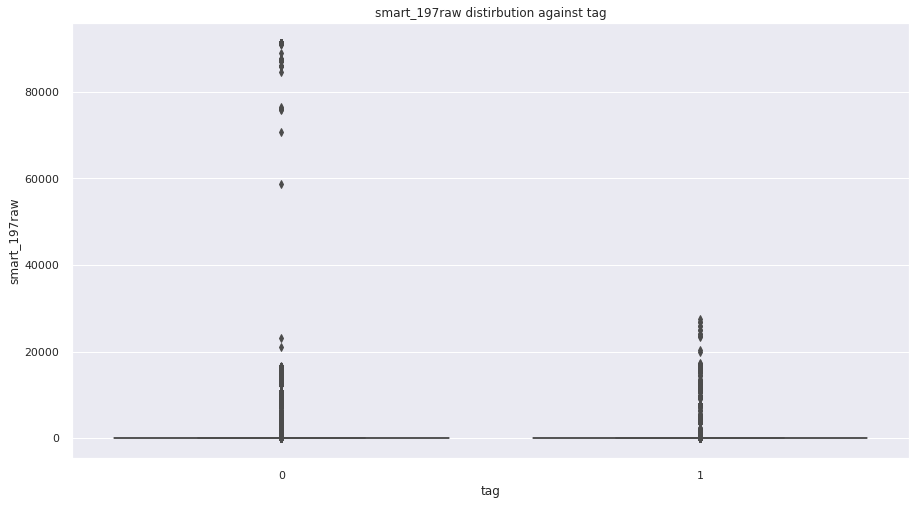

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_198raw distirbution against tag')

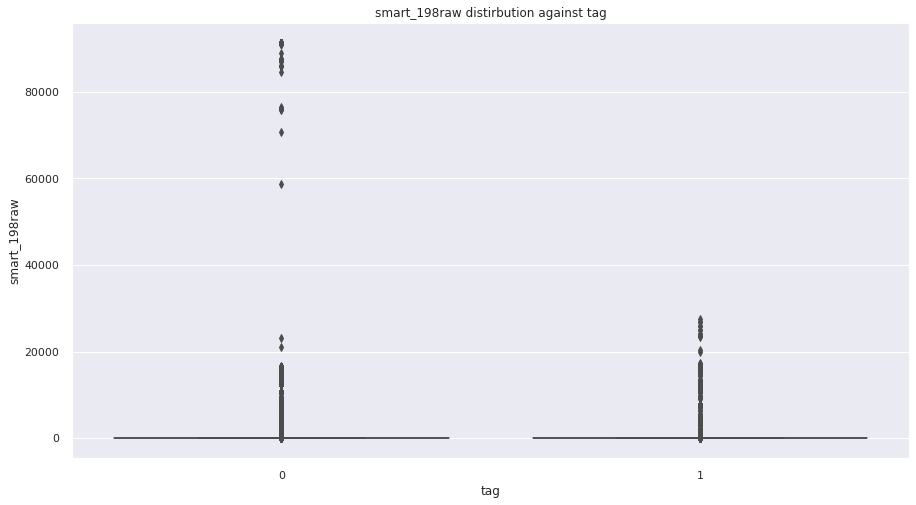

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'smart_199raw distirbution against tag')

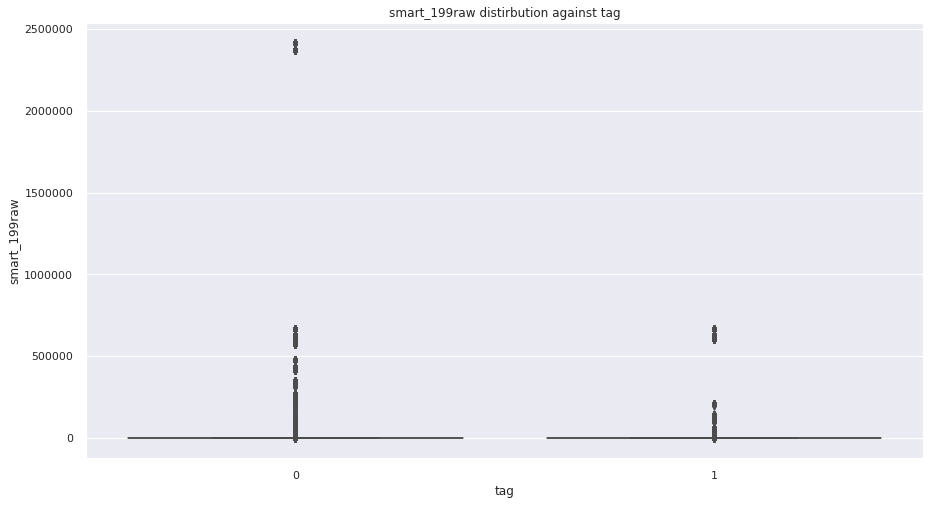

In [25]:
for cont_col in cont_cols:
    tmp_df = train_fe_df[[cont_col,'tag']]
    plt.figure(figsize=(15,8))
    sns.boxplot(x='tag', y=cont_col,  data=tmp_df)
    plt.title('%s distirbution against tag' % cont_col)
    plt.show()

In [ ]:
same_distribution_cols = ['smart_4_normalized', 'smart_5_normalized', 'smart_10_normalized',
                          'smart_12_normalized', 'smart_184_normalized', 'smart_184_normalized',
                          'smart_188_normalized', 'smart_189_normalized', 'smart_192_normalized',
                          'smart_193_normalized', 'smart_197_normalized', 'smart_198_normalized',
                          'smart_199_normalized', 'smart_3raw','smart_4raw', 'smart_5raw', 'smart_7raw',
                          'smart_10raw', 'smart_12raw', 'smart_184raw', 'smart_187raw',
                          'smart_188raw', 'smart_189raw', 'smart_192raw', 'smart_197raw',
                           'smart_198raw', 'smart_199raw']

In [ ]:
train_fe_df.tag.value_counts()

In [ ]:
for col in cont_cols:
    sns.kdeplot(train_fe_df[col],  label='train')
    sns.kdeplot(test_fe_df[col],  label='test')
    plt.legend()
    title = 'Distribution of %s between train(201801-201807) and test(201808)'%col
    plt.title(title)
    plt.savefig(os.path.join(conf.FIGURE_DIR, title))
    plt.show()

In [ ]:
train_fe_df[]

In [ ]:
cols_with_small_std = ['smart_4_normalized',
                       'smart_5_normalized',
                       'smart_12_normalized',
                       'smart_187_normalized',
                       'smart_188_normalized',
                       'smart_189_normalized',
                       'smart_193_normalized',
                       'smart_197_normalized',
                       'smart_198_normalized',
                       'smart_4raw',
                       'smart_5raw',
                       'smart_7raw',
                       'smart_12raw',
                       'smart_184raw',
                       'smart_187raw',
                       'smart_188raw',
                       'smart_189raw',
                       'smart_192raw',
                      '']

In [ ]:
log_func = lambda x : np.log(x) if x!=0 else 0
for col in cont_cols:
    sns.kdeplot(train_fe_df[col].apply(log_func),  label='train_log')
    sns.kdeplot(test_fe_df[col].apply(log_func),  label='test_log')
    plt.legend()
    title = 'Log Distribution of %s between train(201801-201807) and test(201808)'%col
    plt.title(title)
    plt.savefig(os.path.join(conf.FIGURE_DIR, title))
    plt.show()

In [ ]:
fault_df = train_fe_df[train_fe_df.flag==1]

In [ ]:
normal_df = train_fe_df[train_fe_df.flag==0]

In [ ]:
fault_df.head()

In [ ]:
for col in cont_cols:
    print(col)
    print(ks_2samp(fault_df[col],normal_df[col]))

In [ ]:
for col in cont_cols:
    print(col)
    print(len(train_df[col].unique()))
    print(len(test_df[col].unique()))
    print(train_df[[col]].apply(max))
    print(test_df[[col]].apply(max))
    print(train_df[[col]].apply(min))
    print(test_df[[col]].apply(min))

### <a id='4'> 4. check the correlation between feature and targets</a>

In [11]:
def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError(
            'cannot handle data conversion of type: {} to {}'.format(
                type(data), to))
    else:
        return converted


def remove_incomplete_samples(x, y):
    x = [v if v is not None else np.nan for v in x]
    y = [v if v is not None else np.nan for v in y]
    arr = np.array([x, y]).transpose()
    arr = arr[~np.isnan(arr).any(axis=1)].transpose()
    if isinstance(x, list):
        return arr[0].tolist(), arr[1].tolist()
    else:
        return arr[0], arr[1]


def replace_nan_with_value(x, y, value):
    x = [v if v == v and v is not None else value for v in x]  # NaN != NaN
    y = [v if v == v and v is not None else value for v in y]
    return x, y

In [12]:
import math
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
# from dython._private import (
#     convert, remove_incomplete_samples, replace_nan_with_value
# )

REPLACE = 'replace'
DROP = 'drop'
DROP_SAMPLES = 'drop_samples'
DROP_FEATURES = 'drop_features'
SKIP = 'skip'
DEFAULT_REPLACE_VALUE = 0.0


def conditional_entropy(x,
                        y,
                        nan_strategy=REPLACE,
                        nan_replace_value=DEFAULT_REPLACE_VALUE):
    """
    Calculates the conditional entropy of x given y: S(x|y)
    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    **Returns:** float
    Parameters
    ----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    """
    if nan_strategy == REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == DROP:
        x, y = remove_incomplete_samples(x, y)
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy)
    return entropy


def cramers_v(x,
              y,
              nan_strategy=REPLACE,
              nan_replace_value=DEFAULT_REPLACE_VALUE):
    """
    Calculates Cramer's V statistic for categorical-categorical association.
    Uses correction from Bergsma and Wicher, Journal of the Korean Statistical
    Society 42 (2013): 323-328.
    This is a symmetric coefficient: V(x,y) = V(y,x)
    Original function taken from: https://stackoverflow.com/a/46498792/5863503
    Wikipedia: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
    **Returns:** float in the range of [0,1]
    Parameters
    ----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    """
    if nan_strategy == REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == DROP:
        x, y = remove_incomplete_samples(x, y)
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


def theils_u(x,
             y,
             nan_strategy=REPLACE,
             nan_replace_value=DEFAULT_REPLACE_VALUE):
    """
    Calculates Theil's U statistic (Uncertainty coefficient) for categorical-
    categorical association. This is the uncertainty of x given y: value is
    on the range of [0,1] - where 0 means y provides no information about
    x, and 1 means y provides full information about x.
    This is an asymmetric coefficient: U(x,y) != U(y,x)
    Wikipedia: https://en.wikipedia.org/wiki/Uncertainty_coefficient
    **Returns:** float in the range of [0,1]
    Parameters
    ----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    """
    if nan_strategy == REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == DROP:
        x, y = remove_incomplete_samples(x, y)
    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n / total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x


def correlation_ratio(categories,
                      measurements,
                      nan_strategy=REPLACE,
                      nan_replace_value=DEFAULT_REPLACE_VALUE):
    """
    Calculates the Correlation Ratio (sometimes marked by the greek letter Eta)
    for categorical-continuous association.
    Answers the question - given a continuous value of a measurement, is it
    possible to know which category is it associated with?
    Value is in the range [0,1], where 0 means a category cannot be determined
    by a continuous measurement, and 1 means a category can be determined with
    absolute certainty.
    Wikipedia: https://en.wikipedia.org/wiki/Correlation_ratio
    **Returns:** float in the range of [0,1]
    Parameters
    ----------
    categories : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    measurements : list / NumPy ndarray / Pandas Series
        A sequence of continuous measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    """
    if nan_strategy == REPLACE:
        categories, measurements = replace_nan_with_value(
            categories, measurements, nan_replace_value)
    elif nan_strategy == DROP:
        categories, measurements = remove_incomplete_samples(
            categories, measurements)
    categories = convert(categories, 'array')
    measurements = convert(measurements, 'array')
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(
        np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg),
                                      2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator / denominator)
    return eta


def identify_nominal_columns(dataset, include=['object', 'category']):
    """Given a dataset, identify categorical columns.
    Parameters:
    -----------
    dataset : a pandas dataframe
    include : which column types to filter by; default: ['object', 'category'])
    Returns:
    --------
    categorical_columns : a list of categorical columns
    Example:
    --------
    >> df = pd.DataFrame({'col1': ['a', 'b', 'c', 'a'], 'col2': [3, 4, 2, 1]})
    >> identify_nominal_columns(df)
    ['col1']
    """
    dataset = convert(dataset, 'dataframe')
    nominal_columns = list(dataset.select_dtypes(include=include).columns)
    return nominal_columns


def associations(dataset,
                 nominal_columns='auto',
                 mark_columns=False,
                 theil_u=False,
                 plot=True,
                 return_results=False,
                 clustering=False,
                 nan_strategy=REPLACE,
                 nan_replace_value=DEFAULT_REPLACE_VALUE,
                 ax=None,
                 **kwargs):
    """
    Calculate the correlation/strength-of-association of features in data-set
    with both categorical (eda_tools) and continuous features using:
     * Pearson's R for continuous-continuous cases
     * Correlation Ratio for categorical-continuous cases
     * Cramer's V or Theil's U for categorical-categorical cases
    **Returns:** a DataFrame of the correlation/strength-of-association between
    all features
    **Example:** see `associations_example` under `dython.examples`
    Parameters
    ----------
    dataset : NumPy ndarray / Pandas DataFrame
        The data-set for which the features' correlation is computed
    nominal_columns : string / list / NumPy ndarray
        Names of columns of the data-set which hold categorical values. Can
        also be the string 'all' to state that all columns are categorical,
        'auto' (default) to try to identify nominal columns, or None to state
        none are categorical
    mark_columns : Boolean, default = False
        if True, output's columns' names will have a suffix of '(nom)' or
        '(con)' based on there type (eda_tools or continuous), as provided
        by nominal_columns
    theil_u : Boolean, default = False
        In the case of categorical-categorical feaures, use Theil's U instead
        of Cramer's V
    plot : Boolean, default = True
        If True, plot a heat-map of the correlation matrix
    return_results : Boolean, default = False
        If True, the function will return a Pandas DataFrame of the computed
        associations
    clustering : Boolean, default = False
        If True, hierarchical clustering is applied in order to sort
        features into meaningful groups
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop_samples' to remove
        samples with missing values, 'drop_features' to remove features
        (columns) with missing values, or 'replace' to replace all missing
        values with the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'
    ax : matplotlib ax, default = None
      Matplotlib Axis on which the heat-map will be plotted
    kwargs : any key-value pairs
        Arguments to be passed to used function and methods
    """
    dataset = convert(dataset, 'dataframe')
    if nan_strategy == REPLACE:
        dataset.fillna(nan_replace_value, inplace=True)
    elif nan_strategy == DROP_SAMPLES:
        dataset.dropna(axis=0, inplace=True)
    elif nan_strategy == DROP_FEATURES:
        dataset.dropna(axis=1, inplace=True)
    columns = dataset.columns
    if nominal_columns is None:
        nominal_columns = list()
    elif nominal_columns == 'all':
        nominal_columns = columns
    elif nominal_columns == 'auto':
        nominal_columns = identify_nominal_columns(dataset)

    corr = pd.DataFrame(index=columns, columns=columns)
    for i in range(0, len(columns)):
        for j in range(i, len(columns)):
            if i == j:
                corr[columns[i]][columns[j]] = 1.0
            else:
                if columns[i] in nominal_columns:
                    if columns[j] in nominal_columns:
                        if theil_u:
                            corr[columns[j]][columns[i]] = theils_u(
                                dataset[columns[i]],
                                dataset[columns[j]],
                                nan_strategy=SKIP)
                            corr[columns[i]][columns[j]] = theils_u(
                                dataset[columns[j]],
                                dataset[columns[i]],
                                nan_strategy=SKIP)
                        else:
                            cell = cramers_v(dataset[columns[i]],
                                             dataset[columns[j]],
                                             nan_strategy=SKIP)
                            corr[columns[i]][columns[j]] = cell
                            corr[columns[j]][columns[i]] = cell
                    else:
                        cell = correlation_ratio(dataset[columns[i]],
                                                 dataset[columns[j]],
                                                 nan_strategy=SKIP)
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                else:
                    if columns[j] in nominal_columns:
                        cell = correlation_ratio(dataset[columns[j]],
                                                 dataset[columns[i]],
                                                 nan_strategy=SKIP)
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                    else:
                        cell, _ = ss.pearsonr(dataset[columns[i]],
                                              dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
    corr.fillna(value=np.nan, inplace=True)
    if mark_columns:
        marked_columns = [
            '{} (nom)'.format(col)
            if col in nominal_columns else '{} (con)'.format(col)
            for col in columns
        ]
        corr.columns = marked_columns
        corr.index = marked_columns
    if clustering:
        corr, _ = cluster_correlations(corr)
    if plot:
        if ax is None:
            plt.figure(figsize=kwargs.get('figsize', None))
        sns.heatmap(
            corr,
            cmap=kwargs.get('cmap', None),
            annot=kwargs.get('annot', True),
            fmt=kwargs.get('fmt', '.2f'),
            ax=ax
        )
        if ax is None:
            plt.show()
    if return_results:
        return corr


def numerical_encoding(dataset,
                       nominal_columns='auto',
                       drop_single_label=False,
                       drop_fact_dict=True,
                       nan_strategy=REPLACE,
                       nan_replace_value=DEFAULT_REPLACE_VALUE):
    """
    Encoding a data-set with mixed data (numerical and categorical) to a
    numerical-only data-set using the following logic:
    * categorical with only a single value will be marked as zero (or dropped,
        if requested)
    * categorical with two values will be replaced with the result of Pandas
        `factorize`
    * categorical with more than two values will be replaced with the result
        of Pandas `get_dummies`
    * numerical columns will not be modified
    **Returns:** DataFrame or (DataFrame, dict). If `drop_fact_dict` is True,
    returns the encoded DataFrame.
    else, returns a tuple of the encoded DataFrame and dictionary, where each
    key is a two-value column, and the value is the original labels, as
    supplied by Pandas `factorize`. Will be empty if no two-value columns are
    present in the data-set
    Parameters
    ----------
    dataset : NumPy ndarray / Pandas DataFrame
        The data-set to encode
    nominal_columns : sequence / string. default = 'all'
        A sequence of the nominal (categorical) columns in the dataset. If
        string, must be 'all' to state that all columns are nominal. If None,
        nothing happens. If 'auto', categorical columns will be identified
        based on dtype.
    drop_single_label : Boolean, default = False
        If True, nominal columns with a only a single value will be dropped.
    drop_fact_dict : Boolean, default = True
        If True, the return value will be the encoded DataFrame alone. If
        False, it will be a tuple of the DataFrame and the dictionary of the
        binary factorization (originating from pd.factorize)
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop_samples' to remove
        samples with missing values, 'drop_features' to remove features
        (columns) with missing values, or 'replace' to replace all missing
        values with the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when nan
        _strategy is set to 'replace'
    """
    dataset = convert(dataset, 'dataframe')
    if nan_strategy == REPLACE:
        dataset.fillna(nan_replace_value, inplace=True)
    elif nan_strategy == DROP_SAMPLES:
        dataset.dropna(axis=0, inplace=True)
    elif nan_strategy == DROP_FEATURES:
        dataset.dropna(axis=1, inplace=True)
    if nominal_columns is None:
        return dataset
    elif nominal_columns == 'all':
        nominal_columns = dataset.columns
    elif nominal_columns == 'auto':
        nominal_columns = identify_nominal_columns(dataset)
    converted_dataset = pd.DataFrame()
    binary_columns_dict = dict()
    for col in dataset.columns:
        if col not in nominal_columns:
            converted_dataset.loc[:, col] = dataset[col]
        else:
            unique_values = pd.unique(dataset[col])
            if len(unique_values) == 1 and not drop_single_label:
                converted_dataset.loc[:, col] = 0
            elif len(unique_values) == 2:
                converted_dataset.loc[:, col], binary_columns_dict[
                    col] = pd.factorize(dataset[col])
            else:
                dummies = pd.get_dummies(dataset[col], prefix=col)
                converted_dataset = pd.concat([converted_dataset, dummies],
                                              axis=1)
    if drop_fact_dict:
        return converted_dataset
    else:
        return converted_dataset, binary_columns_dict


def cluster_correlations(corr_mat, indices=None):
    '''
    Apply agglomerative clustering in order to sort
    a correlation matrix.
    Based on https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb
    Parameters
    ----------
    - corr_mat : a square correlation matrix (pandas DataFrame)
    - indices : cluster labels [None]; if not provided we'll do
        an aglomerative clustering to get cluster labels.
    Returns
    -------
    - corr : a sorted correlation matrix
    - indices : cluster indexes based on the original dataset
    Example
    -------
    >> correlations = associations(
        customers,
        return_results=True,
        plot=False
    )
    >> correlations, _ = cluster_correlations(correlations)
    '''
    if indices is None:
        X = corr_mat.values
        d = sch.distance.pdist(X)
        L = sch.linkage(d, method='complete')
        indices = sch.fcluster(L, 0.5*d.max(), 'distance')
    columns = [corr_mat.columns.tolist()[i]
               for i in list((np.argsort(indices)))]
    corr_mat = corr_mat.reindex(columns=columns).reindex(index=columns)
    return corr_mat, indices

In [18]:
corr_with_tag = []
# train_fe_df_model_one = train_fe_df[train_fe_df.model==1]
# train_fe_df.drop(columns=['year','month'],inplace=True)
for cont_col in cont_cols:
    print('%s - %s with corr: %s'% (cont_col, 'tag',
        correlation_ratio(train_fe_df['tag'],train_fe_df[cont_col])))
    corr_with_tag += [correlation_ratio(train_fe_df['tag'],train_fe_df[cont_col])]

smart_1_normalized - tag with corr: 0.0016409385231339819
smart_1raw - tag with corr: 0.00025413774933179397
smart_3_normalized - tag with corr: 0.004892837573854011
smart_3raw - tag with corr: 0.0
smart_4_normalized - tag with corr: 1.8862449357022868e-05
smart_4raw - tag with corr: 0.000779130278364983
smart_5_normalized - tag with corr: 0.019391277452405736
smart_5raw - tag with corr: 0.024855952888446182
smart_7_normalized - tag with corr: 0.0053309435710762465
smart_7raw - tag with corr: 0.0025060815897591134
smart_9_normalized - tag with corr: 0.005982268661059349
smart_9raw - tag with corr: 0.0059963533139486165
smart_10_normalized - tag with corr: 0.00011093131799494542
smart_10raw - tag with corr: 0.0
smart_12_normalized - tag with corr: 2.584925694745499e-05
smart_12raw - tag with corr: 0.0006774807780487605
smart_184_normalized - tag with corr: 0.0039774743255783975
smart_184raw - tag with corr: 0.003504823837875923
smart_187_normalized - tag with corr: 0.018346752940869765


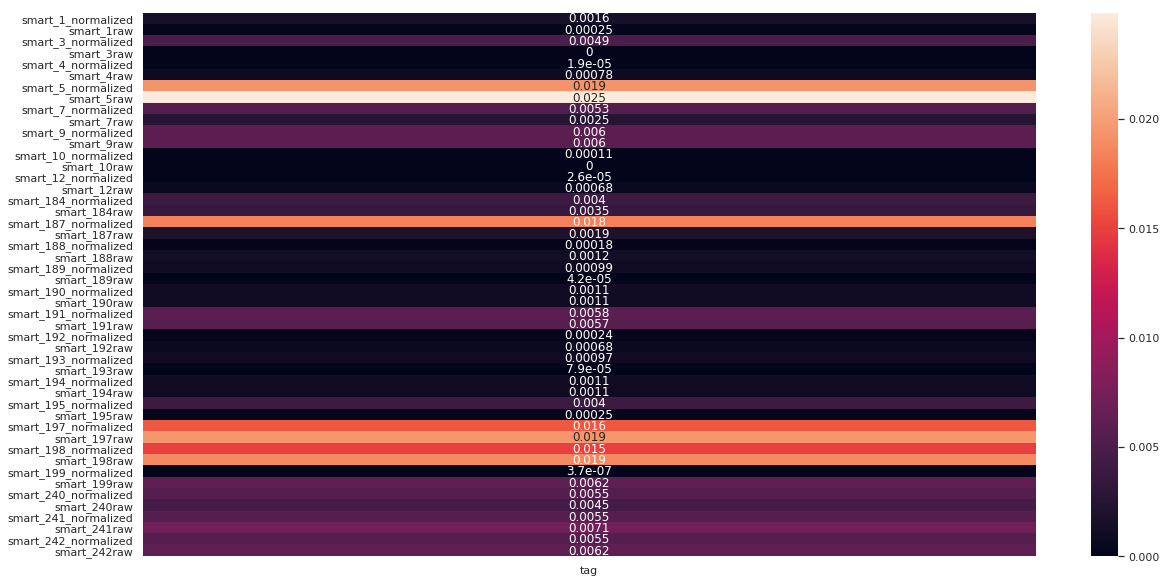

In [19]:
index = cont_cols
cols = ['tag']
sns.heatmap(pd.DataFrame(corr_with_tag, index=index, columns=cols),annot=True)

In [13]:
corr_with_flag = []
# train_fe_df_model_two = train_fe_df[train_fe_df.model==2]
for cont_col in cont_cols:
    print('%s - %s with corr: %s'% (cont_col, 'flag',
        correlation_ratio(train_fe_df['flag'],train_fe_df[cont_col])))
    corr_with_flag += [correlation_ratio(train_fe_df['flag'],train_fe_df[cont_col])]

smart_1_normalized - flag with corr: 0.0012018939893219194
smart_1raw - flag with corr: 0.00022237293680360022
smart_3_normalized - flag with corr: 0.0008814128896229158
smart_3raw - flag with corr: 0.0
smart_4_normalized - flag with corr: 7.194313470320874e-05
smart_4raw - flag with corr: 0.00016650118805965403
smart_5_normalized - flag with corr: 0.005650615996689999
smart_5raw - flag with corr: 0.010215268120785059
smart_7_normalized - flag with corr: 0.0008539153304758343
smart_7raw - flag with corr: 0.0003279811755826713
smart_9_normalized - flag with corr: 0.0011311056101591596
smart_9raw - flag with corr: 0.0011340969101493786
smart_10_normalized - flag with corr: 3.2456614117020646e-05
smart_10raw - flag with corr: 0.0
smart_12_normalized - flag with corr: 6.32266129435483e-05
smart_12raw - flag with corr: 0.0001509685993130207
smart_184_normalized - flag with corr: 0.0007889863642973486
smart_184raw - flag with corr: 0.0007769057018680086
smart_187_normalized - flag with corr:

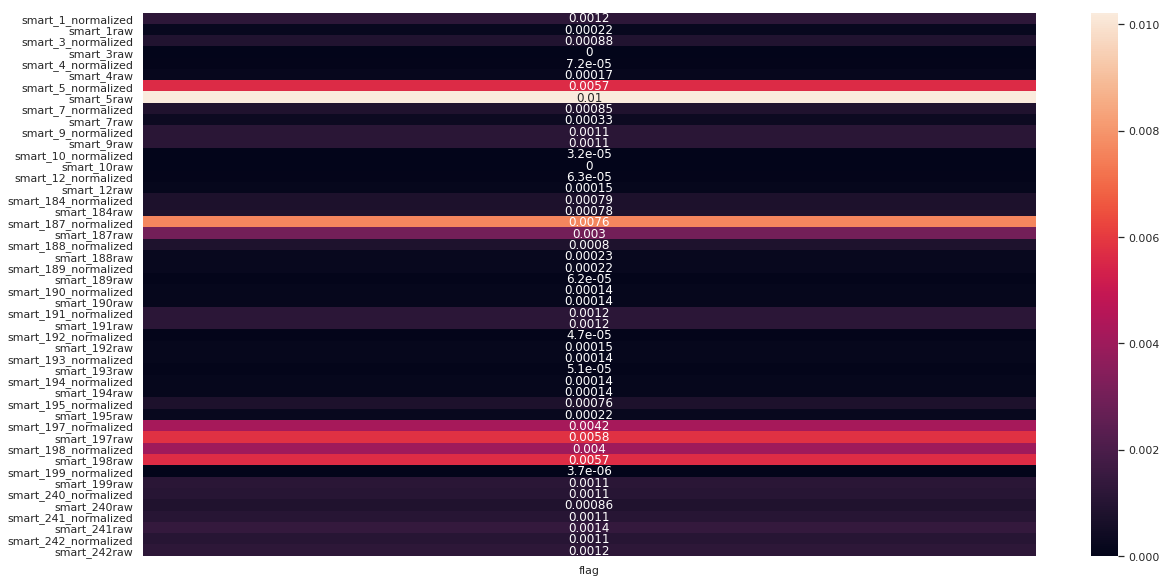

In [14]:
index = cont_cols
cols = ['flag']
sns.heatmap(pd.DataFrame(corr_with_flag, index=index, columns=cols),annot=True)

### <a id='5'> 5. data sampling</a>

In [7]:
all_data_2017 = pd.read_hdf(os.path.join(conf.DATA_DIR,'data_2017_new_all.h5'))

In [5]:
all_data_2017.loc[all_data_2017.tag!=0,'tag'] = 1

In [6]:
temp_fault_df = all_data_2017[all_data_2017.flag==1]

In [7]:
mask = all_data_2017.serial_number.isin(temp_fault_df.serial_number)

In [8]:
mask &= all_data_2017.model.isin(temp_fault_df.model)

In [9]:
ret = all_data_2017[mask]

In [10]:
ret.to_hdf(os.path.join(conf.DATA_DIR,'2017_fault_data.h5'),key='train',format='table')

In [11]:
ret.head()

,serial_number,manufacturer,model,smart_1_normalized,smart_1raw,smart_3_normalized,smart_3raw,smart_4_normalized,smart_4raw,smart_5_normalized,smart_5raw,smart_7_normalized,smart_7raw,smart_9_normalized,smart_9raw,smart_10_normalized,smart_10raw,smart_12_normalized,smart_12raw,smart_184_normalized,smart_184raw,smart_187_normalized,smart_187raw,smart_188_normalized,smart_188raw,smart_189_normalized,smart_189raw,smart_190_normalized,smart_190raw,smart_191_normalized,smart_191raw,smart_192_normalized,smart_192raw,smart_193_normalized,smart_193raw,smart_194_normalized,smart_194raw,smart_195_normalized,smart_195raw,smart_197_normalized,smart_197raw,smart_198_normalized,smart_198raw,smart_199_normalized,smart_199raw,smart_240_normalized,smart_240raw,smart_241_normalized,smart_241raw,smart_242_normalized,smart_242raw,dt,tag,flag,30_day
1060392,disk_96363,A,1,79.0,85075552.0,96.0,0.0,100.0,20.0,100.0,0.0,84.0,3.146528e+08,93.0,6870.0,100.0,0.0,100.0,20.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,72.0,28.0,100.0,0.0,100.0,19.0,100.0,317.0,28.0,28.0,47.0,85075552.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09,0,0,0
1500562,disk_118829,A,2,75.0,31999808.0,88.0,0.0,100.0,7.0,100.0,0.0,94.0,2.480230e+09,89.0,10196.0,100.0,0.0,100.0,6.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,69.0,31.0,76.0,49352.0,100.0,5.0,99.0,3528.0,31.0,31.0,32.0,31999808.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,1.679633e+14,100.0,3.325420e+11,100.0,3.173862e+11,2017-07-09,0,0,0
286484,disk_63929,A,1,76.0,42168152.0,95.0,0.0,100.0,9.0,100.0,0.0,93.0,1.889104e+09,78.0,19728.0,100.0,0.0,100.0,9.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,69.0,31.0,100.0,0.0,100.0,8.0,100.0,834.0,31.0,31.0,51.0,42168152.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09,0,0,0
285928,disk_97289,A,1,81.0,145682960.0,96.0,0.0,100.0,19.0,100.0,0.0,82.0,1.687634e+08,95.0,4557.0,100.0,0.0,100.0,19.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,71.0,29.0,100.0,0.0,100.0,18.0,100.0,226.0,29.0,29.0,51.0,145682960.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09,0,0,0
286914,disk_65549,A,1,80.0,115144496.0,95.0,0.0,100.0,13.0,100.0,0.0,92.0,1.726101e+09,82.0,15905.0,100.0,0.0,100.0,13.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,69.0,31.0,100.0,0.0,100.0,12.0,100.0,679.0,31.0,31.0,58.0,115144496.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09,0,0,0


In [19]:
ret.sort_values(['dt'])

,serial_number,manufacturer,model,smart_1_normalized,smart_1raw,smart_3_normalized,smart_3raw,smart_4_normalized,smart_4raw,smart_5_normalized,smart_5raw,smart_7_normalized,smart_7raw,smart_9_normalized,smart_9raw,smart_10_normalized,smart_10raw,smart_12_normalized,smart_12raw,smart_184_normalized,smart_184raw,smart_187_normalized,smart_187raw,smart_188_normalized,smart_188raw,smart_189_normalized,smart_189raw,smart_190_normalized,smart_190raw,smart_191_normalized,smart_191raw,smart_192_normalized,smart_192raw,smart_193_normalized,smart_193raw,smart_194_normalized,smart_194raw,smart_195_normalized,smart_195raw,smart_197_normalized,smart_197raw,smart_198_normalized,smart_198raw,smart_199_normalized,smart_199raw,smart_240_normalized,smart_240raw,smart_241_normalized,smart_241raw,smart_242_normalized,smart_242raw,dt,tag,flag,30_day
1060392,disk_96363,A,1,79.0,85075552.0,96.0,0.0,100.0,20.0,100.0,0.0,84.0,3.146528e+08,93.0,6870.0,100.0,0.0,100.0,20.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,72.0,28.0,100.0,0.0,100.0,19.0,100.0,317.0,28.0,28.0,47.0,85075552.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09,0,0,0
15713,disk_32959,A,1,83.0,216709728.0,95.0,0.0,100.0,111.0,100.0,0.0,91.0,1.553918e+09,73.0,23785.0,100.0,0.0,100.0,107.0,100.0,0.0,100.0,0.0,100.0,0.0,98.0,2.0,70.0,30.0,100.0,0.0,100.0,106.0,100.0,1100.0,30.0,30.0,54.0,216709728.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09,0,0,0
17732,disk_42711,A,1,81.0,149938848.0,96.0,0.0,100.0,15.0,100.0,0.0,92.0,1.730070e+09,69.0,27601.0,100.0,0.0,100.0,15.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,65.0,35.0,100.0,0.0,100.0,14.0,100.0,1161.0,35.0,35.0,25.0,149938848.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09,1,0,0
1279955,disk_118359,A,2,78.0,56981008.0,87.0,0.0,100.0,24.0,100.0,16.0,94.0,2.264882e+09,88.0,10977.0,100.0,0.0,100.0,23.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,76.0,24.0,99.0,2219.0,100.0,28.0,100.0,94.0,24.0,24.0,27.0,56981008.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,1.996258e+14,100.0,9.322054e+10,100.0,2.277052e+11,2017-07-09,0,0,0
177015,disk_138129,A,1,78.0,76378824.0,97.0,0.0,100.0,6.0,100.0,0.0,84.0,2.513378e+08,81.0,16854.0,100.0,0.0,100.0,6.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,71.0,29.0,100.0,0.0,100.0,5.0,100.0,707.0,29.0,29.0,47.0,76378824.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966659,disk_281,A,2,81.0,127916944.0,86.0,0.0,100.0,15.0,100.0,0.0,88.0,5.683189e+08,98.0,2617.0,100.0,0.0,100.0,15.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,69.0,31.0,99.0,3477.0,100.0,10.0,100.0,46.0,31.0,31.0,2.0,127916944.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,2.114498e+14,100.0,3.433063e+10,100.0,4.797504e+10,2017-12-31,0,0,0
2950493,disk_66351,A,2,74.0,24643864.0,86.0,0.0,100.0,29.0,100.0,0.0,87.0,5.173762e+08,97.0,2883.0,100.0,0.0,100.0,29.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,66.0,34.0,100.0,882.0,100.0,4.0,100.0,181.0,34.0,34.0,9.0,24643864.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,1.010864e+14,100.0,1.581813e+10,100.0,1.544907e+09,2017-12-31,0,0,0
952249,disk_118209,A,1,83.0,230911792.0,96.0,0.0,100.0,8.0,100.0,0.0,92.0,1.636729e+09,71.0,26059.0,100.0,0.0,100.0,8.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,70.0,30.0,100.0,0.0,100.0,7.0,100.0,1092.0,30.0,30.0,23.0,230911792.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-31,0,0,0
3463950,disk_129379,A,2,79.0,79864456.0,86.0,0.0,100.0,20.0,100.0,0.0,89.0,7.377580e+08,97.0,3483.0,100.0,0.0,100.0,20.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,71.0,29.0,98.0,4207.0,100.0,15.0,100.0,102.0,29.0,29.0,11.0,79864456.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,1.448005e+14,100.0,3.605915e+10,100.0,1.501421e+09,2017-12-31,0,0,0


In [7]:
# clusstering method for undersampling

In [6]:
fe_df = pd.read_feather(os.path.join(conf.DATA_DIR, 'fe_df_01_01_round_2.feather'))

In [7]:
index_cols, cate_cols, cont_cols, label_cols = check_columns(fe_df.dtypes.to_dict())

In [8]:
len(fe_df.columns)

110

In [9]:
distortions = []
models = []

In [10]:
K = range(1,10)

In [11]:
from scipy.spatial.distance import cdist
import math

In [12]:
tmp_df = fe_df[cont_cols+['tag']]

In [13]:
del fe_df,
gc.collect()

127

In [18]:
normal_tmp_df = tmp_df[tmp_df.tag==0]

In [19]:
del tmp_df,
gc.collect()

40

In [20]:
normal_tmp_df.fillna(DEFAULT_MISSING_FLOAT, inplace=True)

In [ ]:
for k in K:
    kmeans_model = KMeans(n_clusters=k, init='k-means++', random_state=1,n_jobs=20)
    kmeans_model.fit(normal_tmp_df)
    distortions.append(sum(np.min(cdist(normal_tmp_df, kmeans_model.cluster_centers_,'euclidean'),axis=1))/normal_tmp_df.shape[0])
    models.append(kmeans_model)

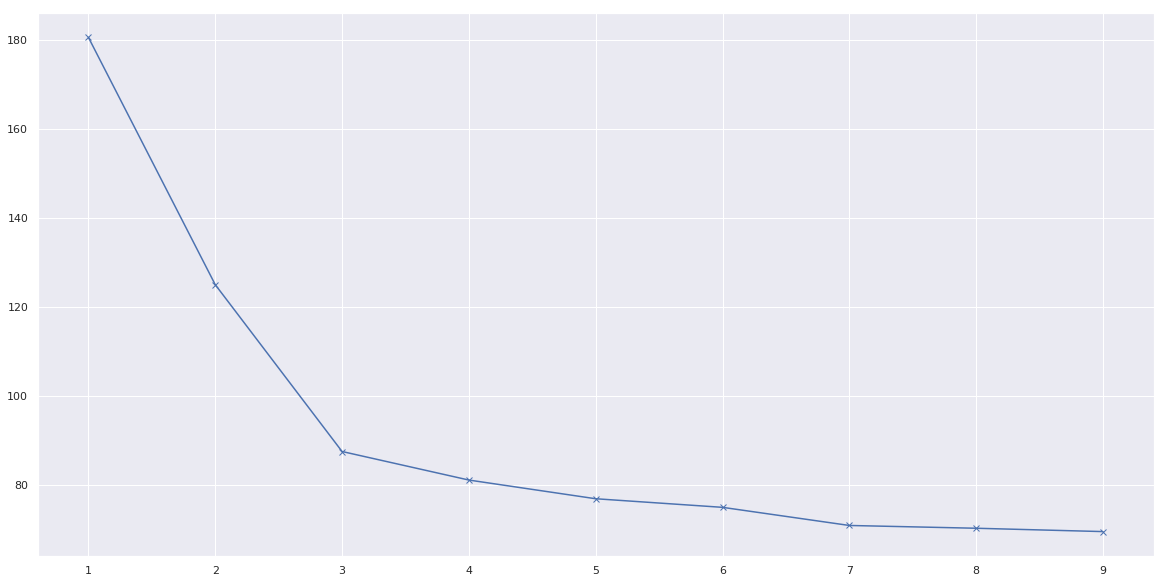

In [26]:
plt.plot(K,distortions,'bx-')

In [29]:
models[2].labels_.shape

(36853826,)

In [32]:
normal_df = fe_df[fe_df.tag==0]

In [33]:
fault_df = fe_df[fe_df.tag==1]

In [36]:
normal_df['cluster_label'] = models[2].labels_

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
ret = pd.concat([normal_df,fault_df],axis=0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [38]:
ret.sort_values('dt',inplace=True)

In [41]:
ret[ret.tag==0]['cluster_label'].unique()

array([0., 2., 1.])

In [43]:
ret.reset_index(drop=True,inplace=True)

In [44]:
ret.head()

,cluster_label,degradation_err_weight,degradation_err_weight_diff_for_last_period_7,degradation_err_weight_max_7,degradation_err_weight_min_7,degradation_err_weight_std_7,dt,err_weight,err_weight_diff_for_last_period_7,err_weight_max_7,err_weight_min_7,err_weight_std_7,flag,model,model_type,seek_err_weight,seek_err_weight_diff_for_last_period_7,seek_err_weight_max_7,seek_err_weight_min_7,seek_err_weight_std_7,serial_number,smart_12raw,smart_12raw_diff_for_last_period_7,smart_12raw_max_7,smart_12raw_min_7,smart_12raw_std_7,smart_184raw,smart_187_normalized,smart_188raw,smart_189_normalized,smart_189_normalized_diff_for_last_period_7,smart_189_normalized_max_7,smart_189_normalized_min_7,smart_189_normalized_std_7,smart_191_normalized,smart_191_normalized_diff_for_last_period_7,smart_191_normalized_max_7,smart_191_normalized_min_7,smart_191_normalized_std_7,smart_192raw,smart_192raw_diff_for_last_period_7,smart_192raw_max_7,smart_192raw_min_7,smart_192raw_std_7,smart_193_normalized,smart_193_normalized_diff_for_last_period_7,smart_193_normalized_max_7,smart_193_normalized_min_7,smart_193_normalized_std_7,smart_194raw,smart_194raw_diff_for_last_period_7,smart_194raw_max_7,smart_194raw_min_7,smart_194raw_std_7,smart_195_normalized,smart_195_normalized_diff_for_last_period_7,smart_195_normalized_max_7,smart_195_normalized_min_7,smart_195_normalized_std_7,smart_197raw,smart_198raw,smart_199raw,smart_199raw_diff_for_last_period_7,smart_199raw_max_7,smart_199raw_min_7,smart_199raw_std_7,smart_1_normalized,smart_1_normalized_diff_for_last_period_7,smart_1_normalized_max_7,smart_1_normalized_min_7,smart_1_normalized_std_7,smart_3_normalized,smart_3_normalized_diff_for_last_period_7,smart_3_normalized_max_7,smart_3_normalized_min_7,smart_3_normalized_std_7,smart_4raw,smart_4raw_diff_for_last_period_7,smart_4raw_max_7,smart_4raw_min_7,smart_4raw_std_7,smart_5raw,smart_5raw_diff_for_last_period_7,smart_5raw_max_7,smart_5raw_min_7,smart_5raw_slope_for_last_duration_7,smart_5raw_std_7,smart_7_normalized,smart_7_normalized_diff_for_last_period_7,smart_7_normalized_max_7,smart_7_normalized_min_7,smart_7_normalized_std_7,smart_9_normalized,tag
0,0.0,34.959829,NaN,34.959829,34.959829,NaN,2017-07-09,3.880133,NaN,3.880133,3.880133,NaN,0,1,0,39.946169,NaN,39.946169,39.946169,NaN,disk_137906,10.0,NaN,10.0,10.0,NaN,0.0,0.0,0.0,1.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,0.0,NaN,9.0,NaN,9.0,9.0,NaN,0.0,NaN,0.0,0.0,NaN,30.0,NaN,30.0,30.0,NaN,55.0,NaN,55.0,55.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN,81.0,NaN,81.0,81.0,NaN,95.0,NaN,95.0,95.0,NaN,10.0,NaN,10.0,10.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,93.0,NaN,93.0,93.0,NaN,21.0,0
1,NaN,36.159615,NaN,36.159615,36.159615,NaN,2017-07-09,3.658157,NaN,3.658157,3.658157,NaN,0,1,0,38.915846,NaN,38.915846,38.915846,NaN,disk_52868,8.0,NaN,8.0,8.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,7.0,NaN,7.0,7.0,NaN,0.0,NaN,0.0,0.0,NaN,33.0,NaN,33.0,33.0,NaN,50.0,NaN,50.0,50.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN,81.0,NaN,81.0,81.0,NaN,95.0,NaN,95.0,95.0,NaN,8.0,NaN,8.0,8.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,90.0,NaN,90.0,90.0,NaN,27.0,1
2,0.0,39.217998,NaN,39.217998,39.217998,NaN,2017-07-09,4.075472,NaN,4.075472,4.075472,NaN,0,1,0,38.665656,NaN,38.665656,38.665656,NaN,disk_99413,18.0,NaN,18.0,18.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,17.0,NaN,17.0,17.0,NaN,0.0,NaN,0.0,0.0,NaN,30.0,NaN,30.0,30.0,NaN,59.0,NaN,59.0,59.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN,82.0,NaN,82.0,82.0,NaN,94.0,NaN,94.0,94.0,NaN,21.0,NaN,21.0,21.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,90.0,NaN,90.0,90.0,NaN,26.0,0
3,0.0,39.014462,NaN,39.014462,39.014462,NaN,2017-07-09,4.004439,NaN,4.004439,4.004439,NaN,0,1,0,38.332070,NaN,38.332070,38.332070,NaN,disk_103238,17.0,NaN,17.0,17.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,15.0,NaN,15.0,15.0,NaN,0.0,NaN,0.0,0.0,NaN,26.0,NaN,26.0,26.0,NaN,59.0,NaN,59.0,59.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN,78.0,NaN,78.0,78.0,NaN,96.0,NaN,96.0,96.0,NaN,20.0,NaN,20.0,20.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,90.0,NaN,90.0,90.0,NaN,26.0,0
4,0.0,2

In [45]:
ret.to_feather(os.path.join(conf.DATA_DIR, 'fe_df_01_01_round_2_with_cluster_label.feather'))

In [6]:
# sample by power_on_hours
fe_df = pd.read_feather(os.path.join(conf.DATA_DIR, 'fe_df_01_01_round_2_with_smart_9raw_20.feather'))

In [7]:
fe_df.dtypes

dt                                                datetime64[ns]
serial_number                                             object
model                                                      int64
smart_1_normalized_min_20                                float64
smart_3_normalized_min_20                                float64
smart_7_normalized_min_20                                float64
smart_189_normalized_min_20                              float64
smart_191_normalized_min_20                              float64
smart_193_normalized_min_20                              float64
smart_195_normalized_min_20                              float64
smart_4raw_min_20                                        float64
smart_5raw_min_20                                        float64
smart_12raw_min_20                                       float64
smart_192raw_min_20                                      float64
smart_194raw_min_20                                      float64
smart_199raw_min_20      

In [8]:
fe_df.columns

Index(['dt', 'serial_number', 'model', 'smart_1_normalized_min_20', 'smart_3_normalized_min_20',
       'smart_7_normalized_min_20', 'smart_189_normalized_min_20', 'smart_191_normalized_min_20',
       'smart_193_normalized_min_20', 'smart_195_normalized_min_20', 'smart_4raw_min_20',
       'smart_5raw_min_20', 'smart_12raw_min_20', 'smart_192raw_min_20', 'smart_194raw_min_20',
       'smart_199raw_min_20', 'err_weight_min_20', 'seek_err_weight_min_20',
       'degradation_err_weight_min_20', 'smart_1_normalized_max_20', 'smart_3_normalized_max_20',
       'smart_7_normalized_max_20', 'smart_189_normalized_max_20', 'smart_191_normalized_max_20',
       'smart_193_normalized_max_20', 'smart_195_normalized_max_20', 'smart_4raw_max_20',
       'smart_5raw_max_20', 'smart_12raw_max_20', 'smart_192raw_max_20', 'smart_194raw_max_20',
       'smart_199raw_max_20', 'err_weight_max_20', 'seek_err_weight_max_20',
       'degradation_err_weight_max_20', 'smart_1_normalized_std_20', 'smart_3_norma

In [9]:
len(fe_df)

36887574

In [10]:
fe_df[fe_df.tag==0]['smart_9raw_in_day_unit'].describe()

count    3.685381e+07
mean     7.873514e+02
std      4.844435e+02
min      0.000000e+00
25%      2.990000e+02
50%      7.950000e+02
75%      1.216000e+03
max      1.811000e+03
Name: smart_9raw_in_day_unit, dtype: float64

In [16]:
pd.cut(fe_df['smart_9raw_in_day_unit'],bins=4, labels=False,retbins=True)

(0           2.0
 1           2.0
 2           2.0
 3           2.0
 4           2.0
            ... 
 36887569    0.0
 36887570    0.0
 36887571    0.0
 36887572    0.0
 36887573    0.0
 Name: smart_9raw_in_day_unit, Length: 36853826, dtype: float64,
 array([  -1.811,  452.75 ,  905.5  , 1358.25 , 1811.   ]))

In [10]:
fe_df['smart_9raw_in_day_unit_cate'] = pd.cut(fe_df['smart_9raw_in_day_unit'],bins=4, labels=False)

In [11]:
fe_df['smart_9raw_in_day_unit_cate'].isnull().sum()

12

In [14]:
fe_df['smart_9raw_in_day_unit_cate']  = fe_df['smart_9raw_in_day_unit_cate'].astype('category')

In [13]:
fe_df.dropna(subset=['smart_9raw_in_day_unit_cate'],inplace=True)

In [15]:
fe_df.sort_values('dt',inplace=True)

In [16]:
fe_df.reset_index(drop=True, inplace=True)

In [18]:
fe_df.drop(columns=['smart_9raw_in_day_unit'],inplace=True)

In [19]:
fe_df.to_feather(os.path.join(conf.DATA_DIR, 'fe_df_01_01_round_2_with_smart_9raw_cate.feather'))

In [6]:
# using smote for upsampling
fe_df = pd.read_feather(os.path.join(conf.DATA_DIR,'sample_by_power_on_hours_0.00450994_fe_df_01_01_round_2_with_smart_9raw.feather'))

In [7]:
train_date_mask = (fe_df.dt>='2018-01-01')&(fe_df.dt<='2018-05-31')

In [8]:
train_fe_df = fe_df[train_date_mask]

In [12]:
train_fe_df.shape

(116205, 110)

In [13]:
index_cols, cate_cols, cont_cols, label_cols = check_columns(train_fe_df.dtypes.to_dict())

In [14]:
sm = SMOTE(random_state=42)

In [19]:
res = [train_fe_df[cont_cols].fillna(-1.234), train_fe_df[cate_cols].fillna(0), train_fe_df[['tag']]]
tmp_df  = pd.concat(res,axis=1)

In [20]:
x,y = sm.fit_resample(tmp_df[cate_cols +cont_cols], tmp_df[['tag']])

In [25]:
y[y.tag==1]

,tag
1,1
2,1
3,1
4,1
5,1
...,...
199991,1
199992,1
199993,1
199994,1


### <a id='6'> 6. analysis special feature</a>

In [1]:
# 184, 187, 188,5

In [8]:
train_fe_df.head()

,serial_number,manufacturer,model,smart_1_normalized,smart_1raw,smart_3_normalized,smart_3raw,smart_4_normalized,smart_4raw,smart_5_normalized,smart_5raw,smart_7_normalized,smart_7raw,smart_9_normalized,smart_9raw,smart_10_normalized,smart_10raw,smart_12_normalized,smart_12raw,smart_184_normalized,smart_184raw,smart_187_normalized,smart_187raw,smart_188_normalized,smart_188raw,smart_189_normalized,smart_189raw,smart_190_normalized,smart_190raw,smart_191_normalized,smart_191raw,smart_192_normalized,smart_192raw,smart_193_normalized,smart_193raw,smart_194_normalized,smart_194raw,smart_195_normalized,smart_195raw,smart_197_normalized,smart_197raw,smart_198_normalized,smart_198raw,smart_199_normalized,smart_199raw,smart_240_normalized,smart_240raw,smart_241_normalized,smart_241raw,smart_242_normalized,smart_242raw,dt,tag,flag,30_day
1111566,disk_21087,A,1,80.0,104629728.0,96.0,0.0,100.0,23.0,100.0,0.0,84.0,3.062229e+08,89.0,10483.0,100.0,0.0,100.0,23.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,75.0,25.0,100.0,0.0,100.0,21.0,100.0,505.0,25.0,25.0,63.0,104629728.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,0,0,0
3427638,disk_69256,A,2,84.0,232161968.0,86.0,0.0,100.0,104.0,100.0,0.0,93.0,1.817807e+09,97.0,3433.0,100.0,0.0,100.0,104.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,64.0,36.0,99.0,2114.0,100.0,8.0,100.0,438.0,36.0,36.0,15.0,232161968.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,1.326286e+13,100.0,2.269850e+10,100.0,357347488.0,2018-01-01,0,0,0
1457138,disk_41304,A,1,81.0,150906496.0,96.0,0.0,100.0,9.0,100.0,0.0,93.0,2.096764e+09,67.0,29782.0,100.0,0.0,100.0,9.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,65.0,35.0,100.0,0.0,100.0,8.0,100.0,1249.0,35.0,35.0,24.0,150906496.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,0,0,0
2913767,disk_73081,A,2,83.0,189932672.0,88.0,0.0,100.0,12.0,100.0,0.0,71.0,1.232626e+07,100.0,234.0,100.0,0.0,100.0,12.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,66.0,34.0,100.0,116.0,100.0,7.0,100.0,41.0,34.0,34.0,12.0,189932672.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,2.114369e+14,100.0,2.113489e+09,100.0,796860864.0,2018-01-01,0,0,0
2473882,disk_9590,A,1,68.0,6786815.0,97.0,0.0,100.0,6.0,100.0,0.0,60.0,1.259635e+06,83.0,15019.0,100.0,0.0,100.0,6.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,73.0,27.0,100.0,0.0,100.0,5.0,100.0,708.0,27.0,27.0,12.0,6786815.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,0,0,0


In [9]:
tmp_df = train_fe_df[['smart_5raw','tag','flag']]

In [10]:
tmp_df['smart_5raw'].value_counts()

0.0       35904756
1.0         285181
8.0          96811
2.0          93918
3.0          60596
            ...   
2394.0           1
2395.0           1
2404.0           1
2406.0           1
1573.0           1
Name: smart_5raw, Length: 2922, dtype: int64

In [28]:
tmp_df[(tmp_df.smart_5raw>=16) & (tmp_df.tag==0)].describe()

,smart_5raw,tag,flag
count,242836.000000,242836.0,242836.0
mean,550.830444,0.0,0.0
std,2499.509521,0.0,0.0
min,16.000000,0.0,0.0
25%,24.000000,0.0,0.0
50%,48.000000,0.0,0.0
75%,154.000000,0.0,0.0
max,55856.000000,0.0,0.0


In [27]:
tmp_df[tmp_df.tag==1].describe()

,smart_5raw,tag,flag
count,27041.000000,27042.0,27042.000000
mean,206.491028,1.0,0.032690
std,1307.570435,0.0,0.177827
min,0.000000,1.0,0.000000
25%,0.000000,1.0,0.000000
50%,0.000000,1.0,0.000000
75%,13.000000,1.0,0.000000
max,58056.000000,1.0,1.000000


In [26]:
tmp_df[(tmp_df.smart_5raw>=3) & (tmp_df.tag==1)].describe()

,smart_5raw,tag,flag
count,8070.000000,8070.0,8070.000000
mean,691.789978,1.0,0.045229
std,2322.447998,0.0,0.207819
min,3.000000,1.0,0.000000
25%,24.000000,1.0,0.000000
50%,80.000000,1.0,0.000000
75%,272.000000,1.0,0.000000
max,58056.000000,1.0,1.000000


In [22]:
train_fe_df['smart_187raw'].value_counts()

0.0      36810153
1.0          7856
3.0          7066
2.0          3957
4.0          2791
           ...   
215.0           1
217.0           1
221.0           1
230.0           1
108.0           1
Name: smart_187raw, Length: 165, dtype: int64

In [18]:
train_fe_df[(train_fe_df['smart_184_normalized']!=100)&(train_fe_df['tag']==1)]['smart_184_normalized'].describe()

count    119.000000
mean      59.823528
std       36.280602
min        1.000000
25%       32.500000
50%       64.000000
75%       94.000000
max       99.000000
Name: smart_184_normalized, dtype: float64

In [20]:
train_fe_df[(train_fe_df['smart_184_normalized']==100)&(train_fe_df['smart_184raw']==0)]

,serial_number,manufacturer,model,smart_1_normalized,smart_1raw,smart_3_normalized,smart_3raw,smart_4_normalized,smart_4raw,smart_5_normalized,smart_5raw,smart_7_normalized,smart_7raw,smart_9_normalized,smart_9raw,smart_10_normalized,smart_10raw,smart_12_normalized,smart_12raw,smart_184_normalized,smart_184raw,smart_187_normalized,smart_187raw,smart_188_normalized,smart_188raw,smart_189_normalized,smart_189raw,smart_190_normalized,smart_190raw,smart_191_normalized,smart_191raw,smart_192_normalized,smart_192raw,smart_193_normalized,smart_193raw,smart_194_normalized,smart_194raw,smart_195_normalized,smart_195raw,smart_197_normalized,smart_197raw,smart_198_normalized,smart_198raw,smart_199_normalized,smart_199raw,smart_240_normalized,smart_240raw,smart_241_normalized,smart_241raw,smart_242_normalized,smart_242raw,dt,tag,flag,30_day
1111566,disk_21087,A,1,80.0,104629728.0,96.0,0.0,100.0,23.0,100.0,0.0,84.0,3.062229e+08,89.0,10483.0,100.0,0.0,100.0,23.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,75.0,25.0,100.0,0.0,100.0,21.0,100.0,505.0,25.0,25.0,63.0,104629728.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,0,0,0
3427638,disk_69256,A,2,84.0,232161968.0,86.0,0.0,100.0,104.0,100.0,0.0,93.0,1.817807e+09,97.0,3433.0,100.0,0.0,100.0,104.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,64.0,36.0,99.0,2114.0,100.0,8.0,100.0,438.0,36.0,36.0,15.0,232161968.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,1.326286e+13,100.0,2.269850e+10,100.0,3.573475e+08,2018-01-01,0,0,0
1457138,disk_41304,A,1,81.0,150906496.0,96.0,0.0,100.0,9.0,100.0,0.0,93.0,2.096764e+09,67.0,29782.0,100.0,0.0,100.0,9.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,65.0,35.0,100.0,0.0,100.0,8.0,100.0,1249.0,35.0,35.0,24.0,150906496.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,0,0,0
2913767,disk_73081,A,2,83.0,189932672.0,88.0,0.0,100.0,12.0,100.0,0.0,71.0,1.232626e+07,100.0,234.0,100.0,0.0,100.0,12.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,66.0,34.0,100.0,116.0,100.0,7.0,100.0,41.0,34.0,34.0,12.0,189932672.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,2.114369e+14,100.0,2.113489e+09,100.0,7.968609e+08,2018-01-01,0,0,0
2473882,disk_9590,A,1,68.0,6786815.0,97.0,0.0,100.0,6.0,100.0,0.0,60.0,1.259635e+06,83.0,15019.0,100.0,0.0,100.0,6.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,73.0,27.0,100.0,0.0,100.0,5.0,100.0,708.0,27.0,27.0,12.0,6786815.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636158,disk_26644,A,2,82.0,147348880.0,86.0,0.0,100.0,21.0,100.0,0.0,73.0,1.865221e+07,98.0,1998.0,100.0,0.0,100.0,21.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,70.0,30.0,100.0,104.0,100.0,17.0,100.0,160.0,30.0,30.0,43.0,147348880.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,7.477538e+12,100.0,2.528995e+09,100.0,5.193371e+09,2018-08-31,0,0,0
765510,disk_66409,A,1,82.0,169207568.0,97.0,0.0,100.0,5.0,100.0,0.0,88.0,7.730257e+08,72.0,25200.0,100.0,0.0,100.0,5.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,75.0,25.0,100.0,0.0,100.0,4.0,100.0,1053.0,25.0,25.0,55.0,169207568.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-31,0,0,0
4705304,disk_71857,A,2,81.0,115249456.0,86.0,0.0,100.0,14.0,100.0,0.0,93.0,2.112005e+09,91.0,8451.0,100.0,0.0,100.0,15.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,67.0,33.0,93.0,14812.0,100.0,9.0,100.0,69.0,33.0,33.0,2.0,115249456.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,1.253143e+14,100.0,5.238415e+10,100.0,1.369240e+11,2018-08-31,0,0,0
1826234,disk_31628,A,1,82.0,173373888.0,95.0,0.0,100.0,12.0,100.0,0.0,89.0,8.771688e+08,75.0,22676.0,100.0,0.0,100.0,12.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,68.0,32.0,100.0,0.0,100.0,11.0,100.0,956.0,32.0,32.0,51.0,173373888.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-31,0,0,0


In [25]:
train_fe_df[(train_fe_df['tag']==0)&(train_fe_df['smart_188raw']==0)]

,serial_number,manufacturer,model,smart_1_normalized,smart_1raw,smart_3_normalized,smart_3raw,smart_4_normalized,smart_4raw,smart_5_normalized,smart_5raw,smart_7_normalized,smart_7raw,smart_9_normalized,smart_9raw,smart_10_normalized,smart_10raw,smart_12_normalized,smart_12raw,smart_184_normalized,smart_184raw,smart_187_normalized,smart_187raw,smart_188_normalized,smart_188raw,smart_189_normalized,smart_189raw,smart_190_normalized,smart_190raw,smart_191_normalized,smart_191raw,smart_192_normalized,smart_192raw,smart_193_normalized,smart_193raw,smart_194_normalized,smart_194raw,smart_195_normalized,smart_195raw,smart_197_normalized,smart_197raw,smart_198_normalized,smart_198raw,smart_199_normalized,smart_199raw,smart_240_normalized,smart_240raw,smart_241_normalized,smart_241raw,smart_242_normalized,smart_242raw,dt,tag,flag,30_day
1111566,disk_21087,A,1,80.0,104629728.0,96.0,0.0,100.0,23.0,100.0,0.0,84.0,3.062229e+08,89.0,10483.0,100.0,0.0,100.0,23.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,75.0,25.0,100.0,0.0,100.0,21.0,100.0,505.0,25.0,25.0,63.0,104629728.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,0,0,0
3427638,disk_69256,A,2,84.0,232161968.0,86.0,0.0,100.0,104.0,100.0,0.0,93.0,1.817807e+09,97.0,3433.0,100.0,0.0,100.0,104.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,64.0,36.0,99.0,2114.0,100.0,8.0,100.0,438.0,36.0,36.0,15.0,232161968.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,1.326286e+13,100.0,2.269850e+10,100.0,3.573475e+08,2018-01-01,0,0,0
1457138,disk_41304,A,1,81.0,150906496.0,96.0,0.0,100.0,9.0,100.0,0.0,93.0,2.096764e+09,67.0,29782.0,100.0,0.0,100.0,9.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,65.0,35.0,100.0,0.0,100.0,8.0,100.0,1249.0,35.0,35.0,24.0,150906496.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,0,0,0
2913767,disk_73081,A,2,83.0,189932672.0,88.0,0.0,100.0,12.0,100.0,0.0,71.0,1.232626e+07,100.0,234.0,100.0,0.0,100.0,12.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,66.0,34.0,100.0,116.0,100.0,7.0,100.0,41.0,34.0,34.0,12.0,189932672.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,2.114369e+14,100.0,2.113489e+09,100.0,7.968609e+08,2018-01-01,0,0,0
2473882,disk_9590,A,1,68.0,6786815.0,97.0,0.0,100.0,6.0,100.0,0.0,60.0,1.259635e+06,83.0,15019.0,100.0,0.0,100.0,6.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,73.0,27.0,100.0,0.0,100.0,5.0,100.0,708.0,27.0,27.0,12.0,6786815.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636158,disk_26644,A,2,82.0,147348880.0,86.0,0.0,100.0,21.0,100.0,0.0,73.0,1.865221e+07,98.0,1998.0,100.0,0.0,100.0,21.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,70.0,30.0,100.0,104.0,100.0,17.0,100.0,160.0,30.0,30.0,43.0,147348880.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,7.477538e+12,100.0,2.528995e+09,100.0,5.193371e+09,2018-08-31,0,0,0
765510,disk_66409,A,1,82.0,169207568.0,97.0,0.0,100.0,5.0,100.0,0.0,88.0,7.730257e+08,72.0,25200.0,100.0,0.0,100.0,5.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,75.0,25.0,100.0,0.0,100.0,4.0,100.0,1053.0,25.0,25.0,55.0,169207568.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-31,0,0,0
4705304,disk_71857,A,2,81.0,115249456.0,86.0,0.0,100.0,14.0,100.0,0.0,93.0,2.112005e+09,91.0,8451.0,100.0,0.0,100.0,15.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,67.0,33.0,93.0,14812.0,100.0,9.0,100.0,69.0,33.0,33.0,2.0,115249456.0,100.0,0.0,100.0,0.0,200.0,0.0,100.0,1.253143e+14,100.0,5.238415e+10,100.0,1.369240e+11,2018-08-31,0,0,0
1826234,disk_31628,A,1,82.0,173373888.0,95.0,0.0,100.0,12.0,100.0,0.0,89.0,8.771688e+08,75.0,22676.0,100.0,0.0,100.0,12.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,68.0,32.0,100.0,0.0,100.0,11.0,100.0,956.0,32.0,32.0,51.0,173373888.0,100.0,0.0,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-31,0,0,0


In [27]:
train_fe_df['smart_9_normalized'].describe()

count    3.685304e+07
mean     7.996262e+01
std      5.419396e+00
min      3.600000e+01
25%      7.800000e+01
50%      8.100000e+01
75%      8.200000e+01
max      1.000000e+02
Name: smart_1_normalized, dtype: float64

In [38]:
train_fe_df['smart_189_normalized'].value_counts()

100.0    30479851
99.0      2272120
98.0      1031661
97.0       607233
96.0       405593
95.0       284290
94.0       221368
93.0       172428
92.0       142942
91.0       110157
90.0        92525
89.0        78203
1.0         77953
88.0        71912
87.0        67793
86.0        52769
85.0        47585
84.0        38483
83.0        35984
82.0        33337
81.0        30771
79.0        27084
80.0        24491
76.0        21817
77.0        20255
78.0        19895
74.0        19410
75.0        16211
73.0        16021
72.0        15635
70.0        14437
69.0        13980
71.0        13402
68.0        13198
67.0        12427
66.0        11716
65.0        10713
64.0         9144
63.0         8993
56.0         8131
61.0         7988
57.0         7768
62.0         7653
59.0         7293
55.0         7268
60.0         7173
58.0         7025
54.0         6729
53.0         6576
51.0         5340
52.0         5311
48.0         4734
43.0         4700
50.0         4667
49.0         4568
47.0      

In [40]:
train_fe_df['smart_189_normalized'].value_counts()

100.0    30479851
99.0      2272120
98.0      1031661
97.0       607233
96.0       405593
95.0       284290
94.0       221368
93.0       172428
92.0       142942
91.0       110157
90.0        92525
89.0        78203
1.0         77953
88.0        71912
87.0        67793
86.0        52769
85.0        47585
84.0        38483
83.0        35984
82.0        33337
81.0        30771
79.0        27084
80.0        24491
76.0        21817
77.0        20255
78.0        19895
74.0        19410
75.0        16211
73.0        16021
72.0        15635
70.0        14437
69.0        13980
71.0        13402
68.0        13198
67.0        12427
66.0        11716
65.0        10713
64.0         9144
63.0         8993
56.0         8131
61.0         7988
57.0         7768
62.0         7653
59.0         7293
55.0         7268
60.0         7173
58.0         7025
54.0         6729
53.0         6576
51.0         5340
52.0         5311
48.0         4734
43.0         4700
50.0         4667
49.0         4568
47.0      

In [41]:
train_fe_df[(train_fe_df['smart_189_normalized']==3) & (train_fe_df.tag==1)]

,serial_number,manufacturer,model,smart_1_normalized,smart_1raw,smart_3_normalized,smart_3raw,smart_4_normalized,smart_4raw,smart_5_normalized,smart_5raw,smart_7_normalized,smart_7raw,smart_9_normalized,smart_9raw,smart_10_normalized,smart_10raw,smart_12_normalized,smart_12raw,smart_184_normalized,smart_184raw,smart_187_normalized,smart_187raw,smart_188_normalized,smart_188raw,smart_189_normalized,smart_189raw,smart_190_normalized,smart_190raw,smart_191_normalized,smart_191raw,smart_192_normalized,smart_192raw,smart_193_normalized,smart_193raw,smart_194_normalized,smart_194raw,smart_195_normalized,smart_195raw,smart_197_normalized,smart_197raw,smart_198_normalized,smart_198raw,smart_199_normalized,smart_199raw,smart_240_normalized,smart_240raw,smart_241_normalized,smart_241raw,smart_242_normalized,smart_242raw,dt,tag,flag,30_day


### <a id='7'> 7. feature selection</a>

In [6]:
fe_df = pd.read_feather(os.path.join(conf.DATA_DIR, 'sample_0.4_fe_df_01_01_round_2.feather'))

In [7]:
cols, train_fe_df, val_fe_df, train_x, train_y, val_x, val_y = _train_valid_split(fe_df,
                                                                                        train_start_date='2018-01-01',
                                                                                        train_end_date='2018-05-31',
                                                                                        valid_start_date='2018-07-01',
                                                                                        valid_end_date='2018-07',
                                                                                        train_on_model_id=None,
                                                                                        eval_on_model_id=None,
                                                                                        use_next_month_fault_data=True,
                                                                                        next_month_start_date='2018-06-01',
                                                                                        next_month_end_date='2018-06-30',
                                                                                        use_standard=False,
                                                                                        use_log=False)

In [9]:
index_cols, cate_cols, cont_cols, label_cols = cols
val_x_index = val_fe_df[index_cols]
feature_name = train_x.columns